##Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tarfile
from glob import glob
import nibabel as nib
import cv2
import time as tm

from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import Recall, Precision, Accuracy
from keras import backend as K

## Preparing Data

In [ ]:
#defining path to the saved models and images
resnet_path = "/content/drive/MyDrive/Capstone4/model_resnet2.h5"
mobilenet_path = "/content/drive/MyDrive/Capstone4/model_mbn.h5"
test_images_path = "/content/drive/MyDrive/Capstone4/Task10_Colon/imagesTs"

###Visualizing Test Image

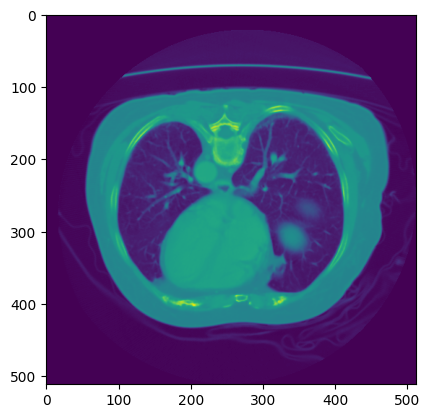

In [ ]:
test_img = nib.load("/content/drive/MyDrive/Capstone4/Task10_Colon/imagesTs/colon_017.nii.gz").get_fdata()

plt.imshow(test_img[:,:,test_img.shape[2]-1].T)
plt.show()

In [ ]:
test_path = []

for filename in os.listdir(test_images_path):
  test_path.append(os.path.join(test_images_path, filename))

###Preprocessing test Data

In [ ]:
HOUNSFIELD_MIN = -1024
HOUNSFIELD_MAX = 3071
HOUNSFIELD_RANGE = HOUNSFIELD_MAX - HOUNSFIELD_MIN

In [ ]:
def normalize(img):
  img[img < HOUNSFIELD_MIN] = HOUNSFIELD_MIN
  img[img > HOUNSFIELD_MAX] = HOUNSFIELD_MAX
  return (img - HOUNSFIELD_MIN) / HOUNSFIELD_RANGE

In [ ]:
def readImage(file_path, normalized=False):
  img = nib.load(file_path).get_fdata()
  if normalized:
    return normalize(img)
  return img

In [ ]:
test = readImage("/content/drive/MyDrive/Capstone4/Task10_Colon/imagesTs/colon_017.nii.gz", True)
x,y,z = test.shape
print(x,y,z)

512 512 74


In [ ]:
def sliceAndPreprocess(img_path):
  img = readImage(img_path, True)
  dimz = img.shape[2]
  slices = []

  for idx in range(dimz):
    slice = np.uint8(img[:,:,idx]*255)
    outfile = os.path.join("/content/drive/MyDrive/TsImg", f'{idx}.png')
    cv2.imwrite(outfile, slice)
    slices.append(outfile)

  return slices

In [ ]:
IMGHEIGHT = 128
IMGWIDTH = 128

In [ ]:
def infere(img_path, model):

  img = cv2.imread(img_path)
  img = cv2.resize(img, (IMGHEIGHT, IMGWIDTH))
  img = img/255
  img = img[np.newaxis,:,:,:]

  start = tm.time()
  pred = model.predict(img)
  end = tm.time()

  plt.figure(figsize = (12,12))
  plt.subplot(1,2,1)
  plt.imshow(np.squeeze(img))
  plt.title('Original Image')

  plt.subplot(1,2,2)
  plt.imshow(np.squeeze(pred))
  plt.title('Prediction')

  plt.show()

  return (end-start)*1000

###Defining Metrics

In [ ]:
def iou(ytrue, ypred):
    smoothing_factor=0.1
    intersection = K.sum(ytrue*ypred)
    combined_area = K.sum(ytrue+ypred)
    union_area = combined_area - intersection
    iou = (intersection+smoothing_factor)/(union_area+smoothing_factor)
    return iou

# Dice Sorenson
def dice_coef(ytrue, ypred):
    smoothing_factor=0.1
    ytrue_f = K.flatten(ytrue)
    ypred_f = K.flatten(ypred)
    intersection = K.sum(ytrue*ypred)
    ytrue_area = K.sum(ytrue)
    ypred_area = K.sum(ypred)
    combined_area = ytrue_area + ypred_area
    dice = 2*((intersection+smoothing_factor)/(combined_area+smoothing_factor))
    return dice

##Inference

###Loading Model and Test Image

In [ ]:
model_resnet = load_model(resnet_path, custom_objects={"iou": iou, "dice_coef": dice_coef})
model_mbn = load_model(mobilenet_path,  custom_objects={"iou": iou, "dice_coef": dice_coef})

In [ ]:
image_slices = sliceAndPreprocess("/content/drive/MyDrive/Capstone4/Task10_Colon/imagesTs/colon_017.nii.gz")
len(image_slices)

74

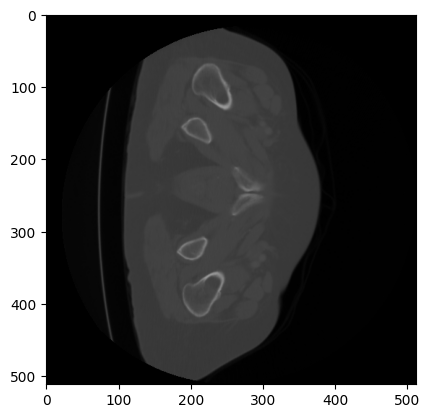

In [ ]:
x = cv2.imread(image_slices[0])
plt.imshow(x)

###Resnet

1/1 [==============================] - 0s 23ms/step


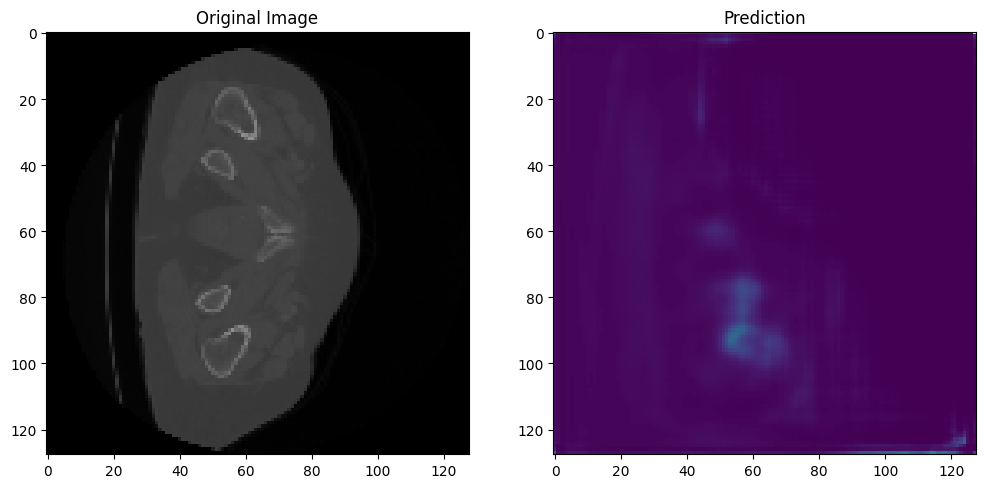

1/1 [==============================] - 0s 25ms/step


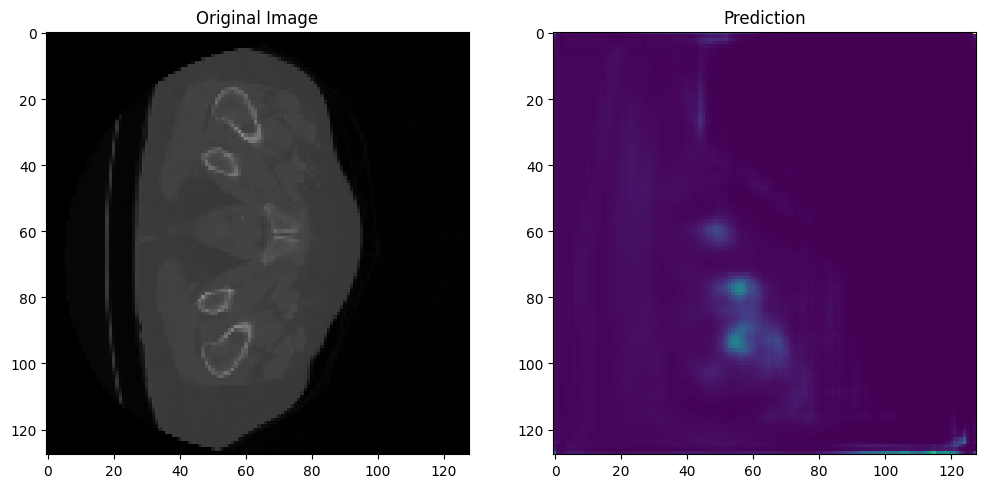

1/1 [==============================] - 0s 28ms/step


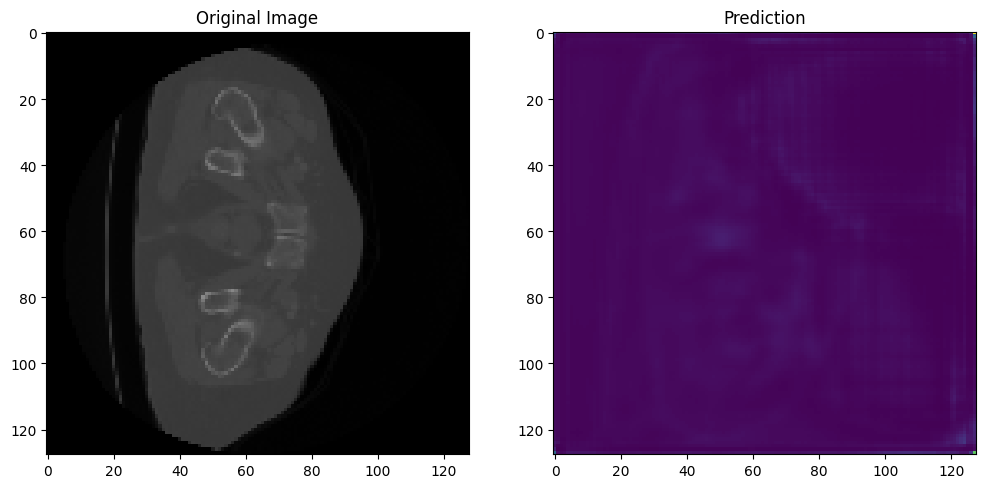

1/1 [==============================] - 0s 23ms/step


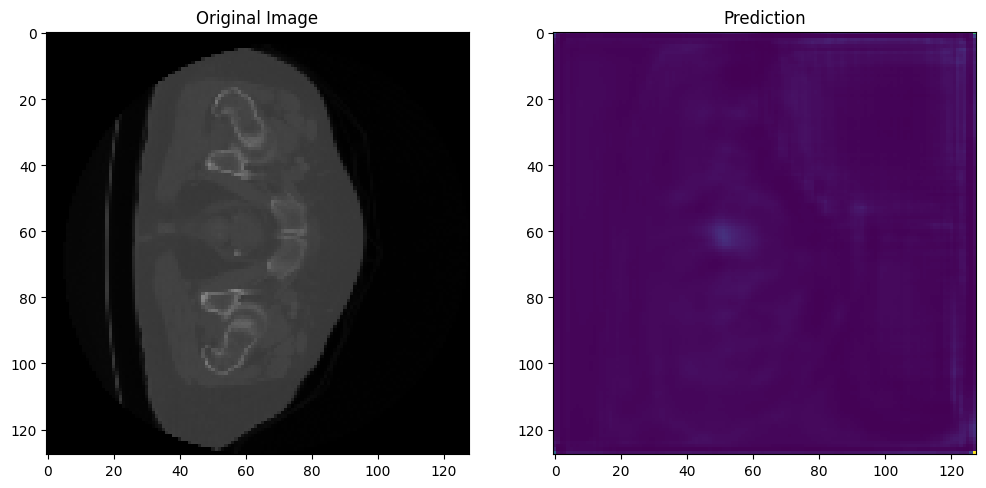

1/1 [==============================] - 0s 24ms/step


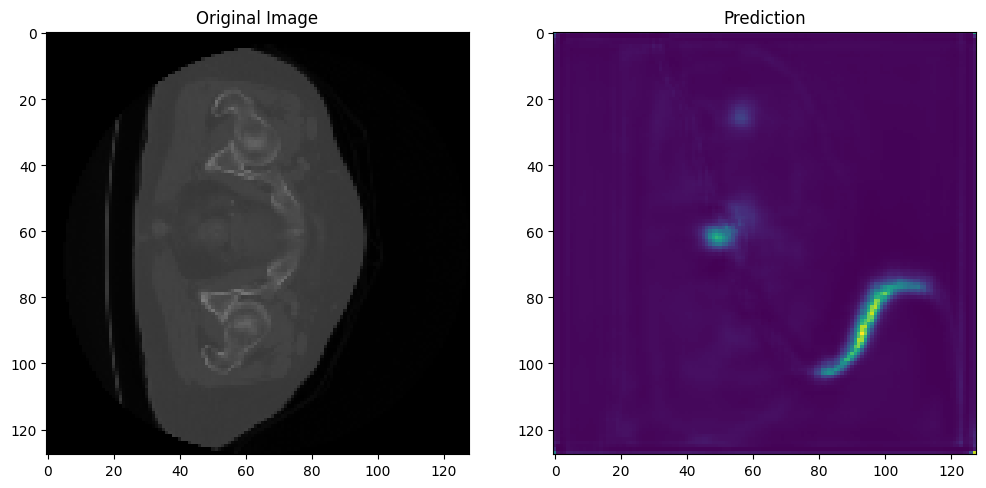

1/1 [==============================] - 0s 23ms/step


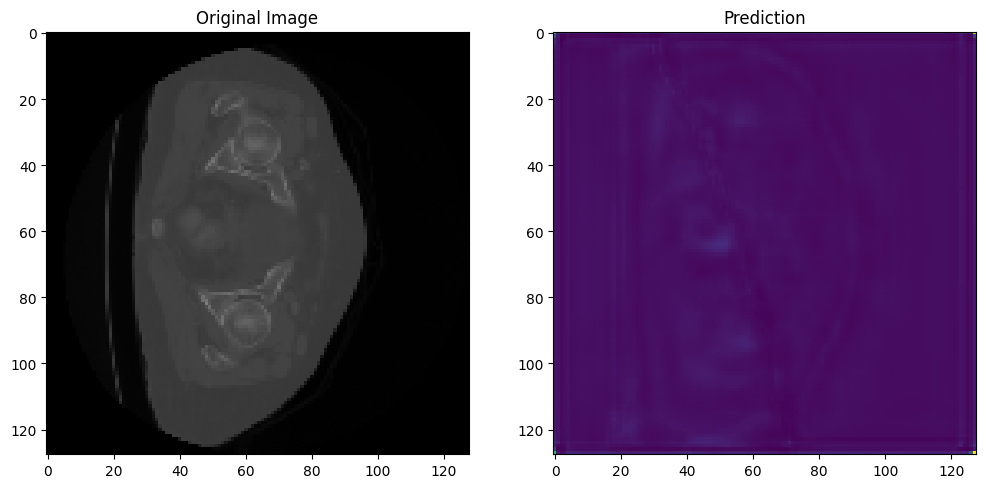

1/1 [==============================] - 0s 22ms/step


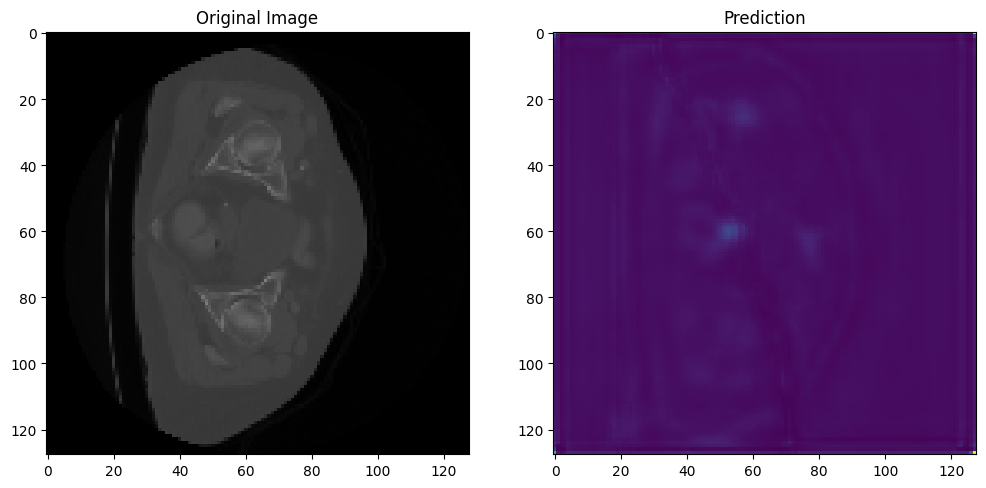

1/1 [==============================] - 0s 36ms/step


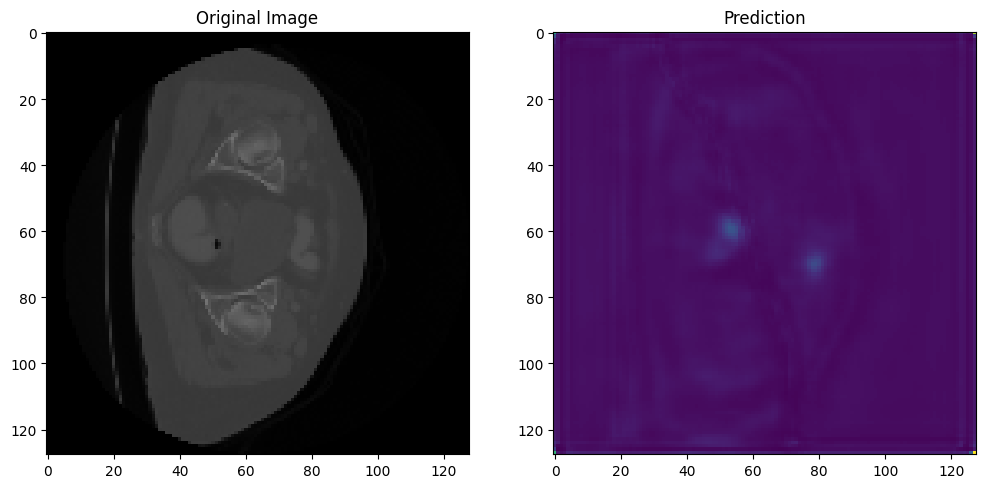

1/1 [==============================] - 0s 34ms/step


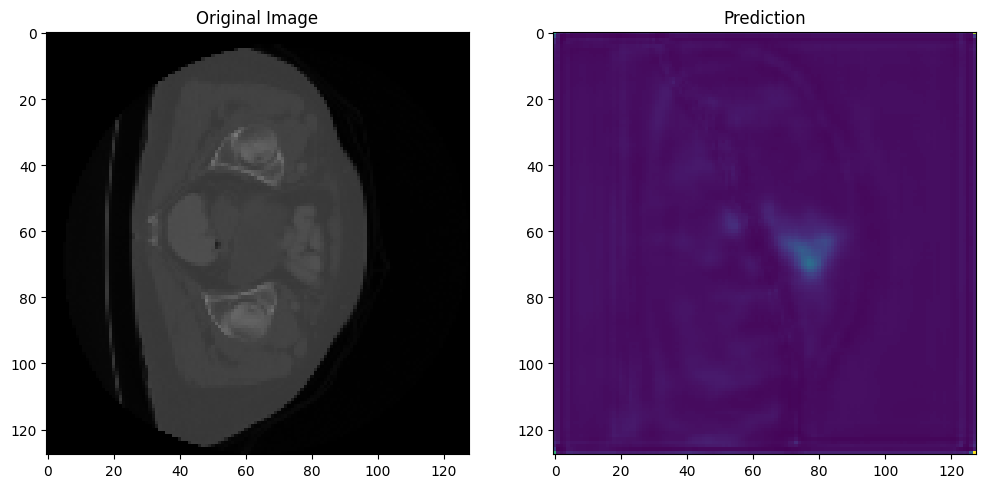

1/1 [==============================] - 0s 34ms/step


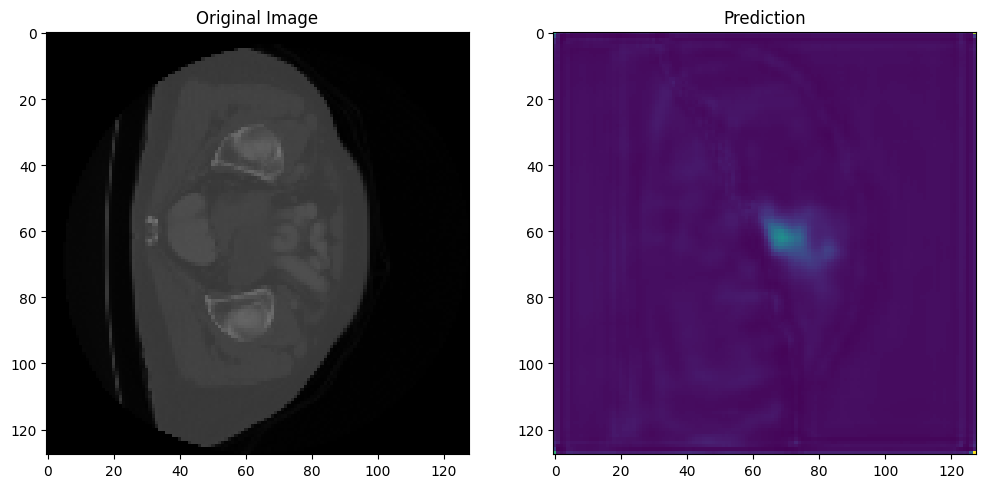

1/1 [==============================] - 0s 34ms/step


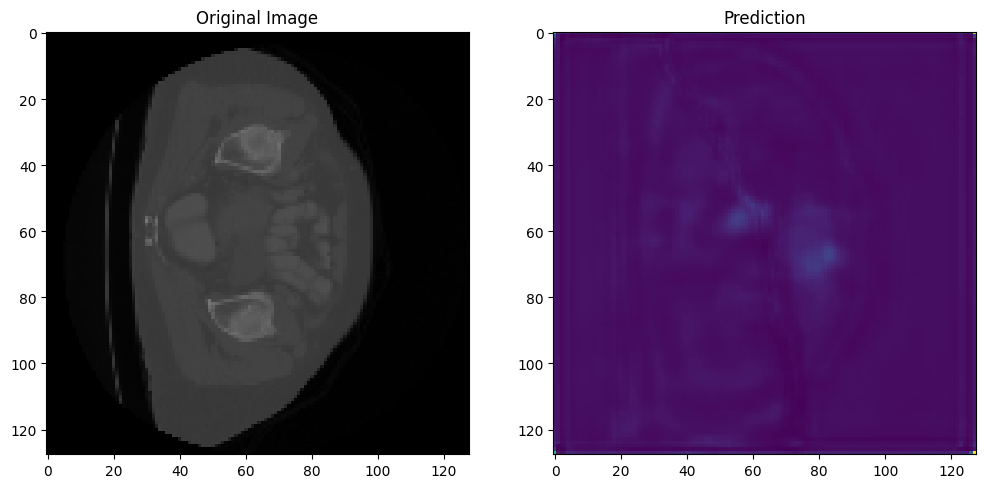

1/1 [==============================] - 0s 41ms/step


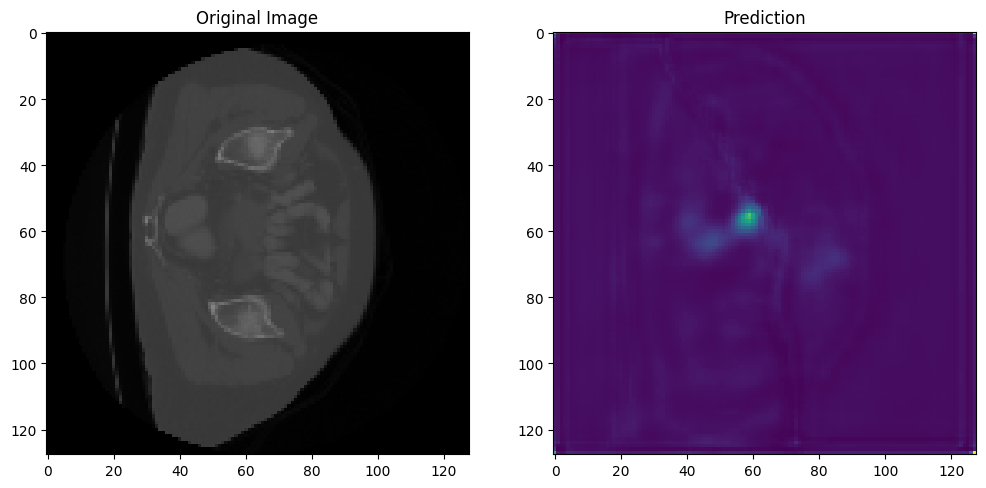

1/1 [==============================] - 0s 23ms/step


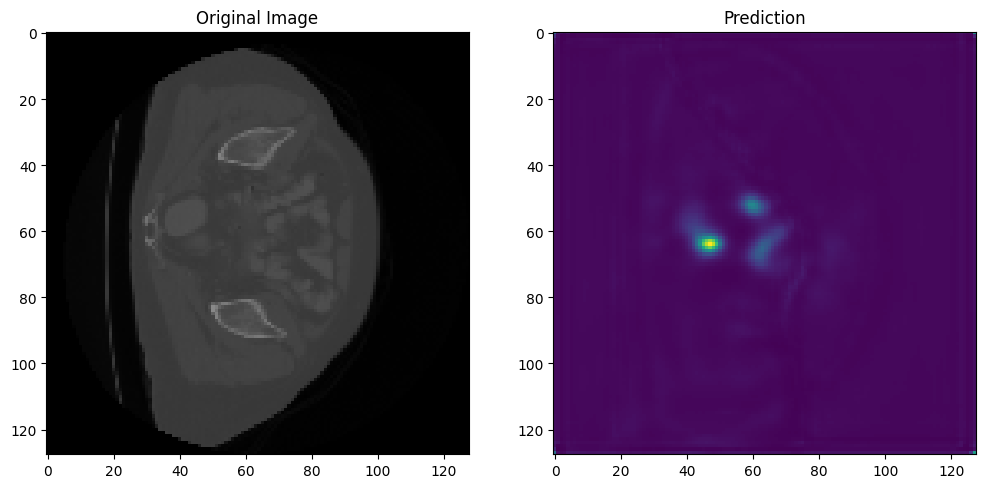

1/1 [==============================] - 0s 25ms/step


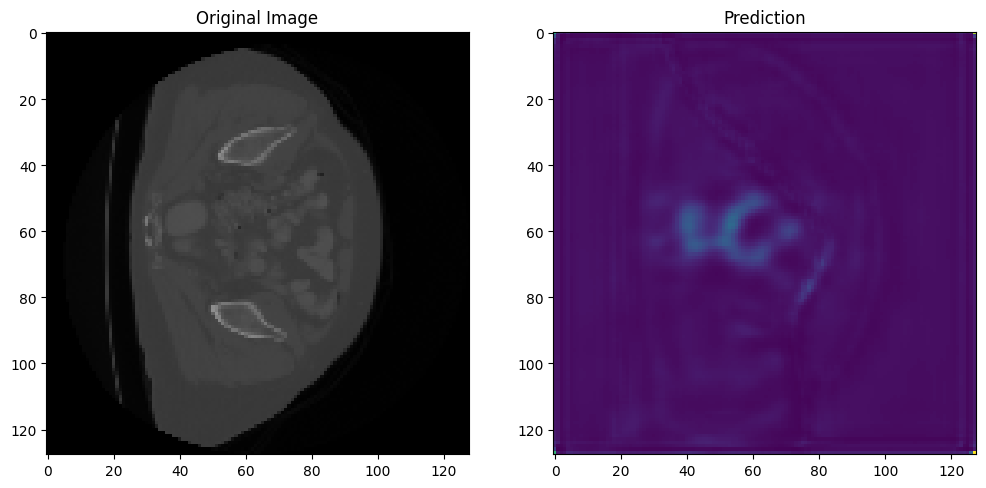

1/1 [==============================] - 0s 22ms/step


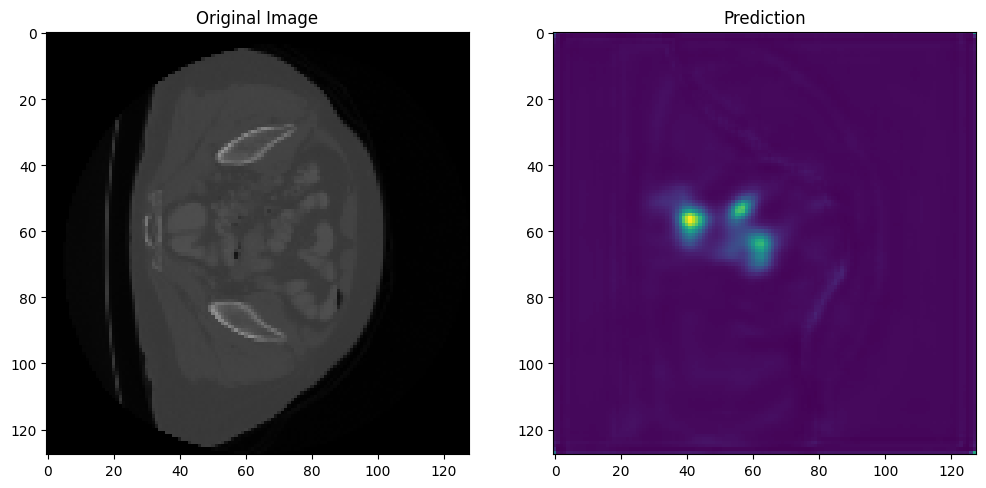

1/1 [==============================] - 0s 25ms/step


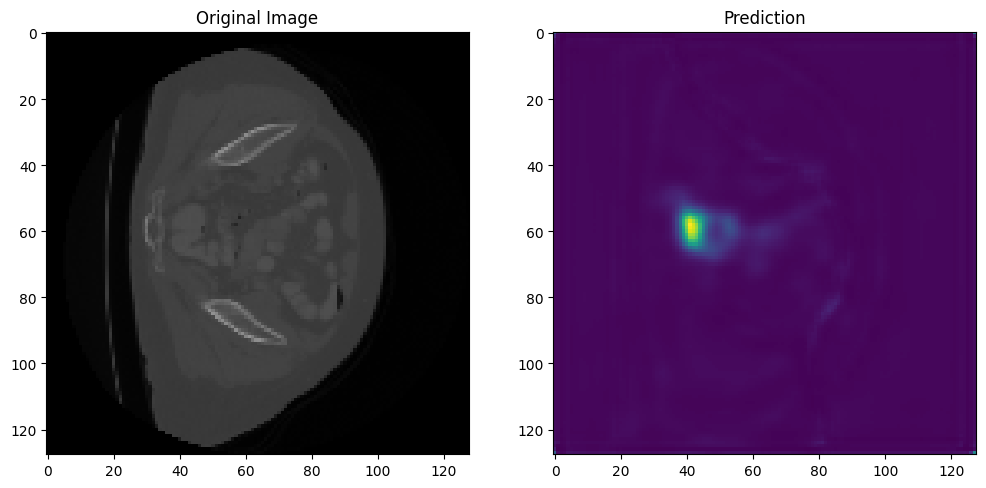

1/1 [==============================] - 0s 24ms/step


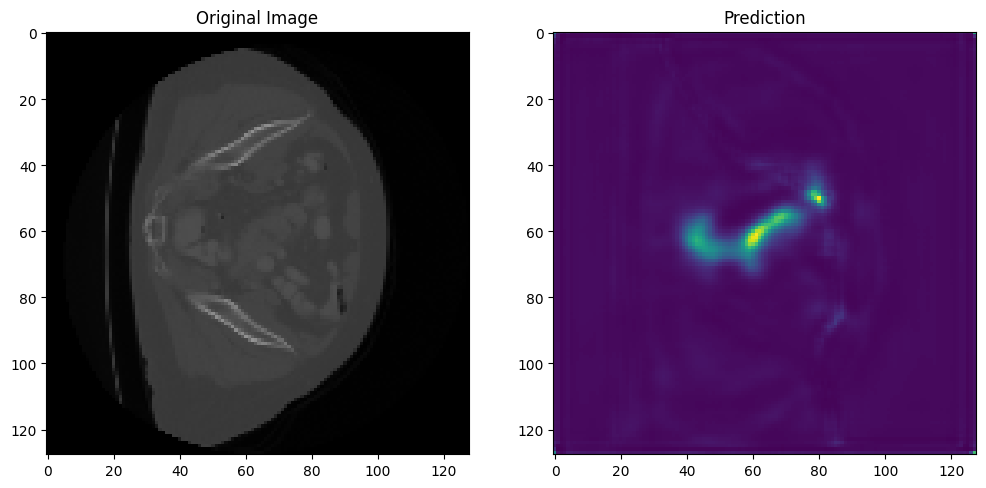

1/1 [==============================] - 0s 22ms/step


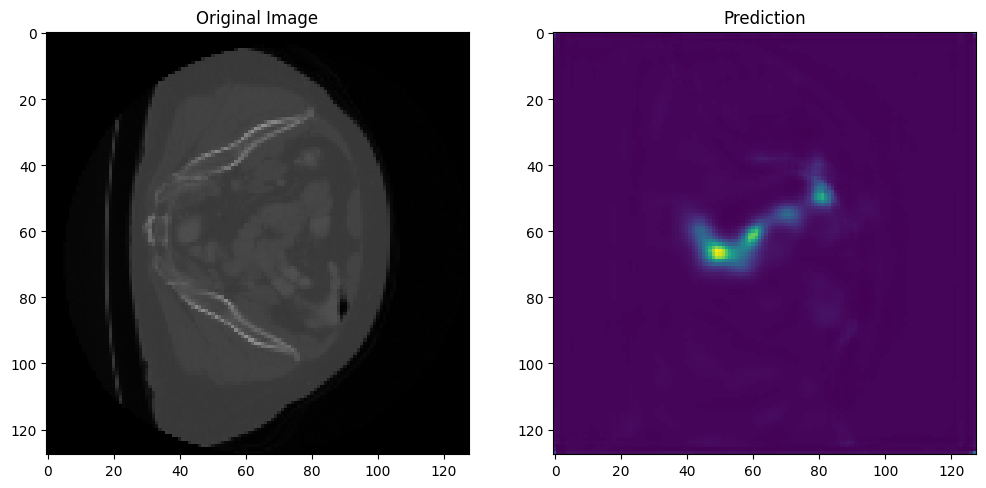

1/1 [==============================] - 0s 22ms/step


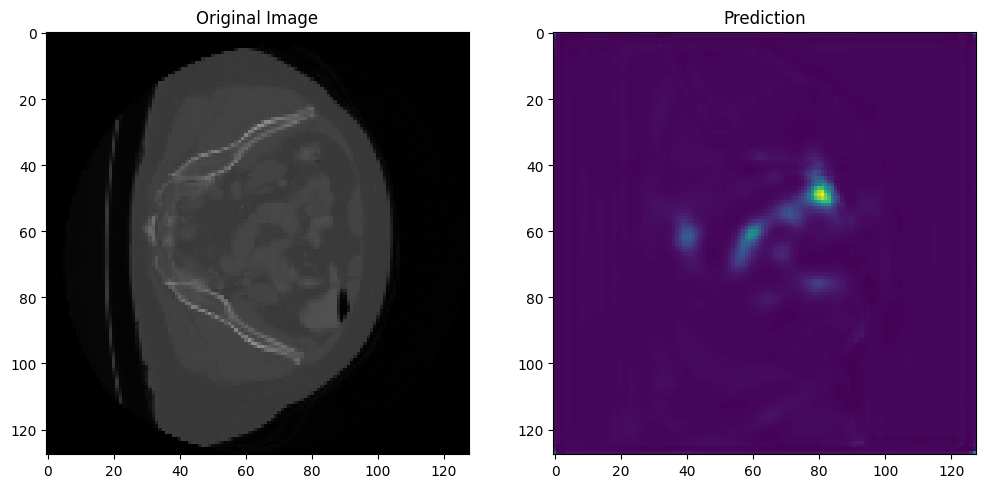

1/1 [==============================] - 0s 23ms/step


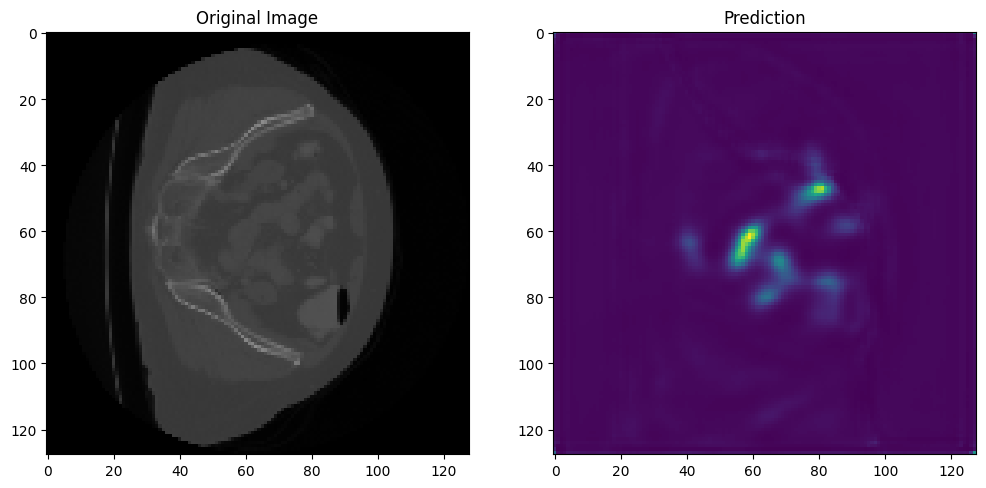

1/1 [==============================] - 0s 32ms/step


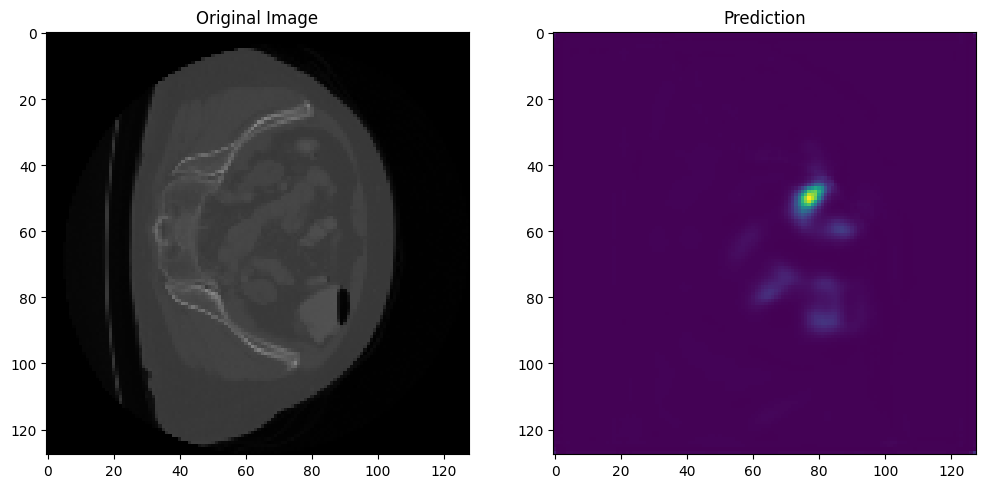

1/1 [==============================] - 0s 22ms/step


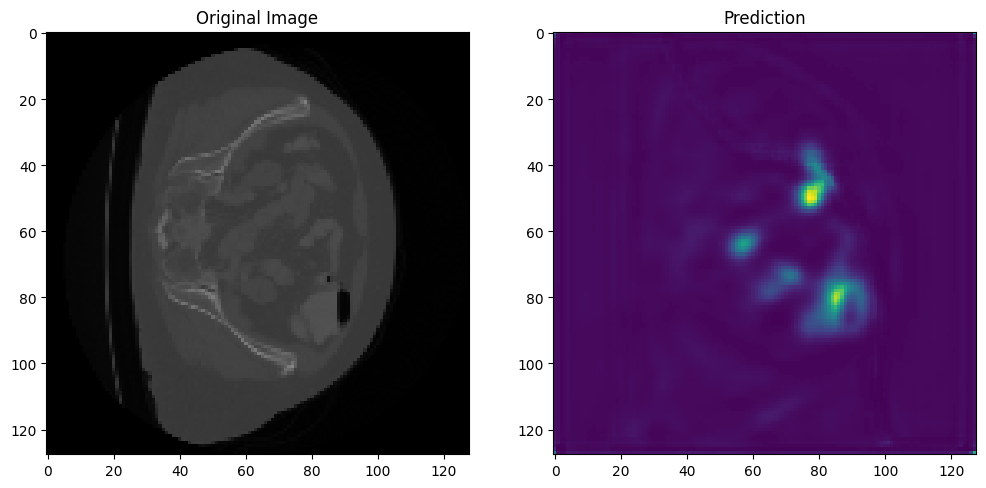

1/1 [==============================] - 0s 23ms/step


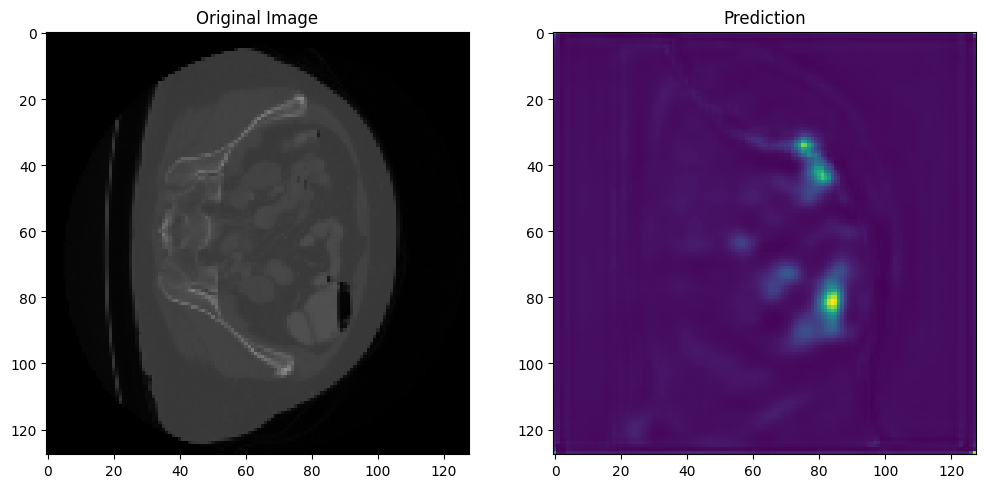

1/1 [==============================] - 0s 23ms/step


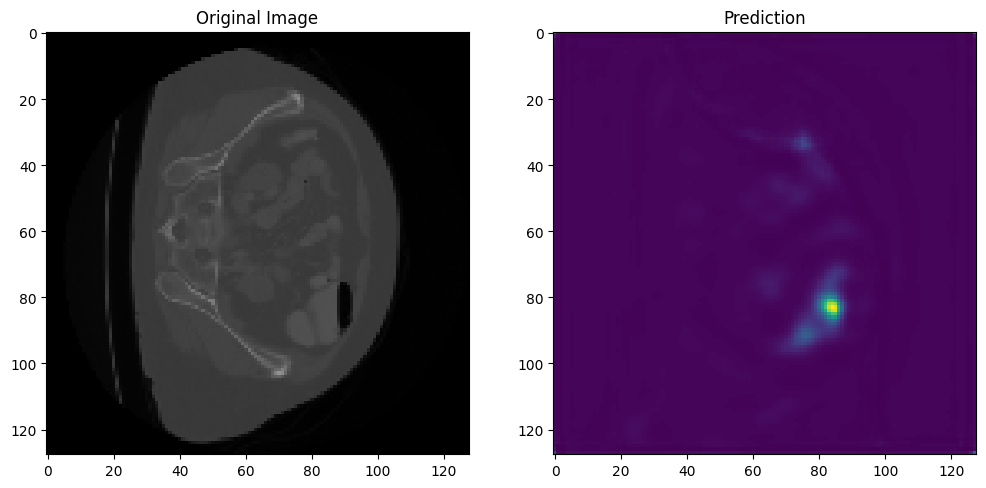

1/1 [==============================] - 0s 22ms/step


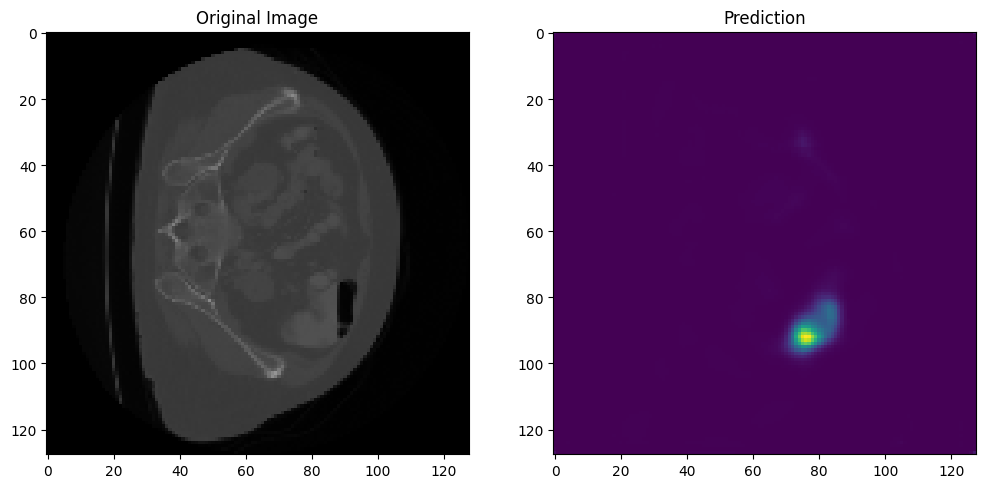

1/1 [==============================] - 0s 31ms/step


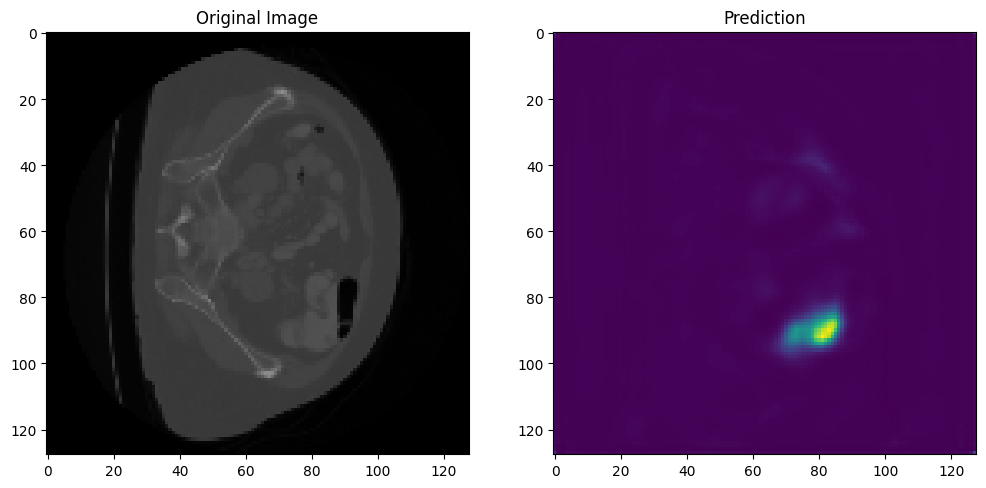

1/1 [==============================] - 0s 22ms/step


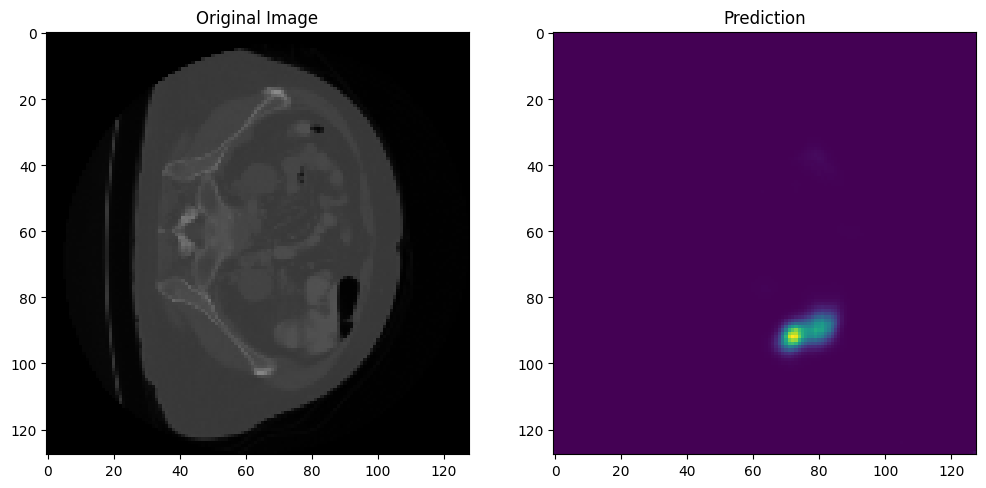

1/1 [==============================] - 0s 23ms/step


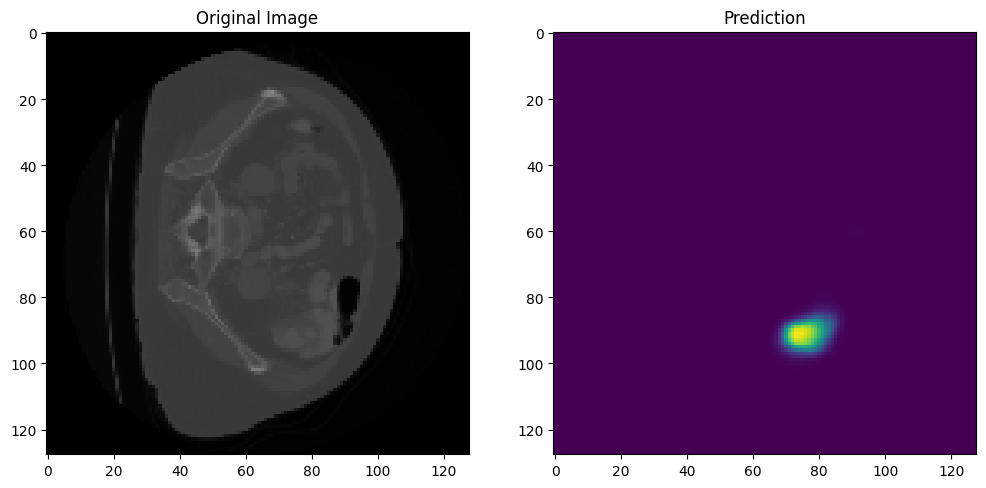

1/1 [==============================] - 0s 25ms/step


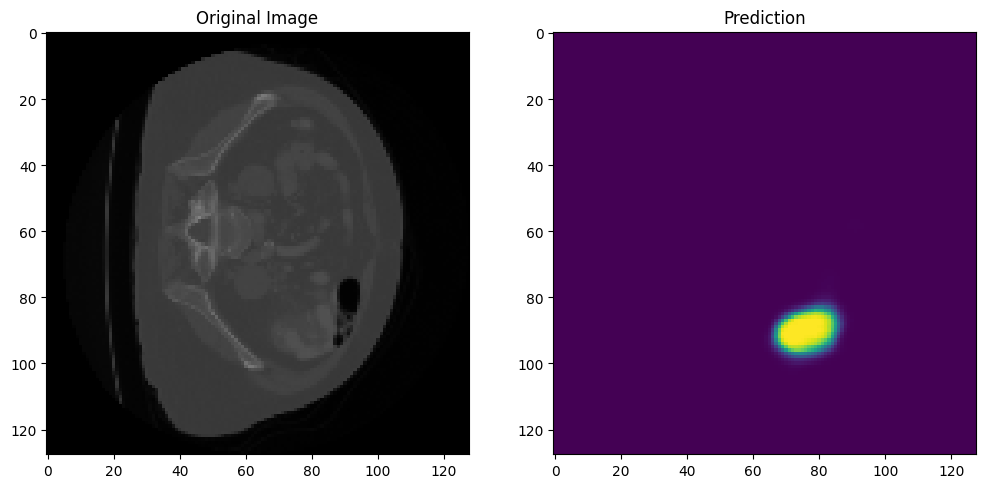

1/1 [==============================] - 0s 32ms/step


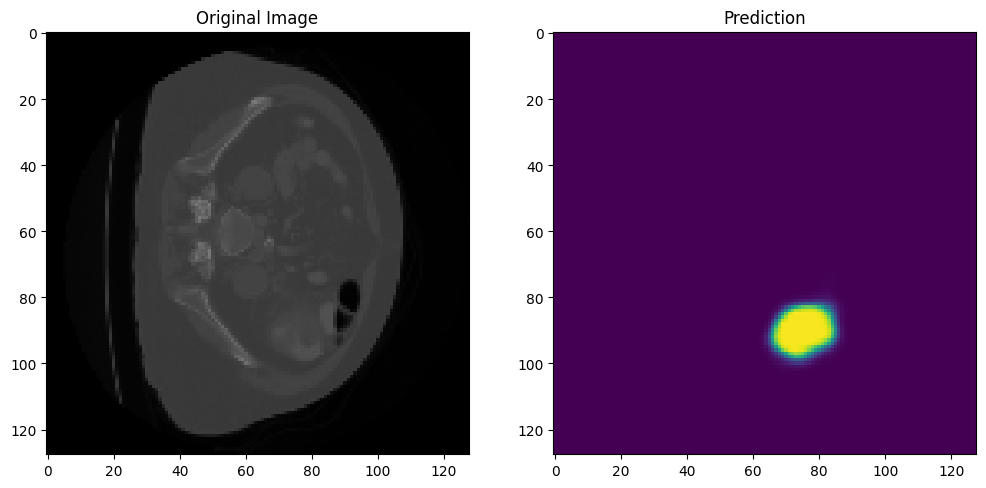

1/1 [==============================] - 0s 24ms/step


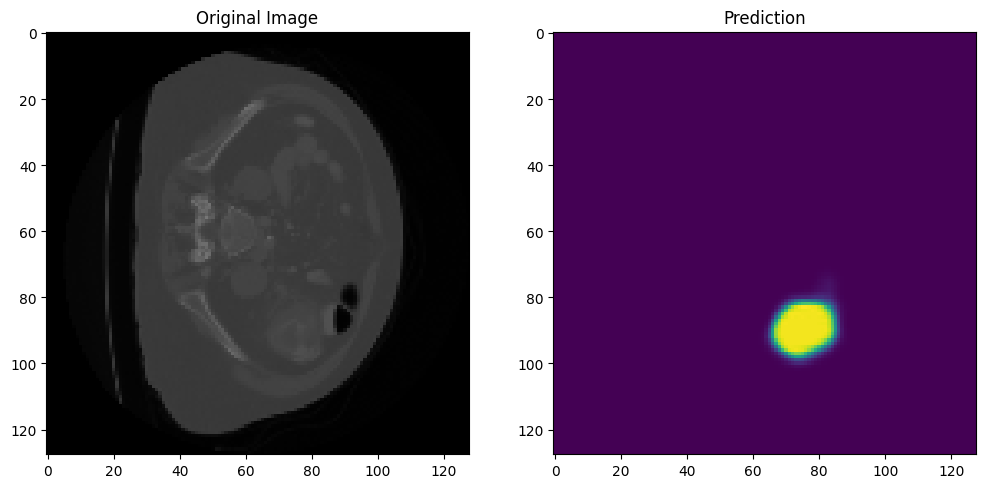

1/1 [==============================] - 0s 23ms/step


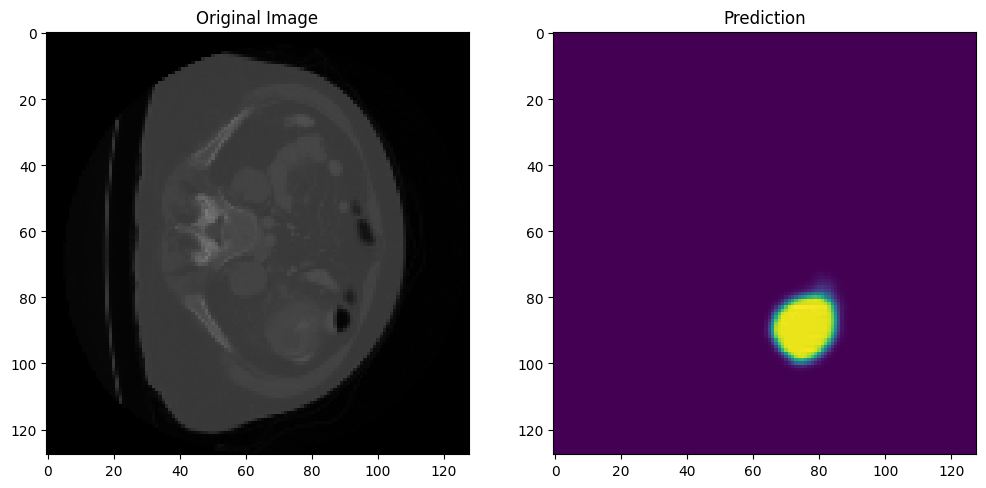

1/1 [==============================] - 0s 26ms/step


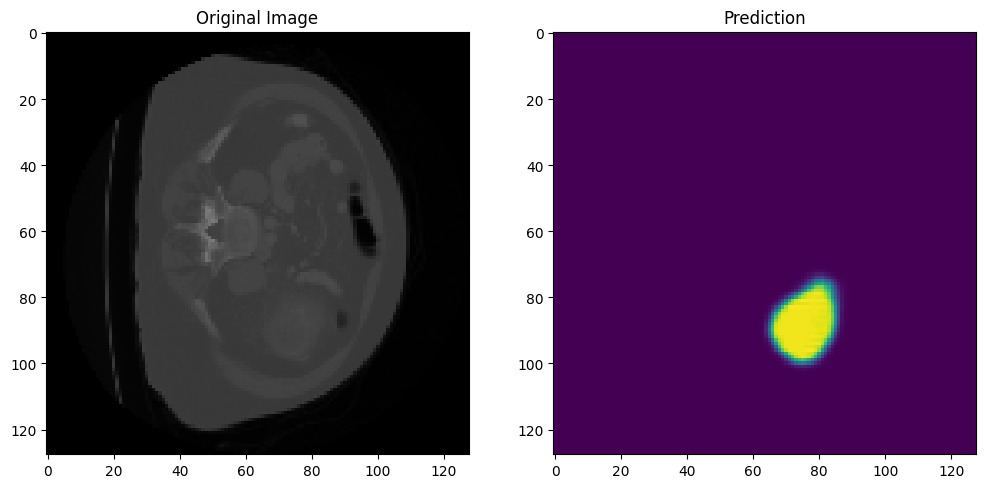

1/1 [==============================] - 0s 36ms/step


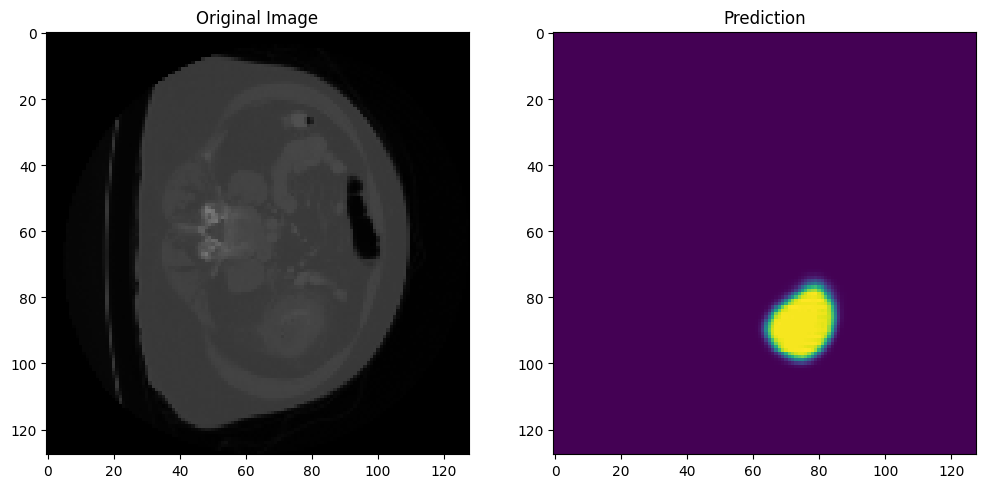

1/1 [==============================] - 0s 35ms/step


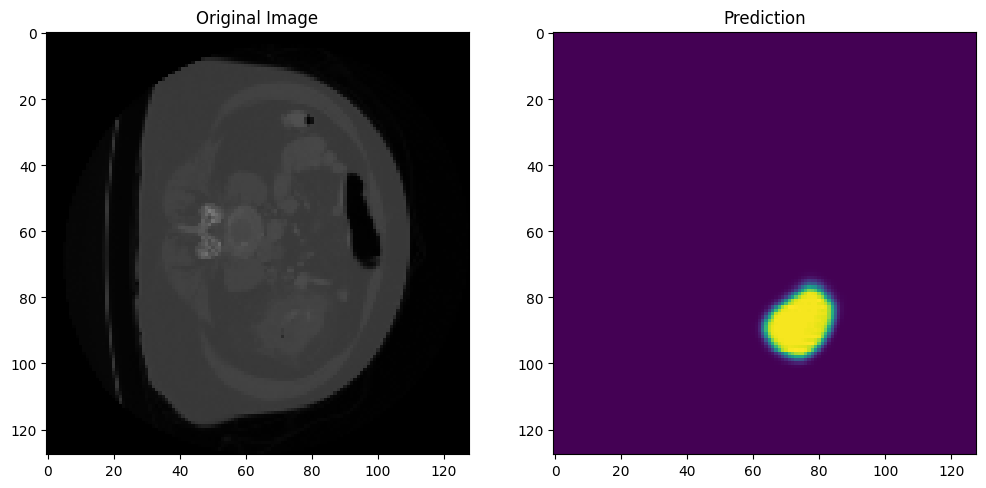

1/1 [==============================] - 0s 35ms/step


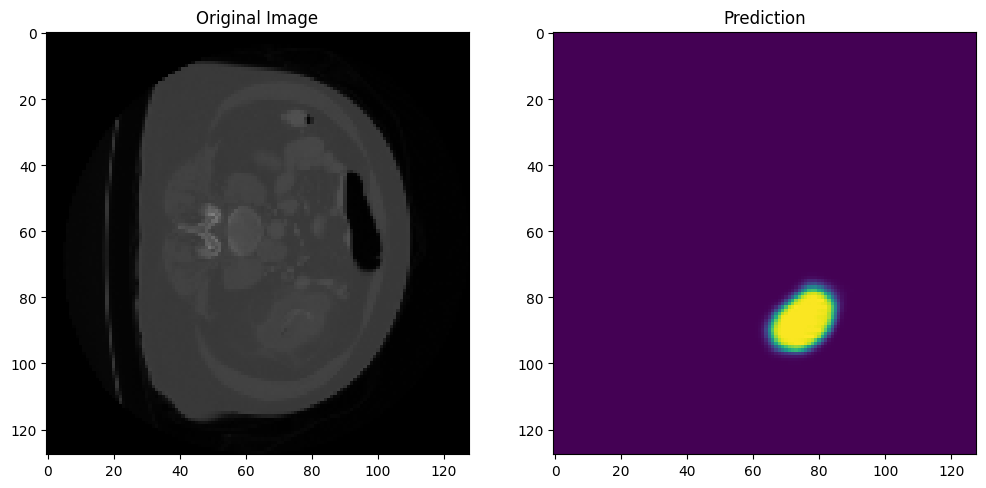

1/1 [==============================] - 0s 37ms/step


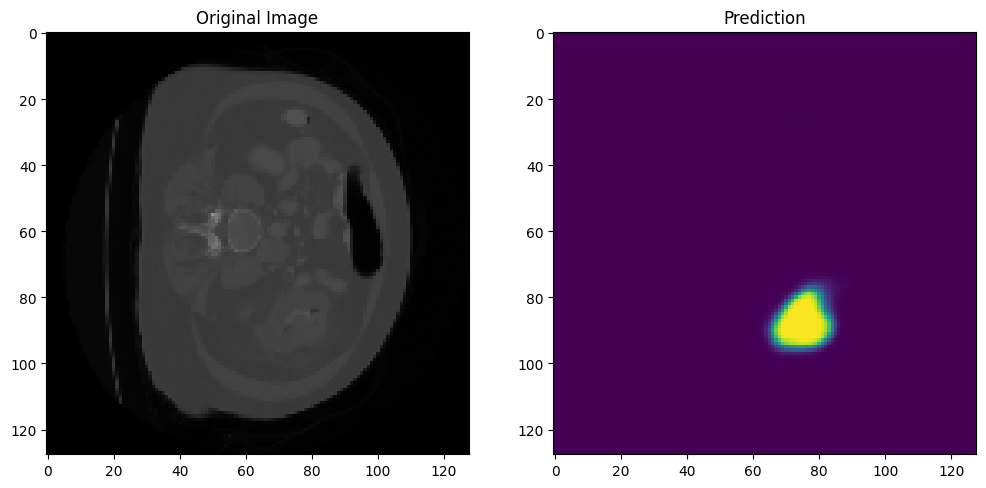

1/1 [==============================] - 0s 34ms/step


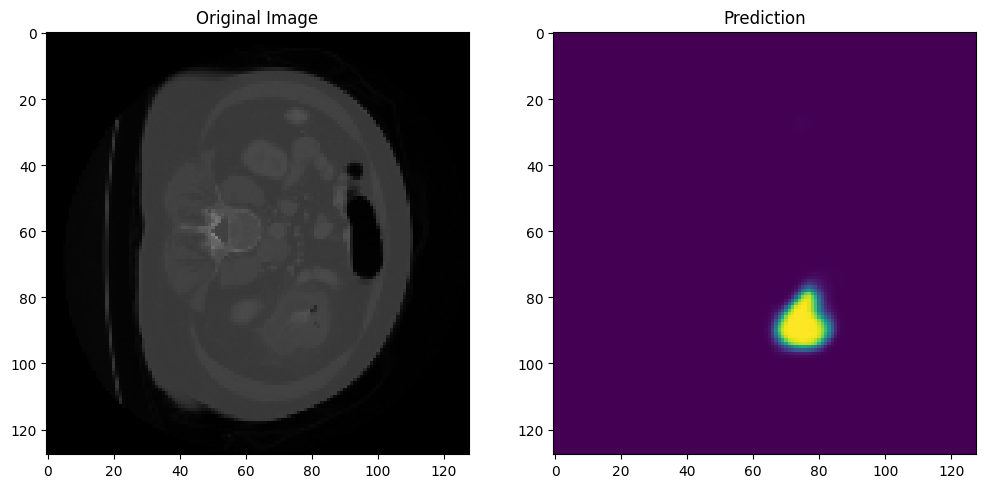

1/1 [==============================] - 0s 36ms/step


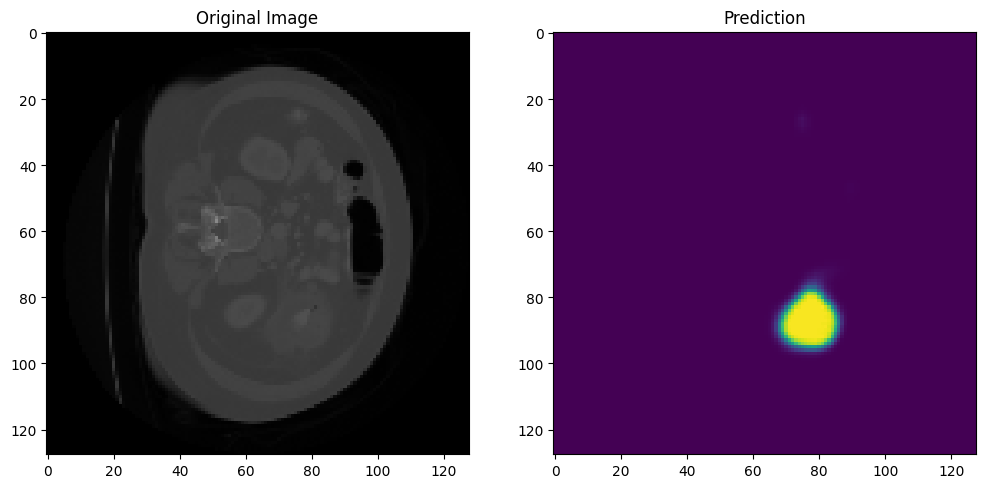

1/1 [==============================] - 0s 38ms/step


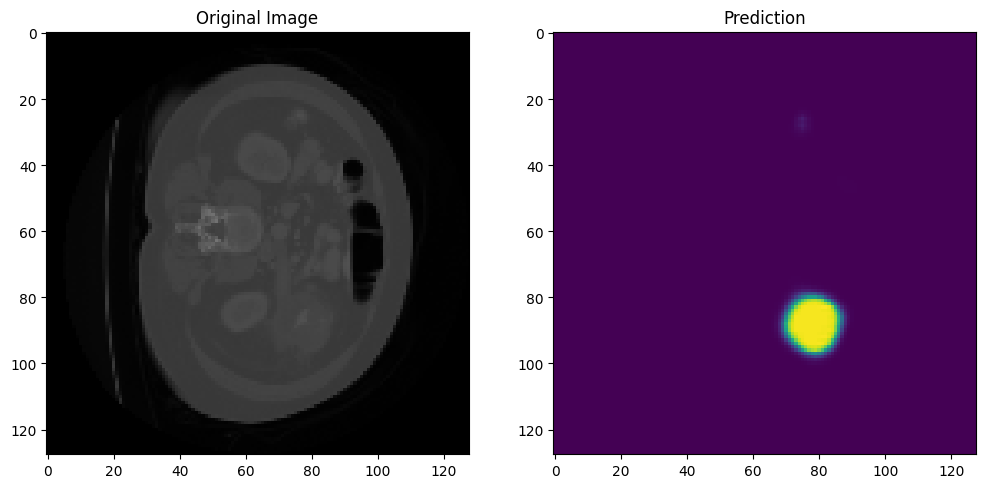

1/1 [==============================] - 0s 23ms/step


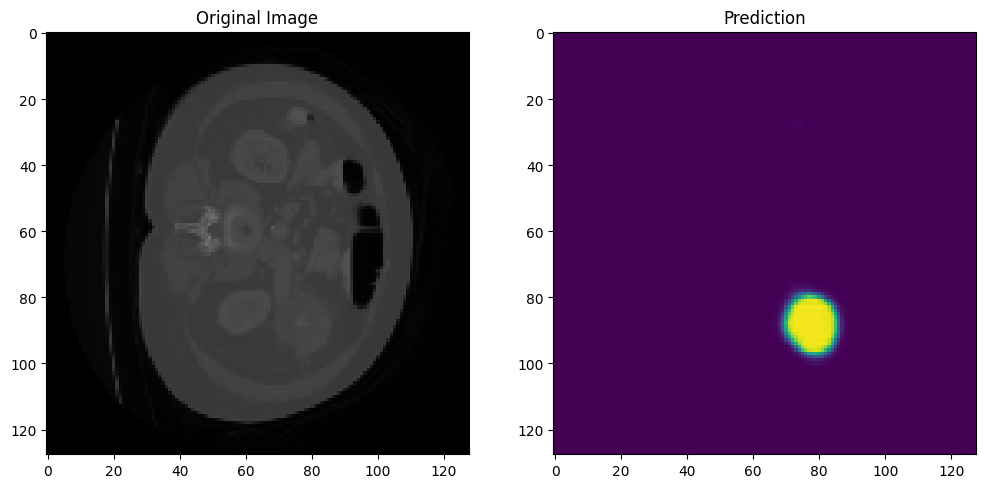

1/1 [==============================] - 0s 22ms/step


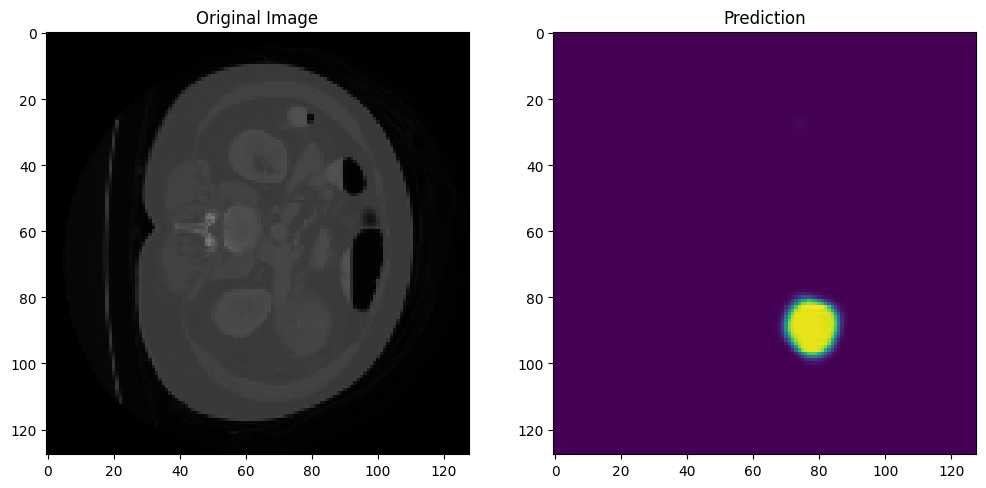

1/1 [==============================] - 0s 23ms/step


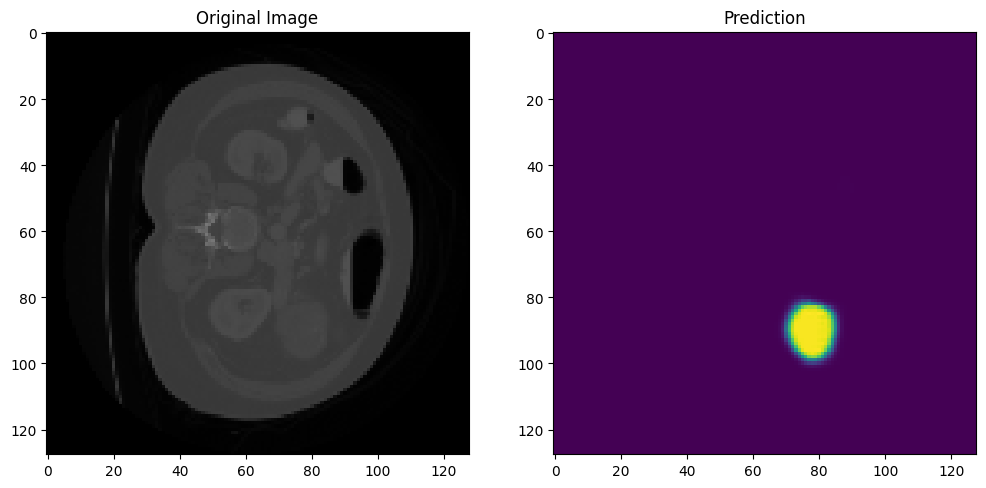

1/1 [==============================] - 0s 30ms/step


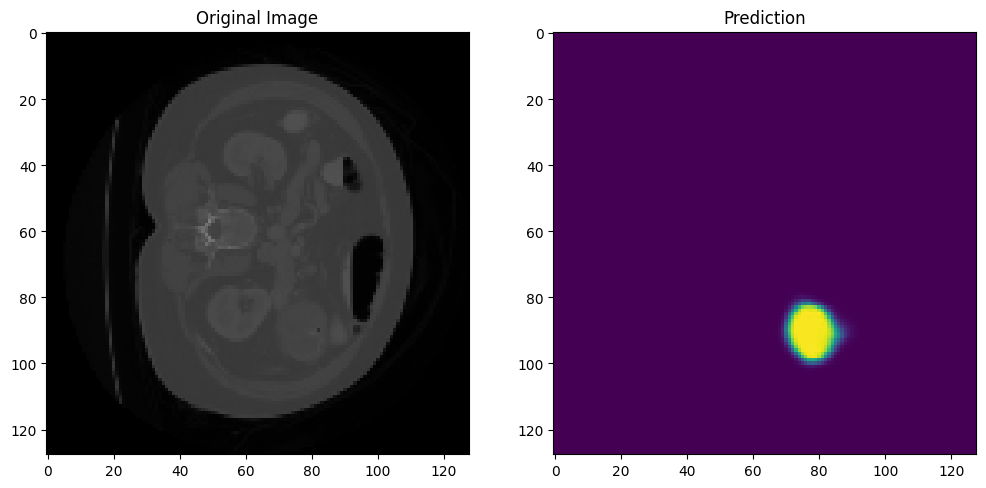

1/1 [==============================] - 0s 22ms/step


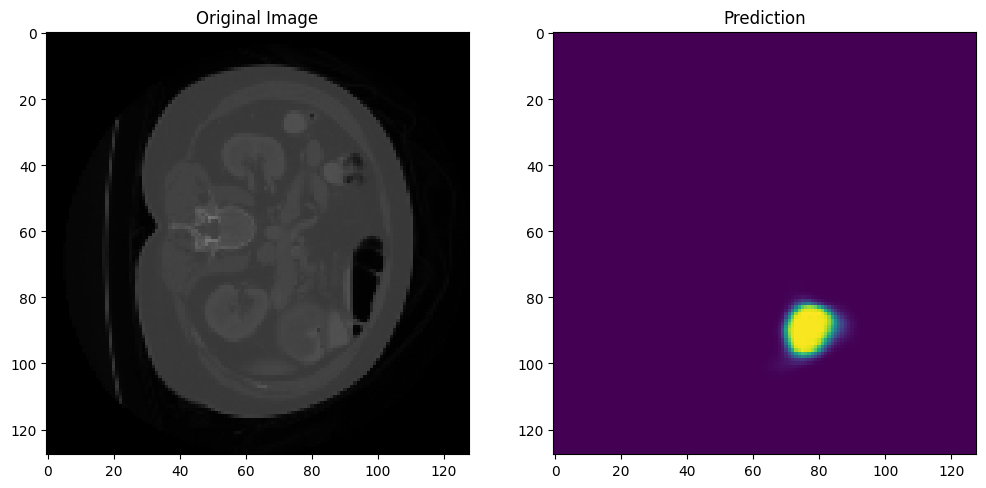

1/1 [==============================] - 0s 22ms/step


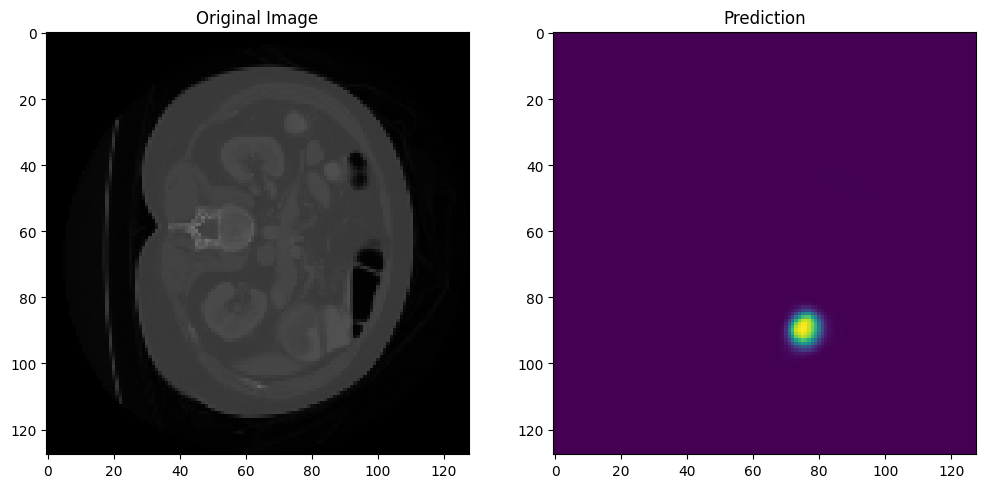

1/1 [==============================] - 0s 23ms/step


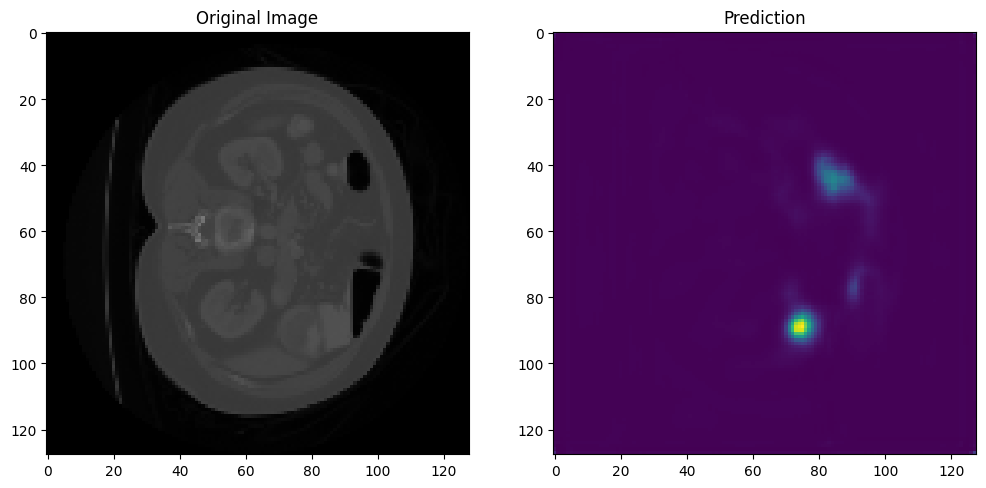

1/1 [==============================] - 0s 25ms/step


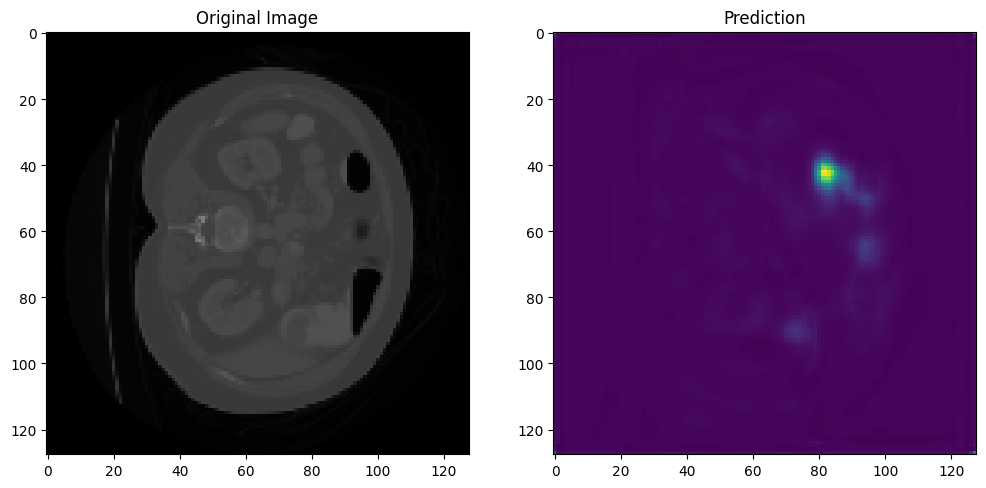

1/1 [==============================] - 0s 29ms/step


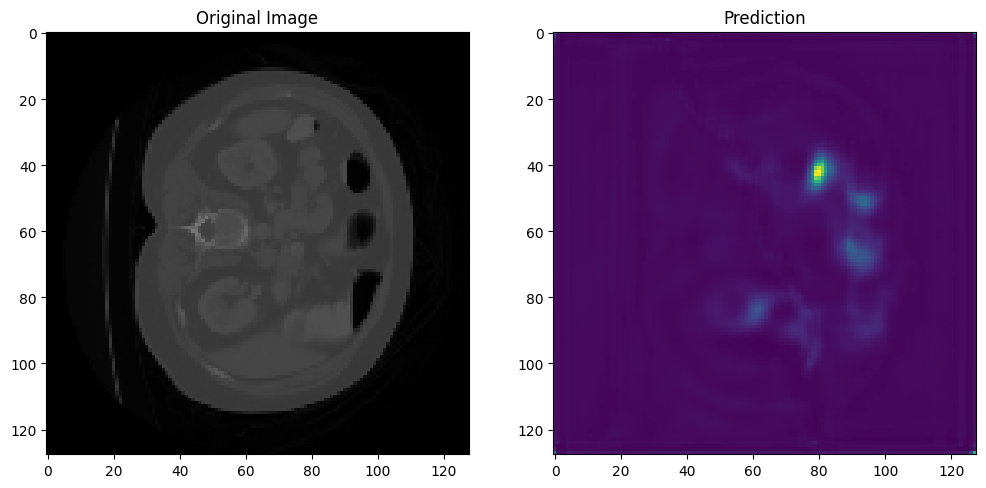

1/1 [==============================] - 0s 25ms/step


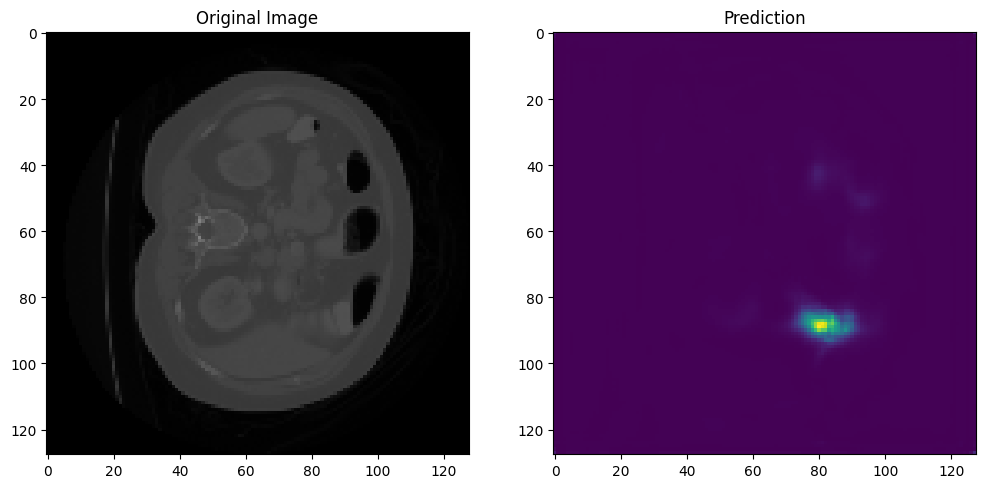

1/1 [==============================] - 0s 24ms/step


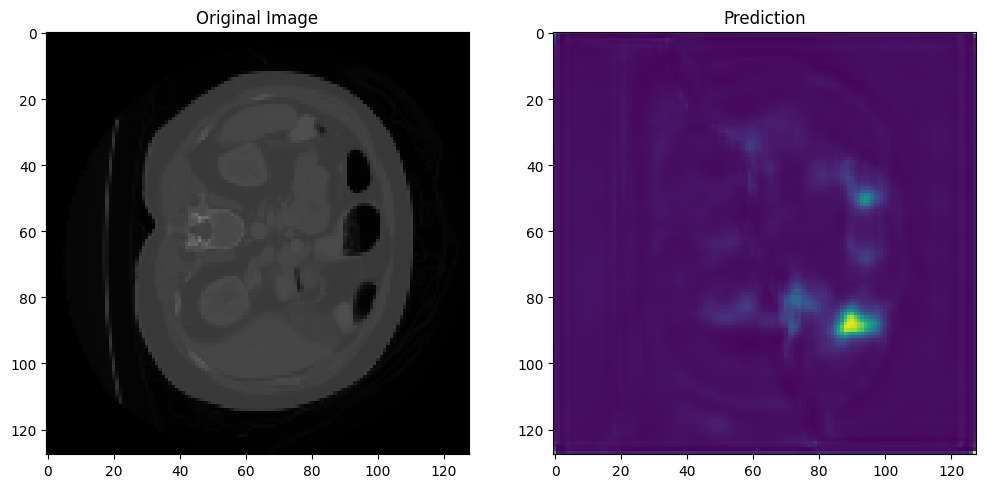

1/1 [==============================] - 0s 26ms/step


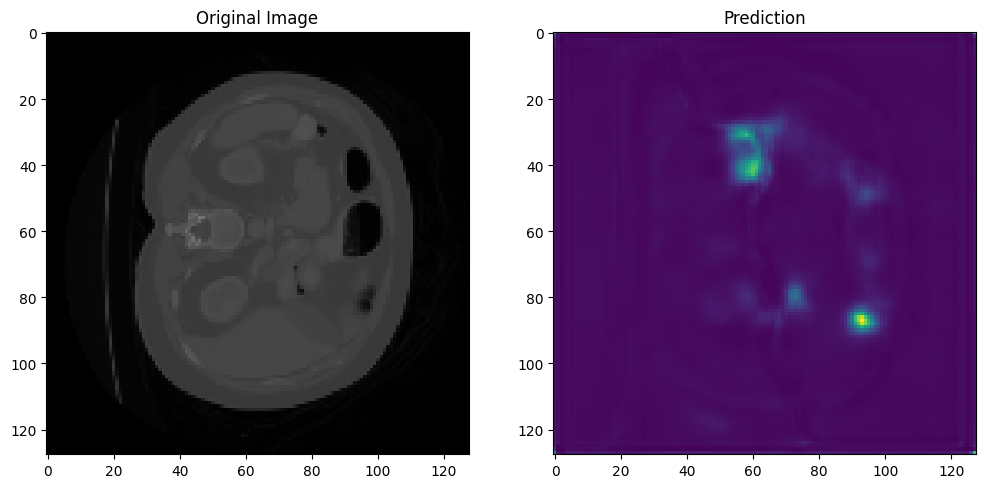

1/1 [==============================] - 0s 25ms/step


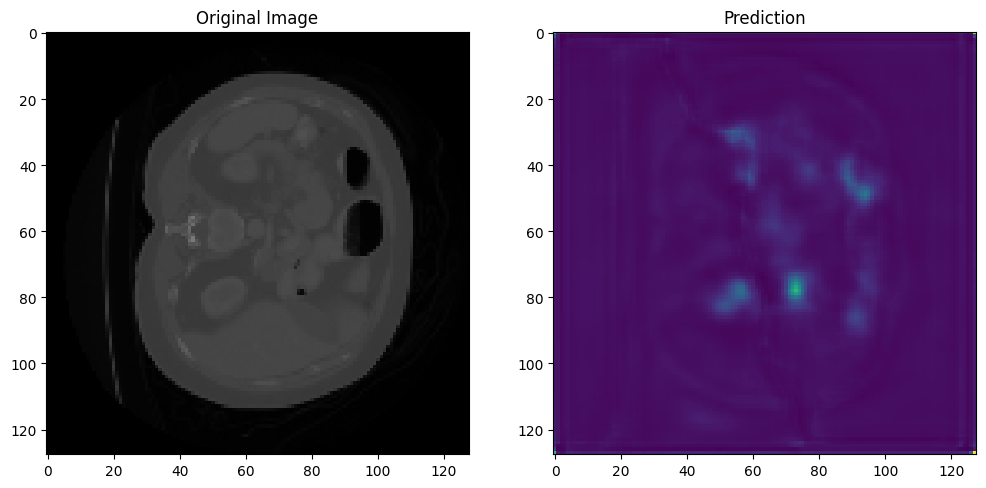

1/1 [==============================] - 0s 29ms/step


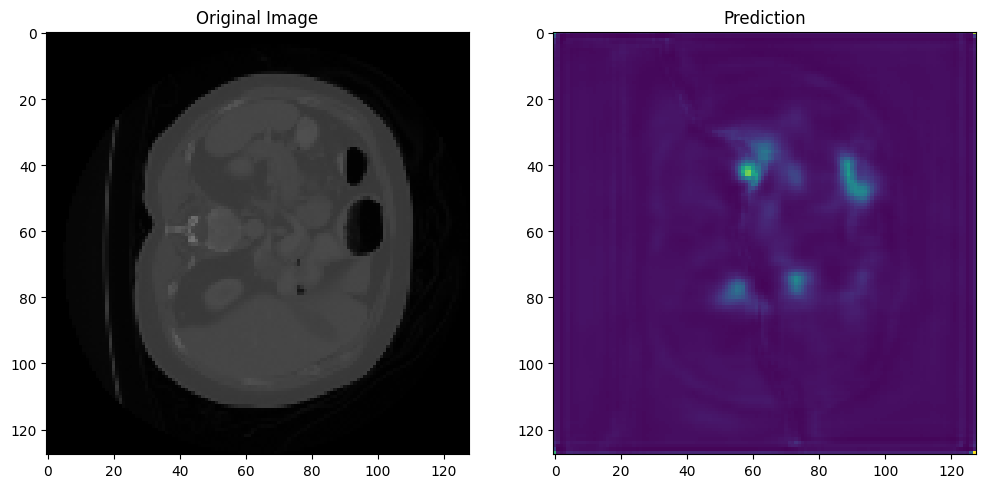

1/1 [==============================] - 0s 23ms/step


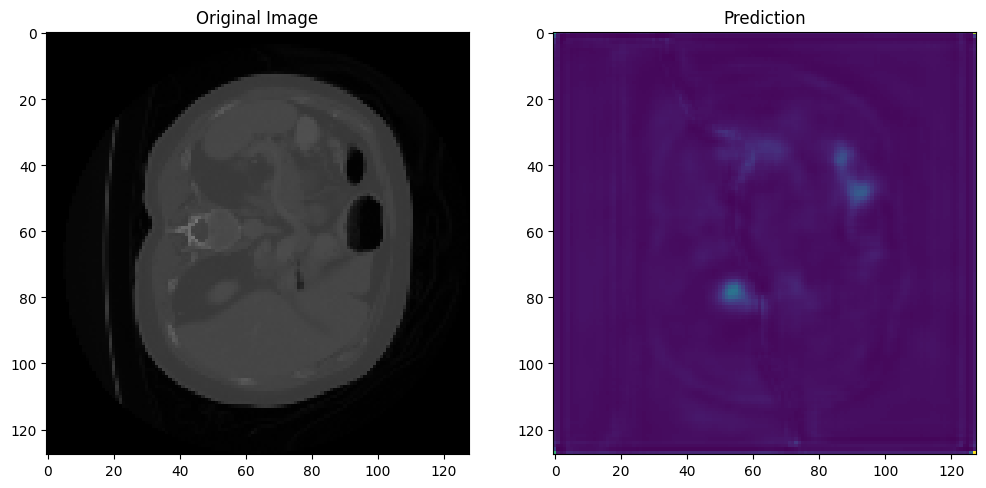

1/1 [==============================] - 0s 24ms/step


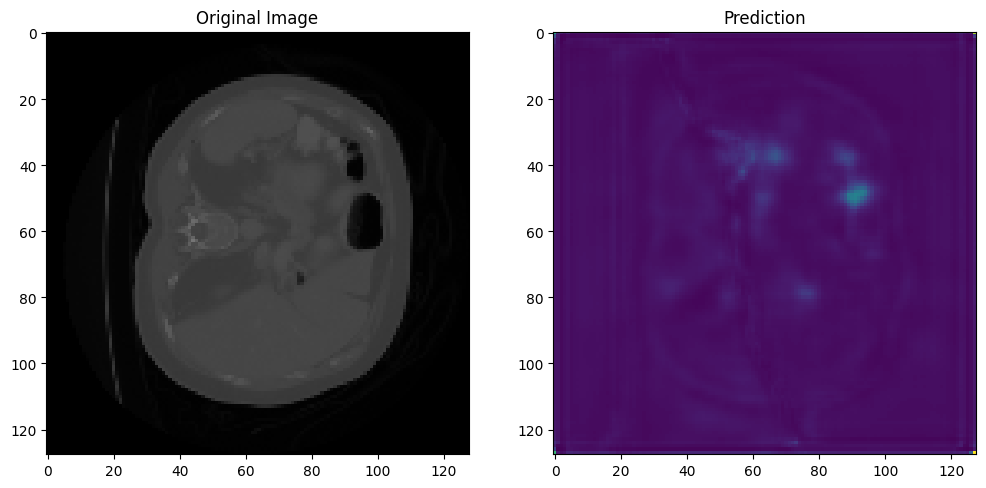

1/1 [==============================] - 0s 31ms/step


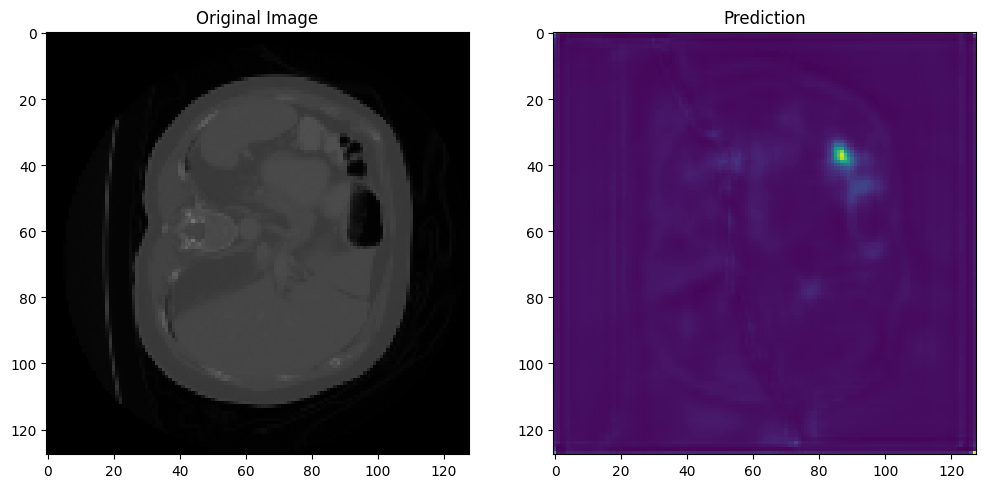

1/1 [==============================] - 0s 23ms/step


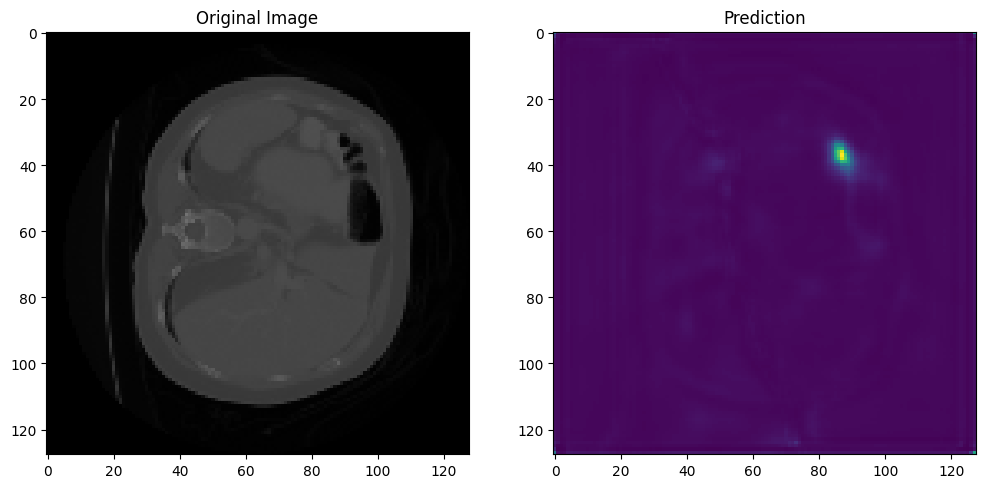

1/1 [==============================] - 0s 24ms/step


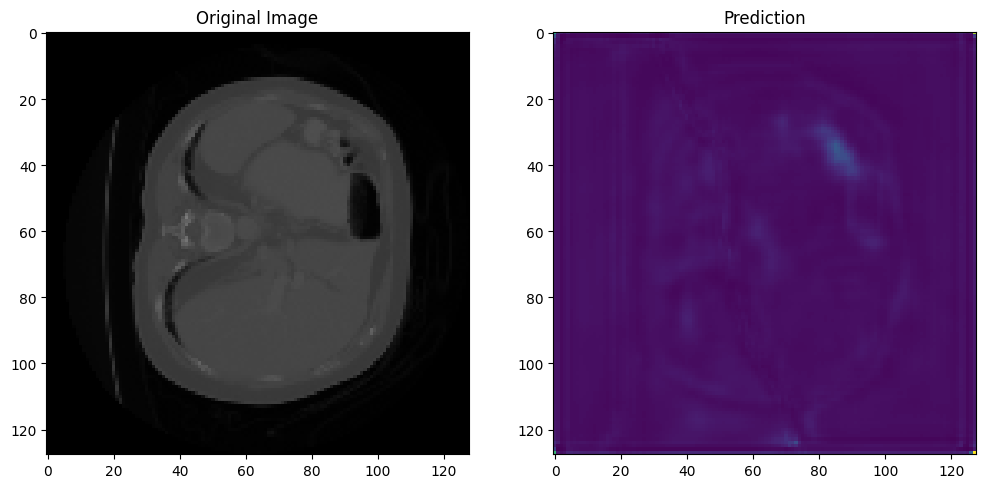

1/1 [==============================] - 0s 23ms/step


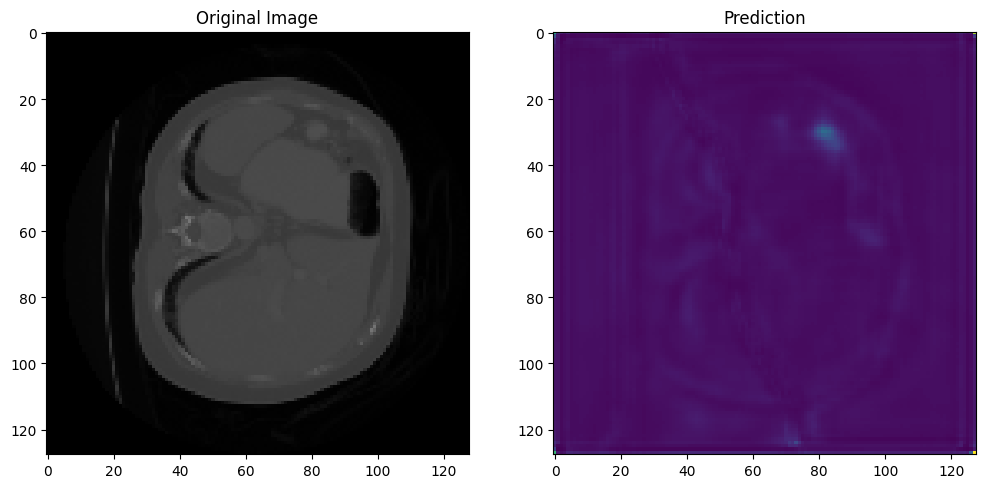

1/1 [==============================] - 0s 34ms/step


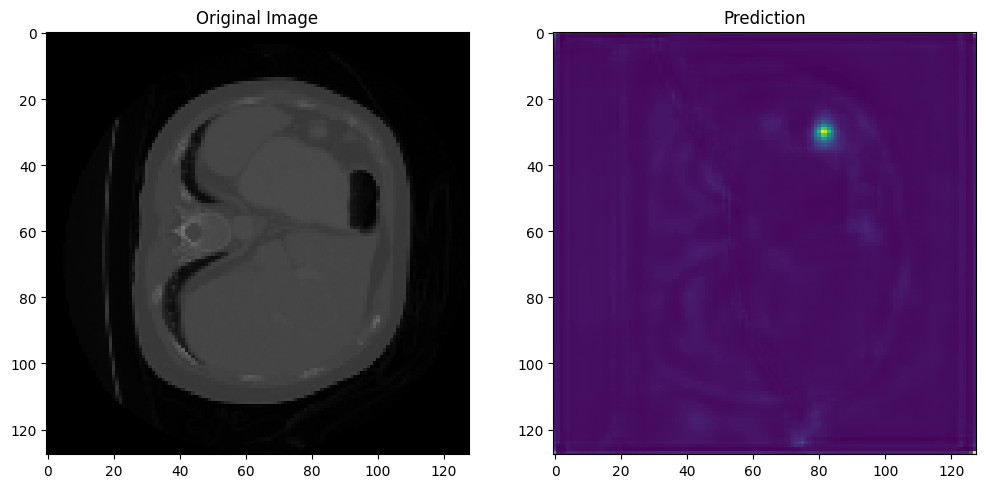

1/1 [==============================] - 0s 32ms/step


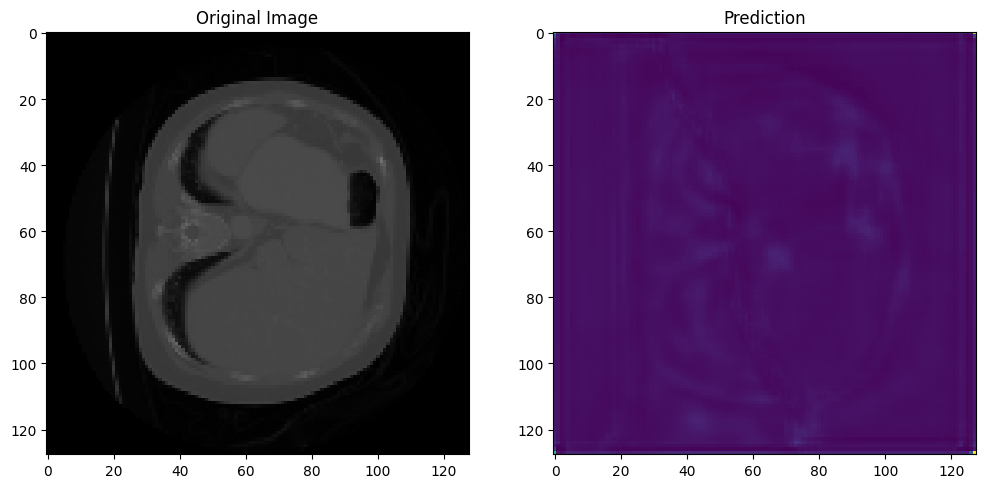

1/1 [==============================] - 0s 40ms/step


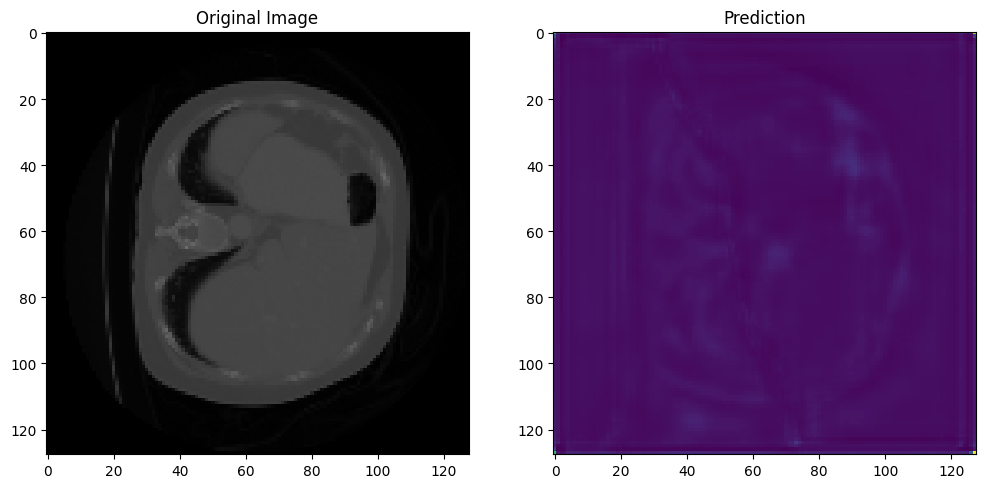

1/1 [==============================] - 0s 46ms/step


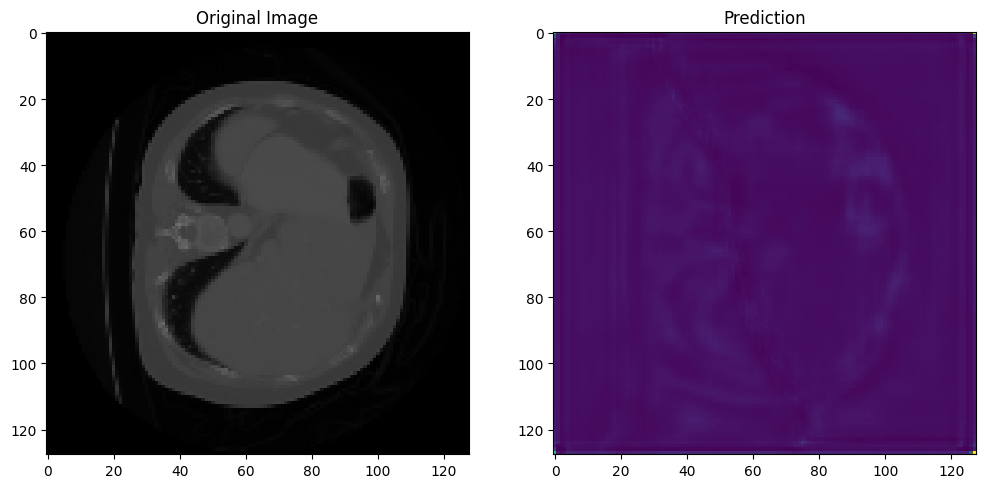

1/1 [==============================] - 0s 73ms/step


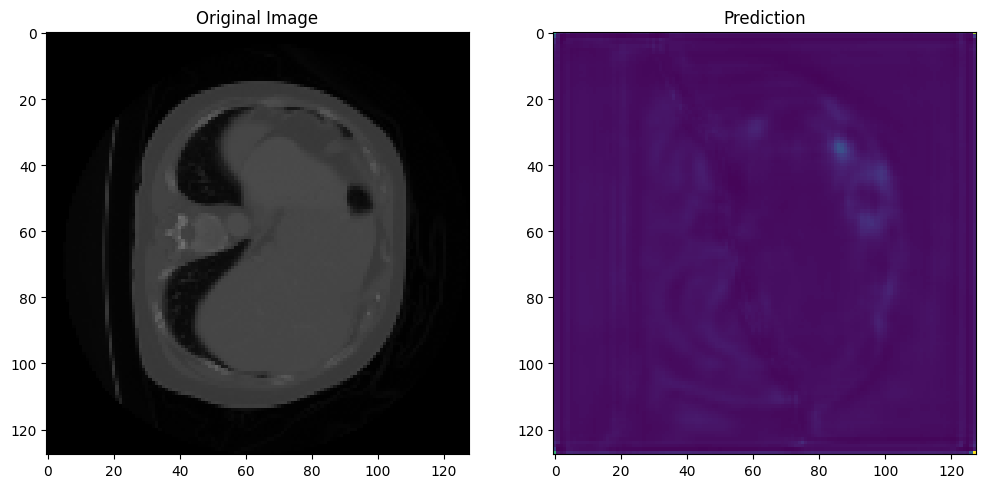

1/1 [==============================] - 0s 32ms/step


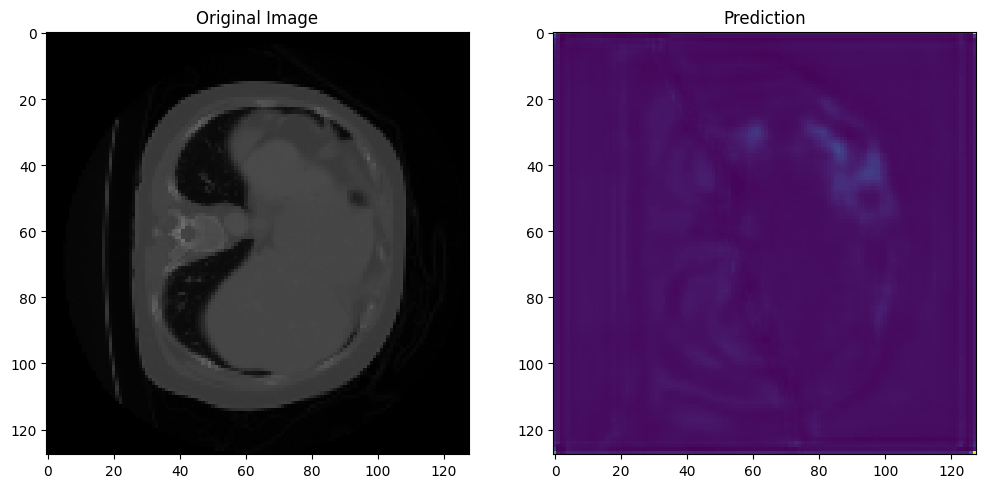

1/1 [==============================] - 0s 33ms/step


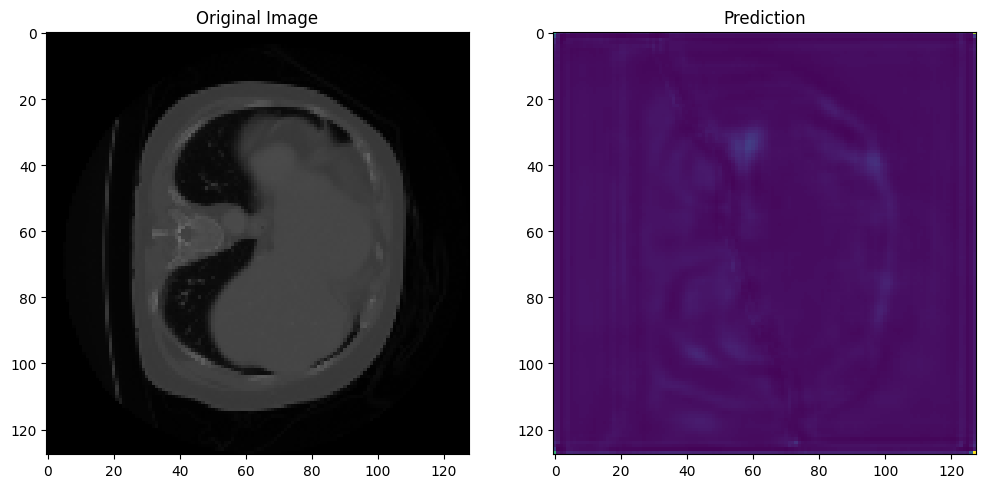

1/1 [==============================] - 0s 33ms/step


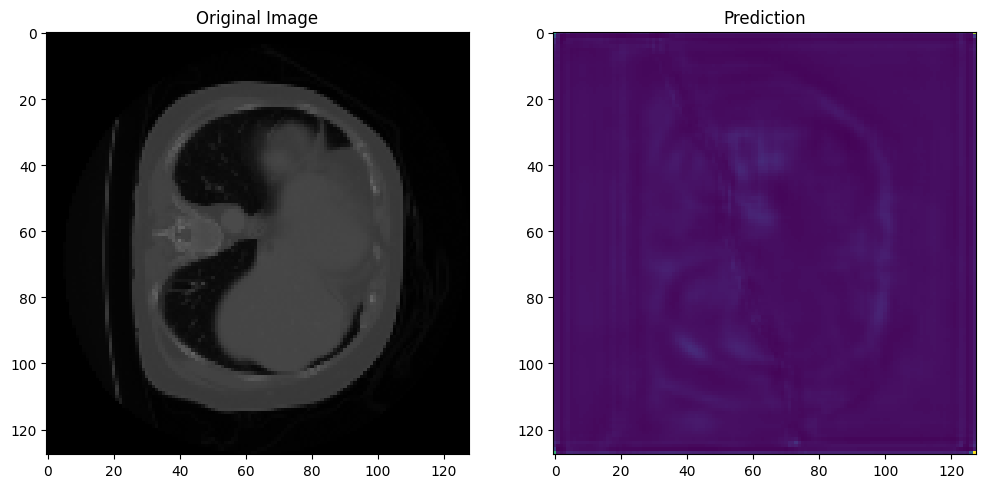

1/1 [==============================] - 0s 29ms/step


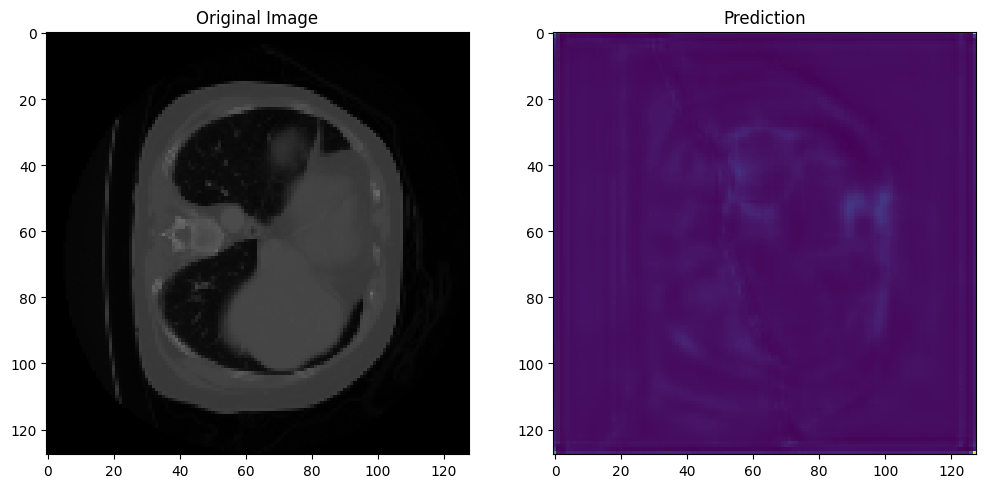

1/1 [==============================] - 0s 34ms/step


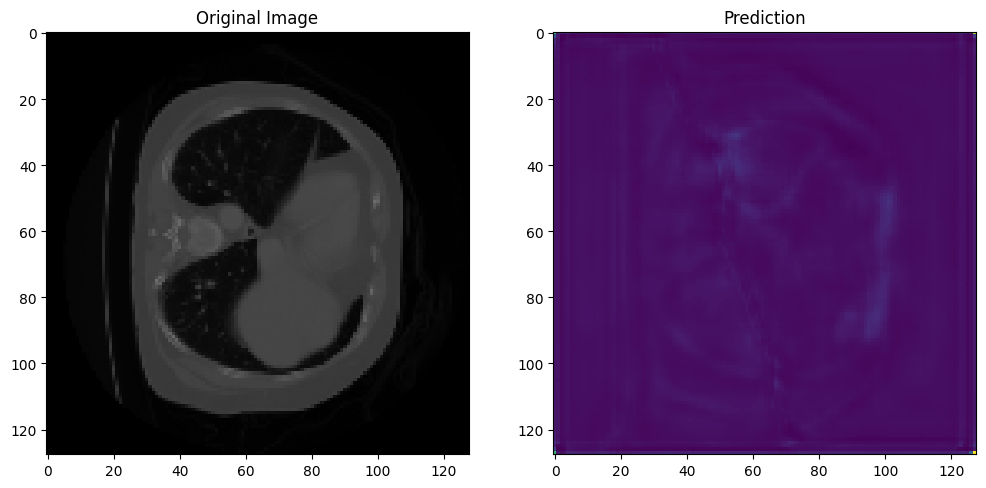

1/1 [==============================] - 0s 29ms/step


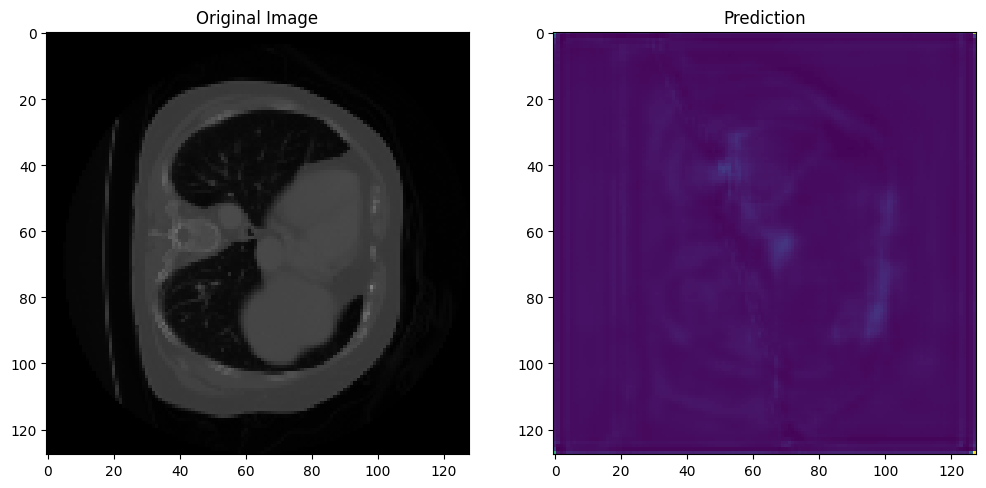

1/1 [==============================] - 0s 26ms/step


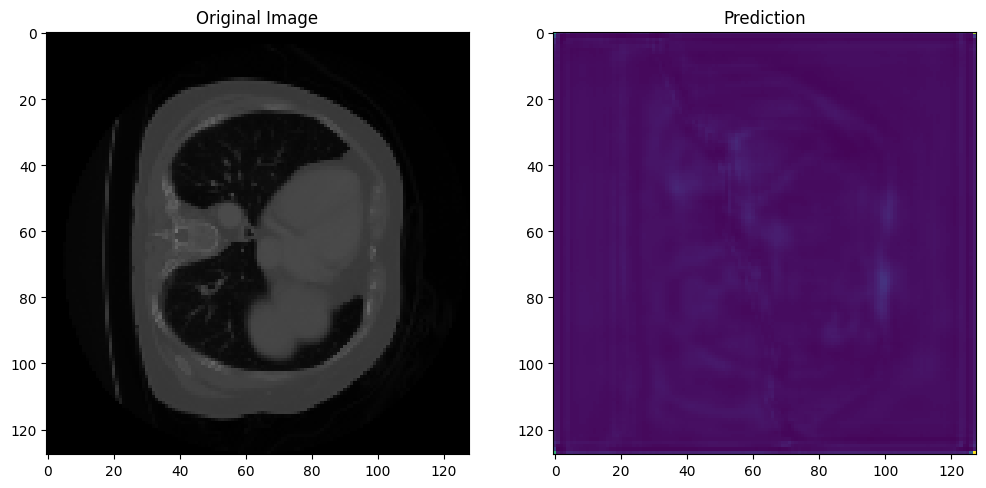

1/1 [==============================] - 0s 24ms/step


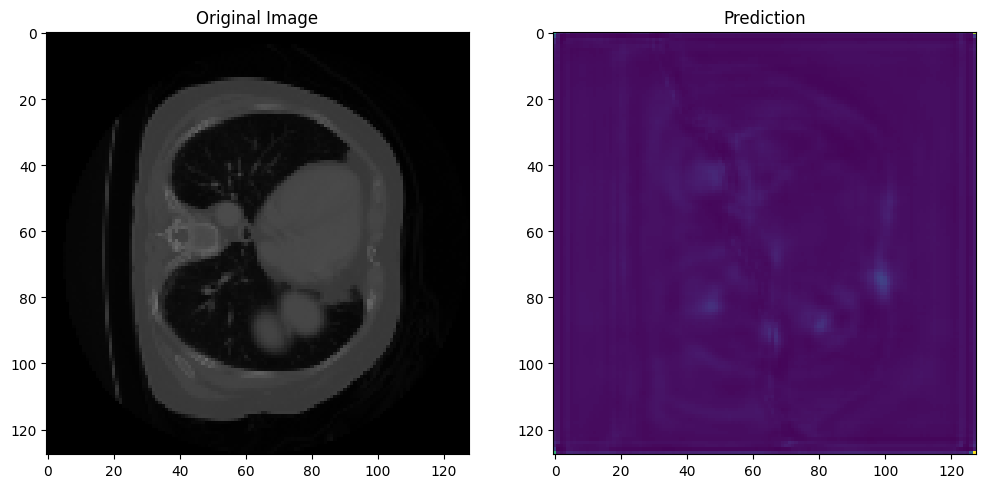

1/1 [==============================] - 0s 23ms/step


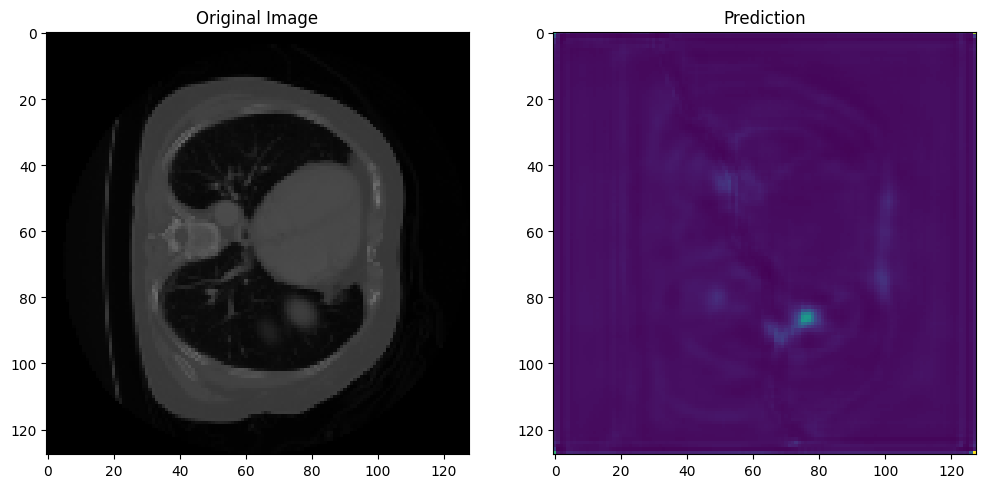

152.67324447631836 67.68941879272461 85.19624697195518


In [ ]:
Inference_time_resnet = []

for image in image_slices:
  time = infere(image, model_resnet)
  Inference_time_resnet.append(time)


print("=========================")
print(np.max(Inference_time_resnet), np.min(Inference_time_resnet), np.mean(Inference_time_resnet))
print("=========================")

###Mobilenet

1/1 [==============================] - 0s 24ms/step


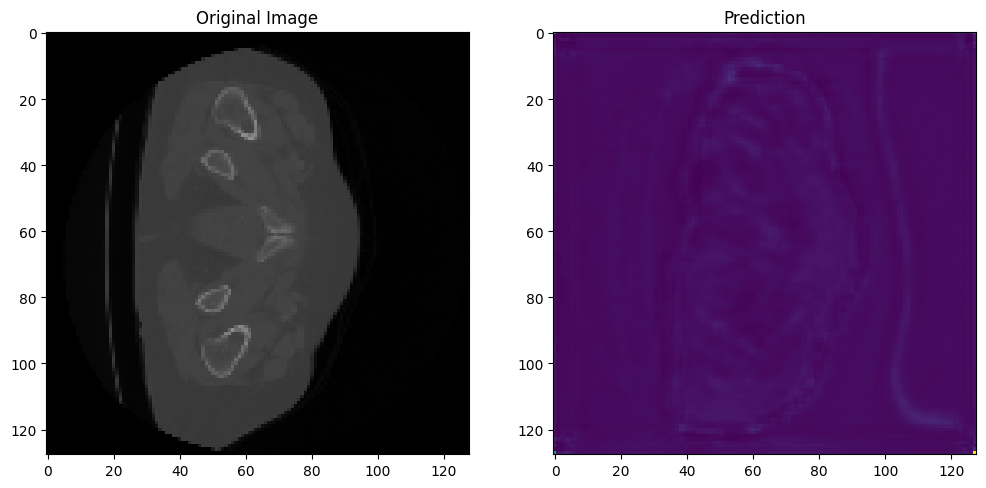

1/1 [==============================] - 0s 26ms/step


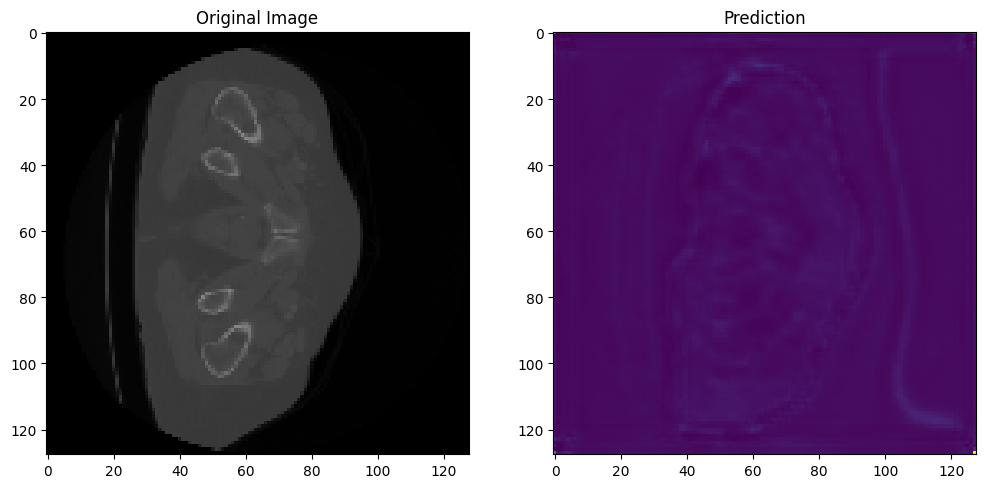

1/1 [==============================] - 0s 23ms/step


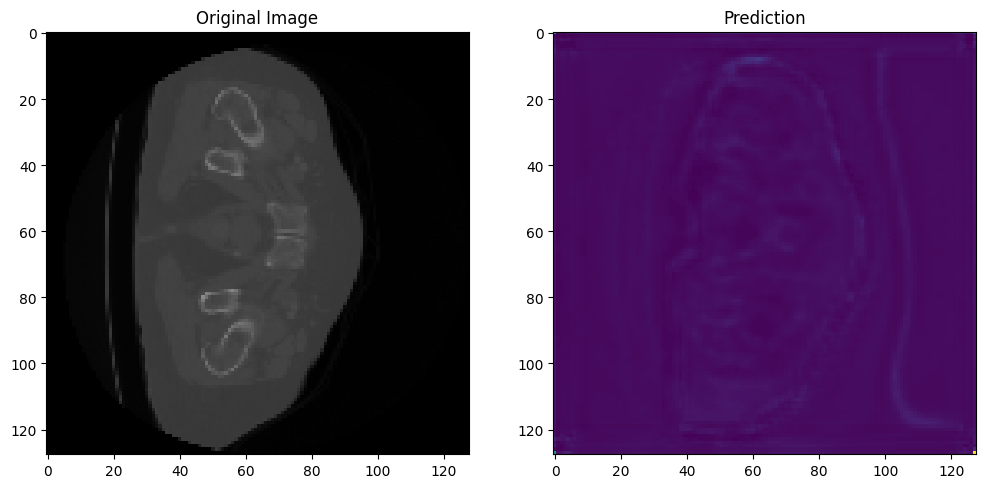

1/1 [==============================] - 0s 23ms/step


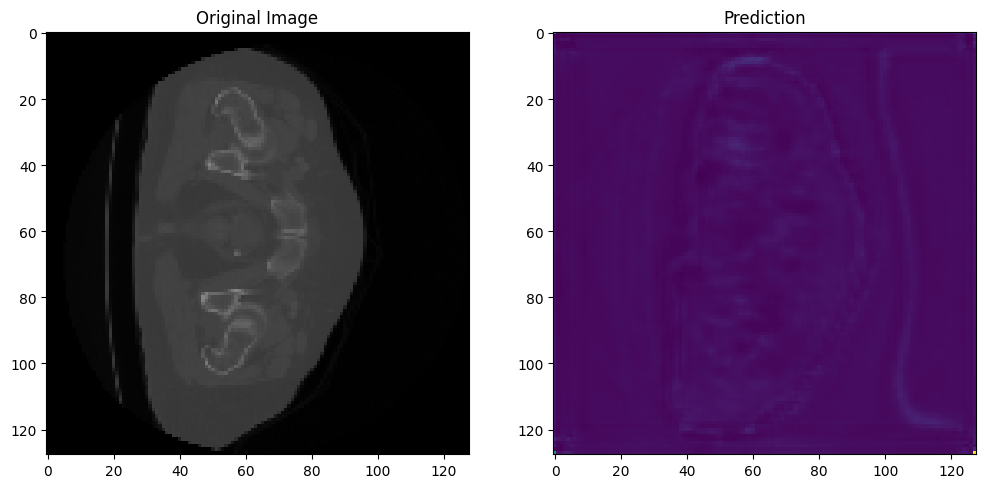

1/1 [==============================] - 0s 25ms/step


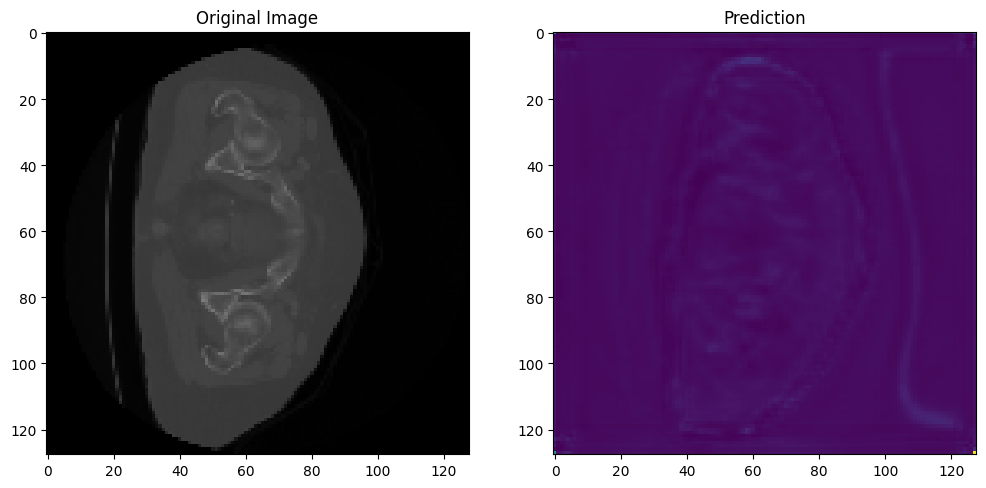

1/1 [==============================] - 0s 22ms/step


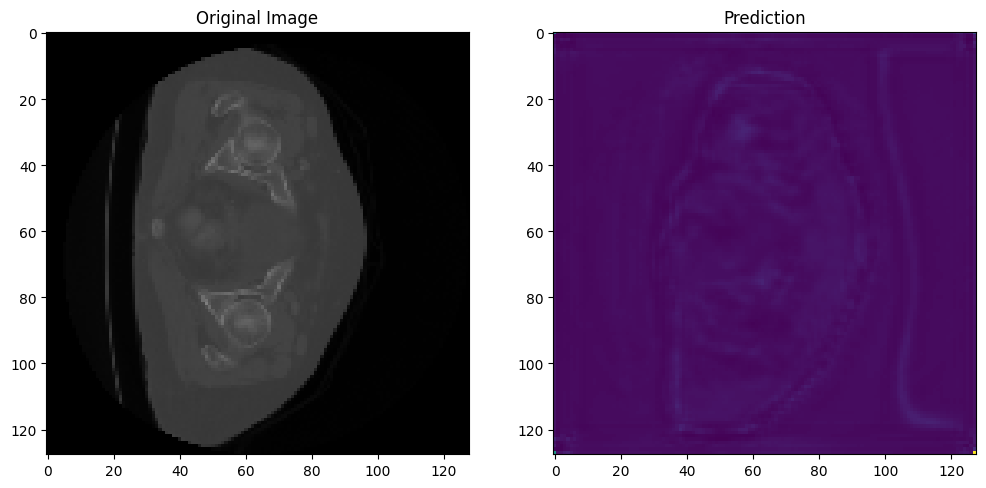

1/1 [==============================] - 0s 23ms/step


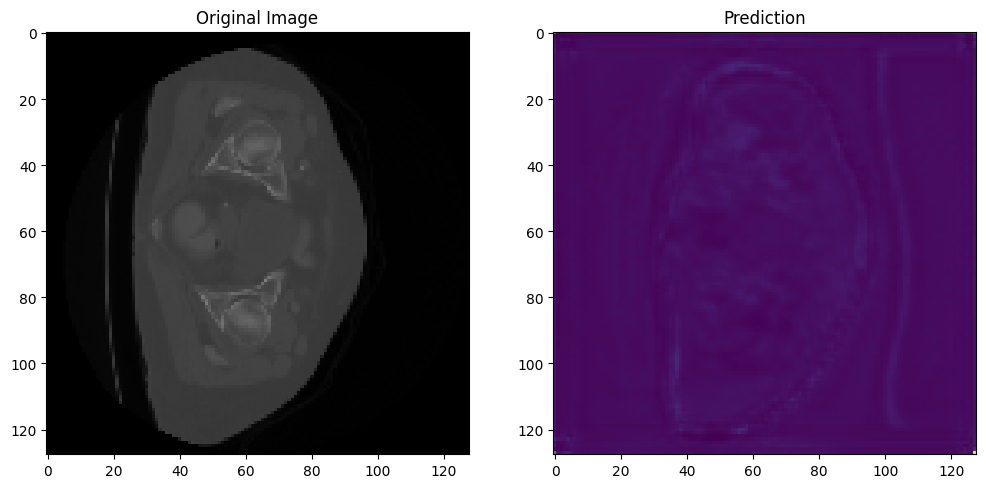

1/1 [==============================] - 0s 30ms/step


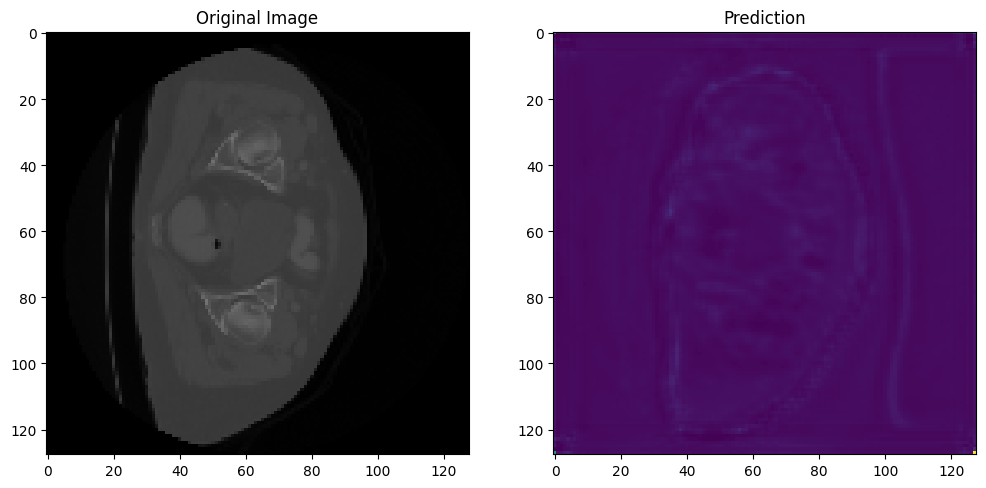

1/1 [==============================] - 0s 35ms/step


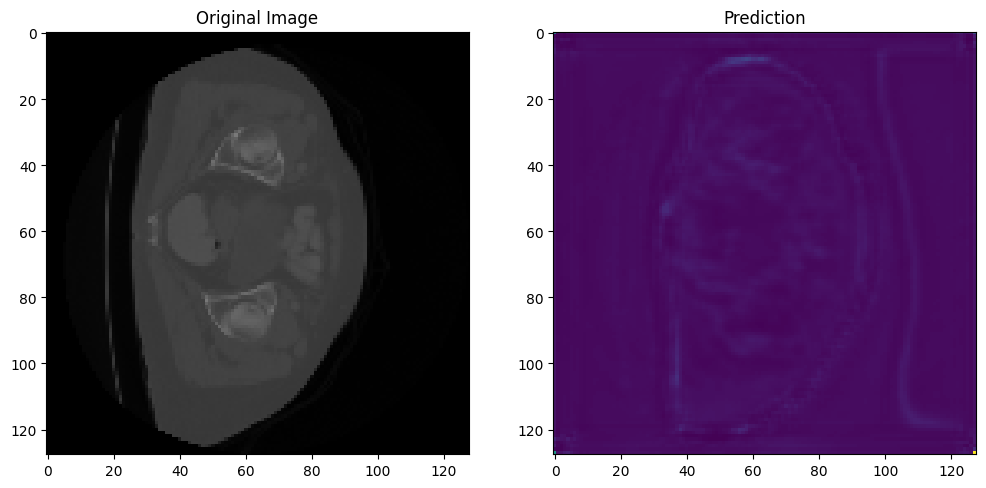

1/1 [==============================] - 0s 38ms/step


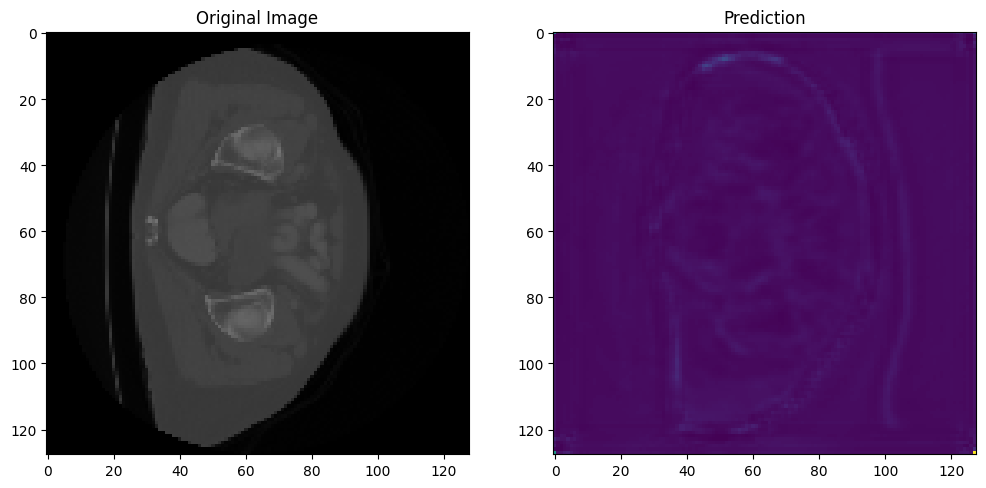

1/1 [==============================] - 0s 36ms/step


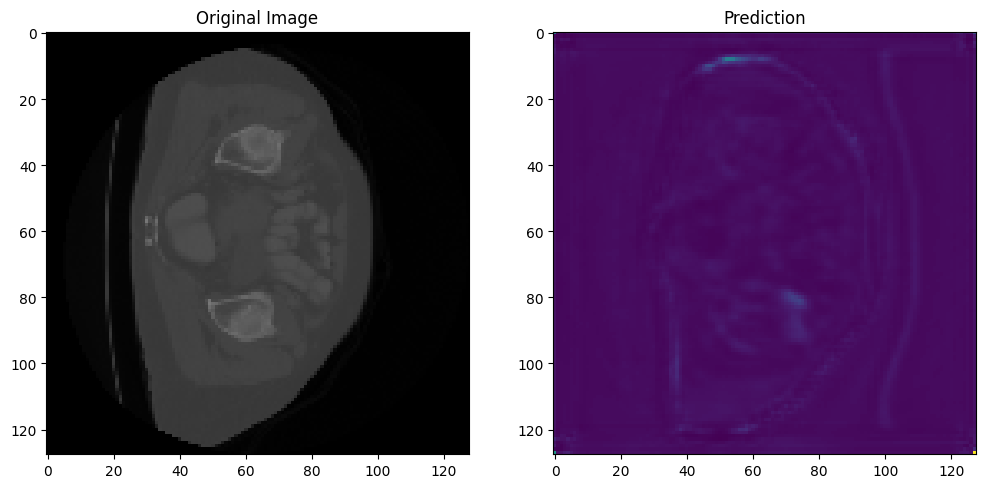

1/1 [==============================] - 0s 43ms/step


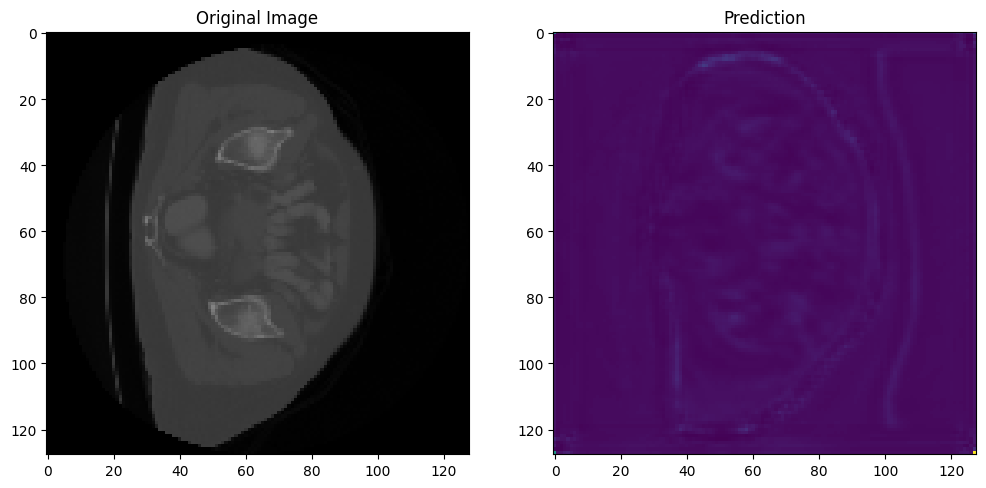

1/1 [==============================] - 0s 34ms/step


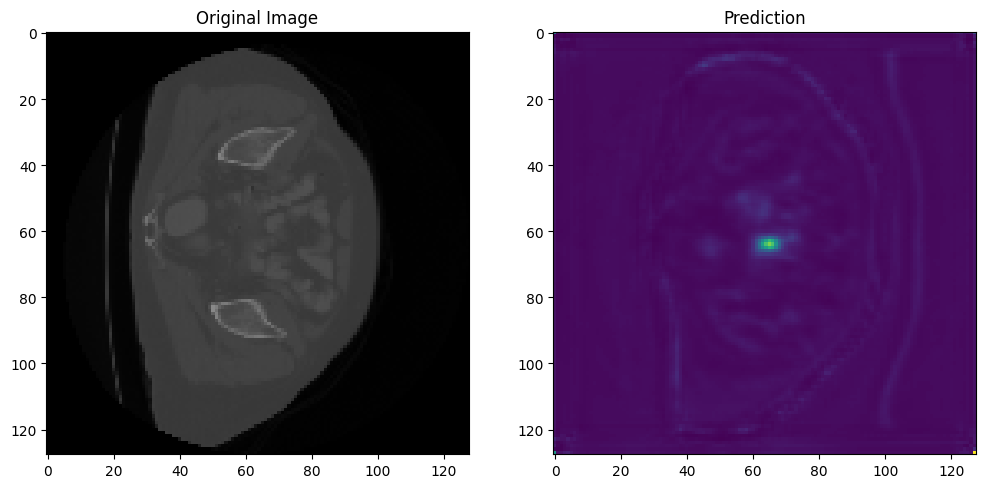

1/1 [==============================] - 0s 36ms/step


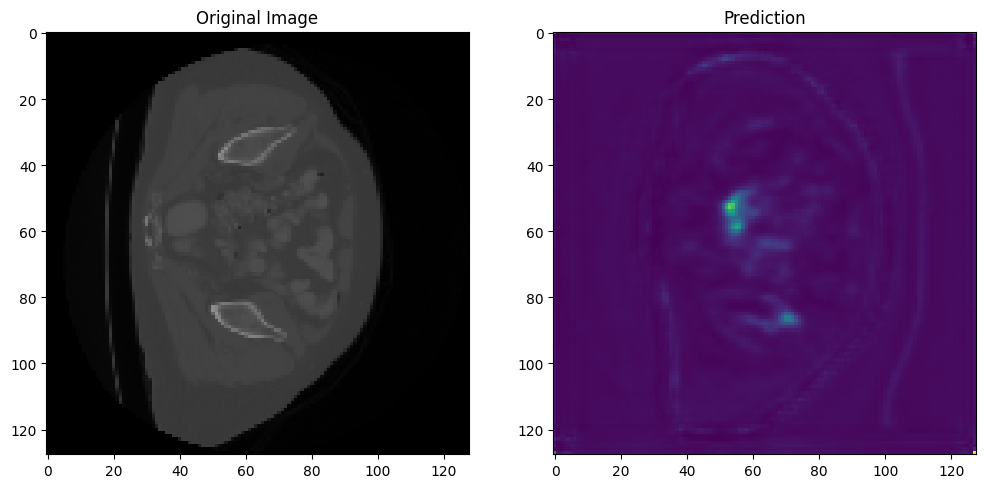

1/1 [==============================] - 0s 23ms/step


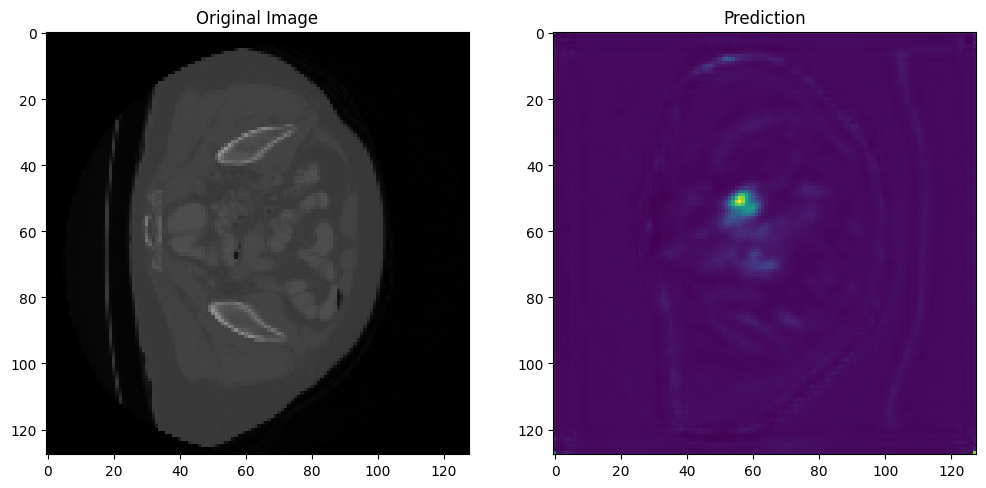

1/1 [==============================] - 0s 30ms/step


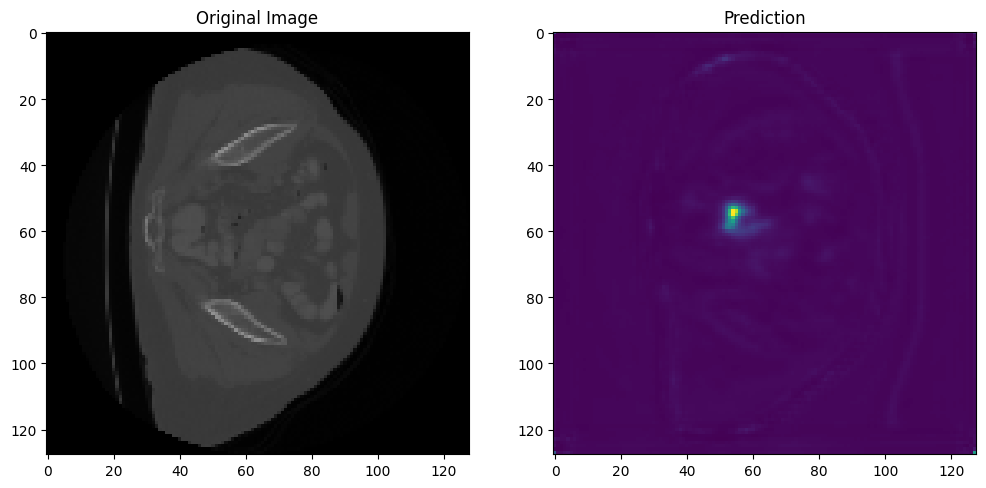

1/1 [==============================] - 0s 28ms/step


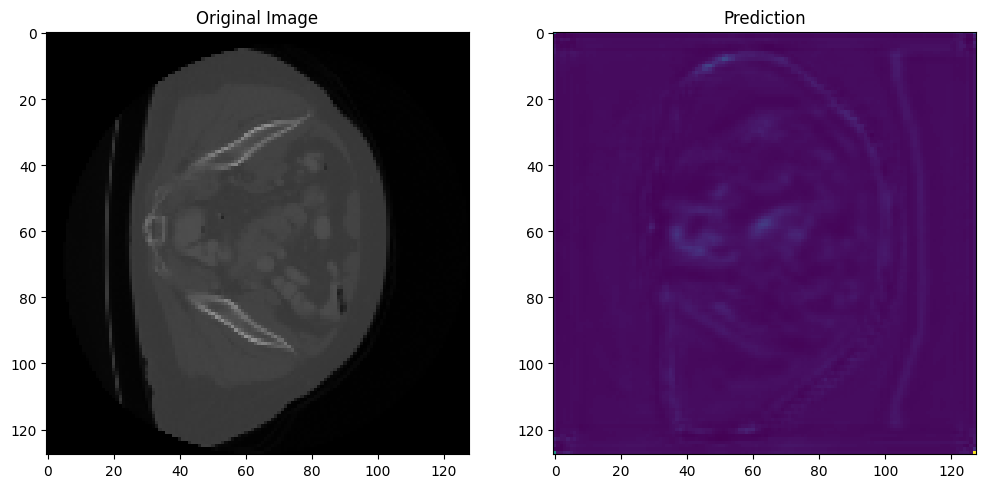

1/1 [==============================] - 0s 24ms/step


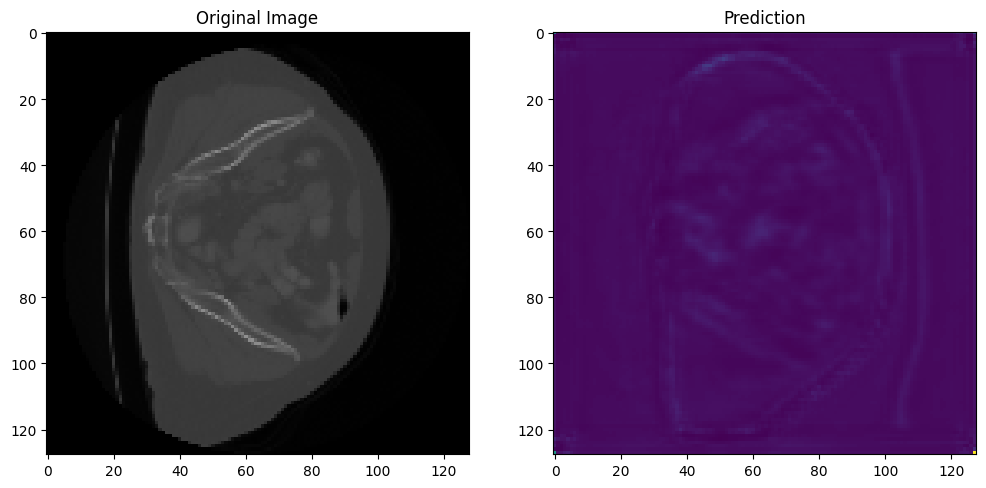

1/1 [==============================] - 0s 23ms/step


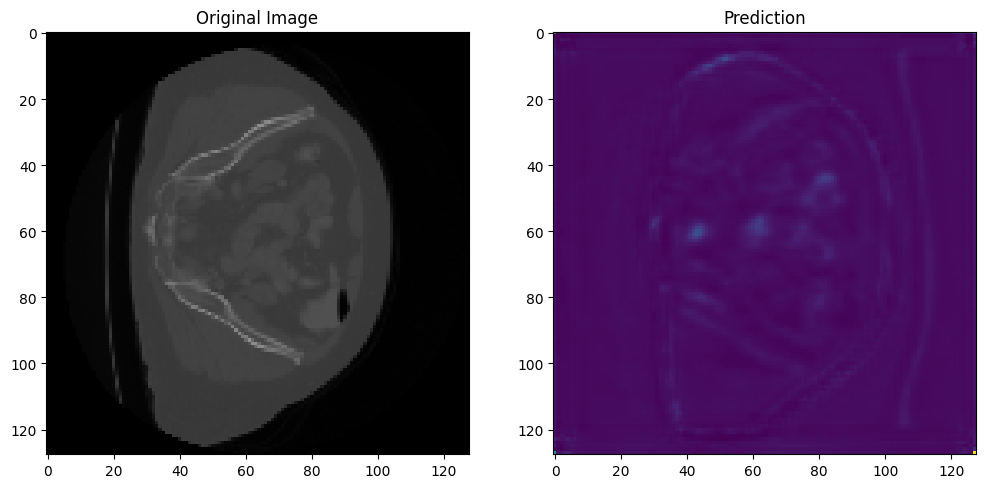

1/1 [==============================] - 0s 25ms/step


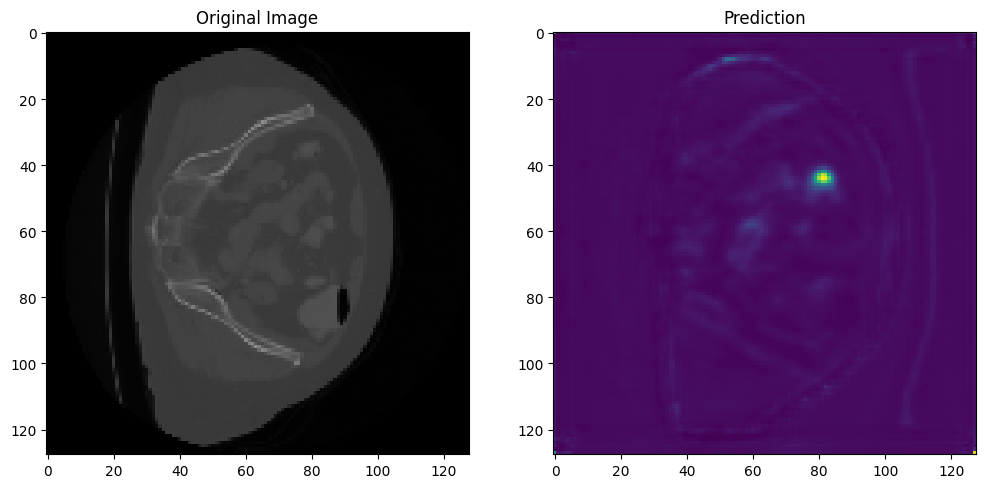

1/1 [==============================] - 0s 33ms/step


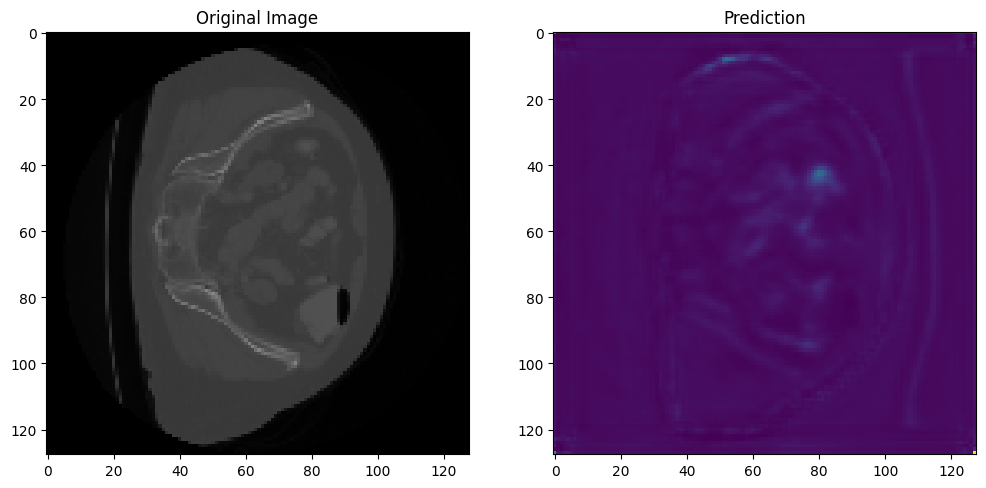

1/1 [==============================] - 0s 24ms/step


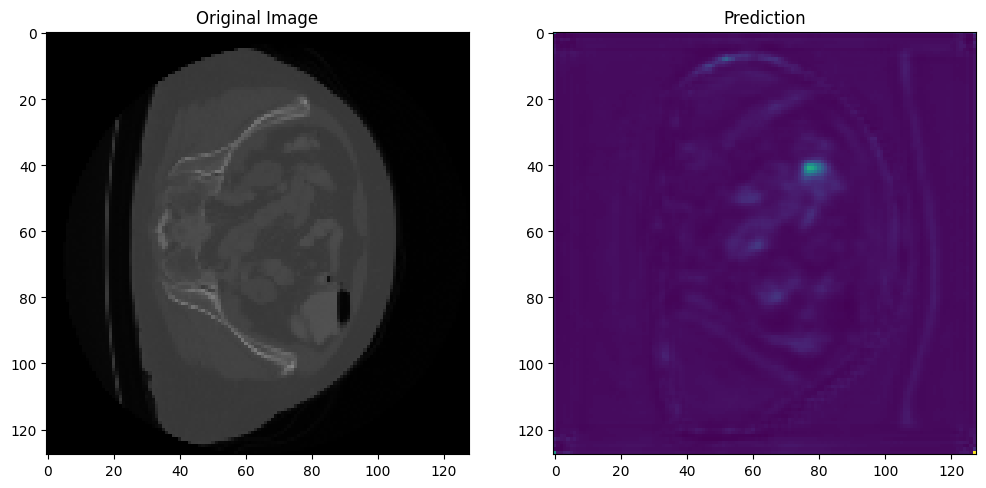

1/1 [==============================] - 0s 27ms/step


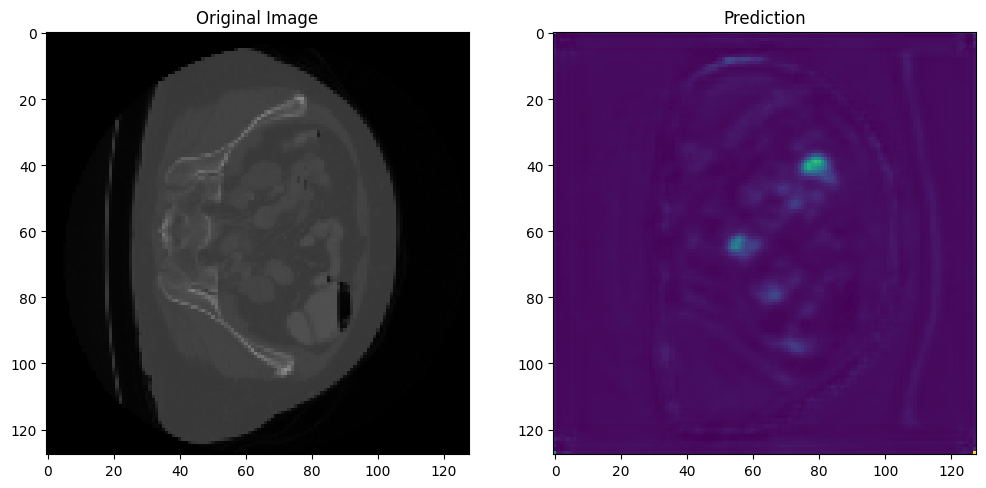

1/1 [==============================] - 0s 24ms/step


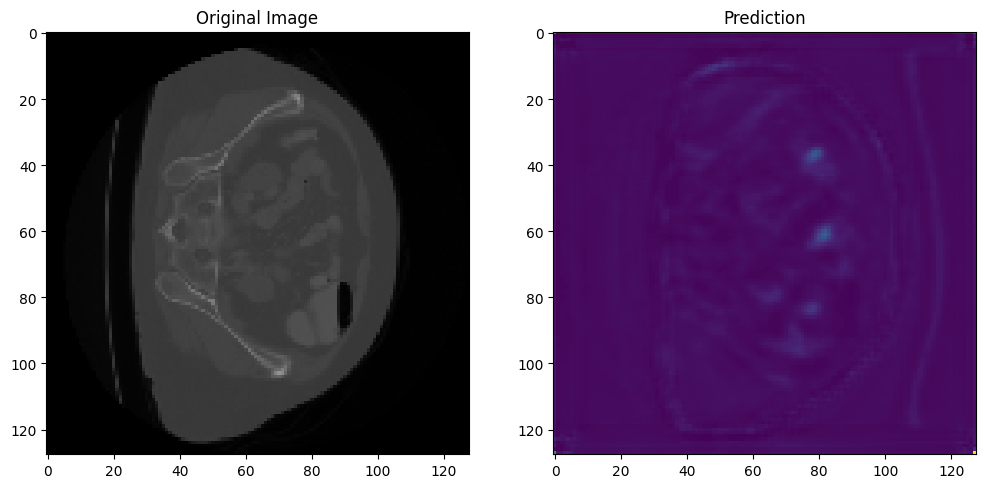

1/1 [==============================] - 0s 23ms/step


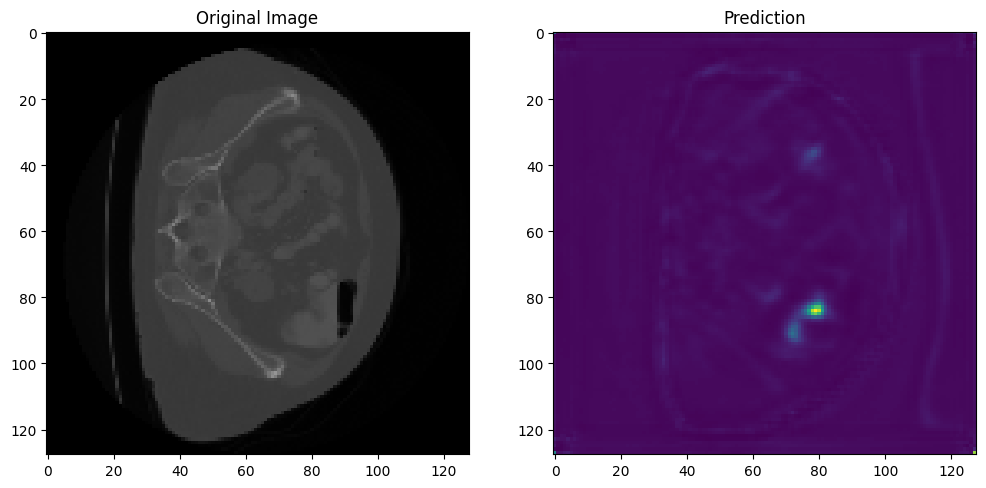

1/1 [==============================] - 0s 26ms/step


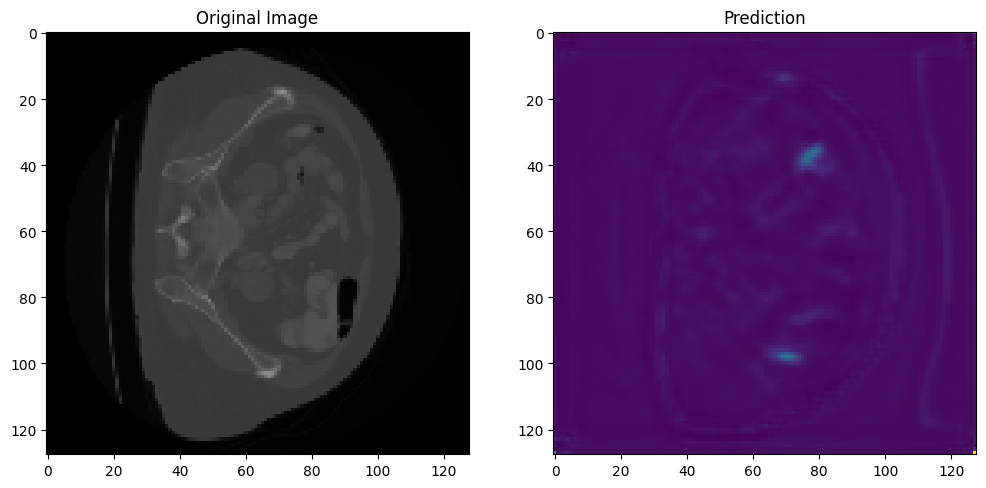

1/1 [==============================] - 0s 23ms/step


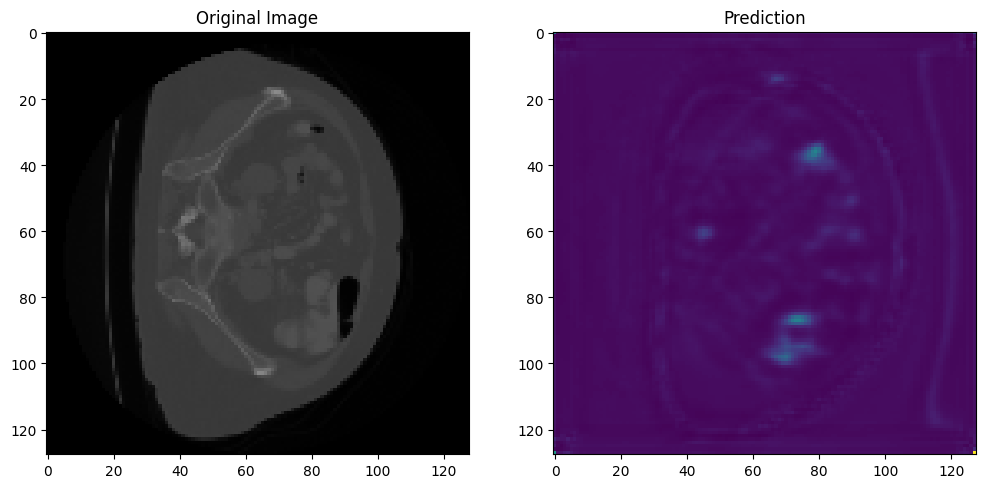

1/1 [==============================] - 0s 23ms/step


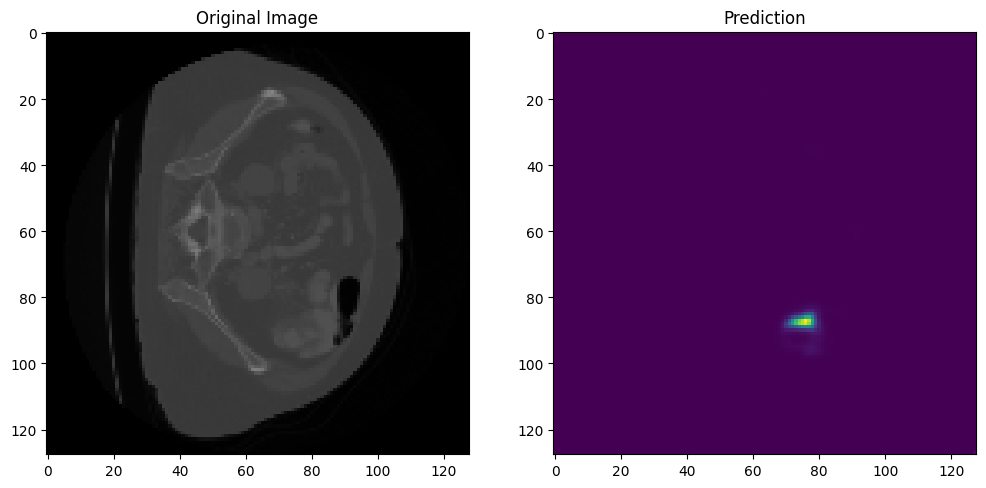

1/1 [==============================] - 0s 21ms/step


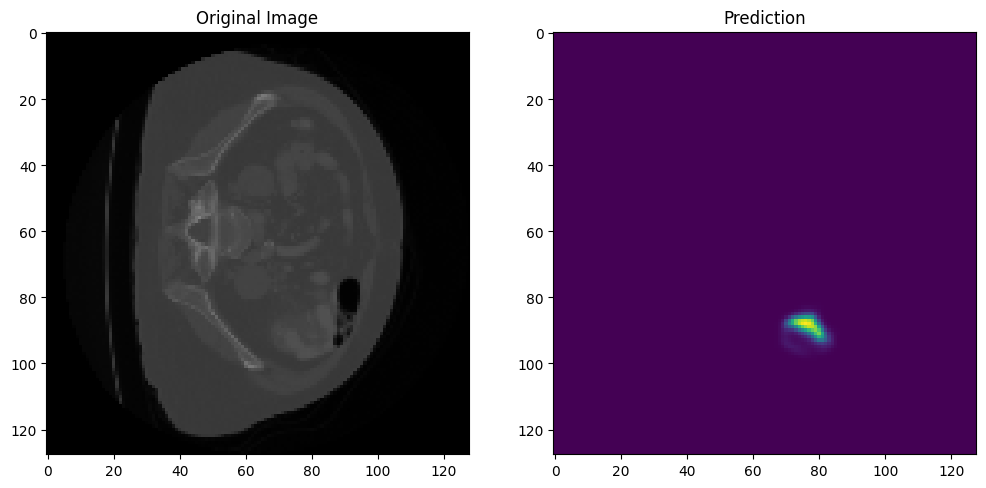

1/1 [==============================] - 0s 23ms/step


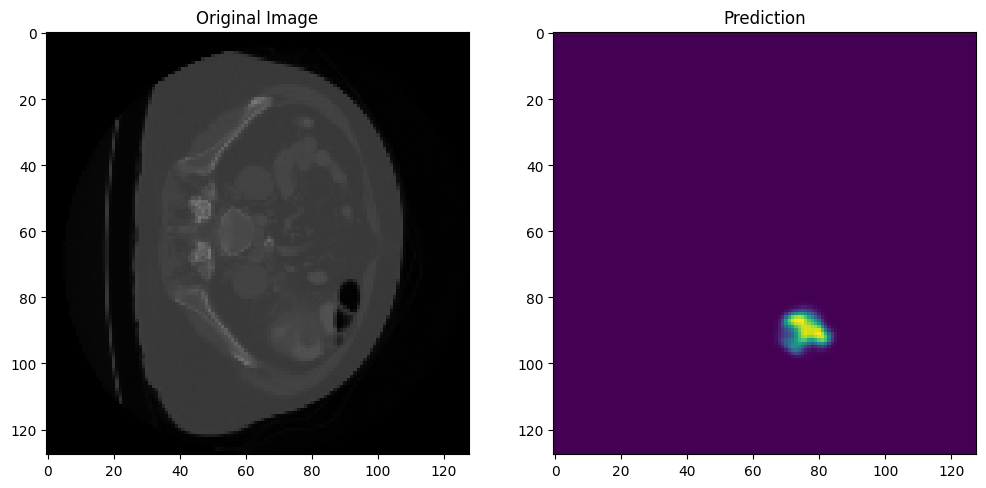

1/1 [==============================] - 0s 23ms/step


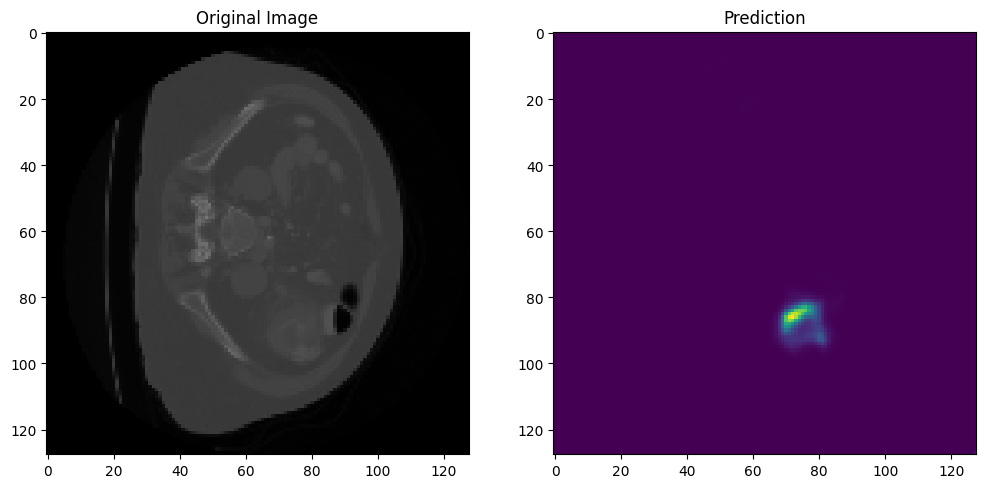

1/1 [==============================] - 0s 23ms/step


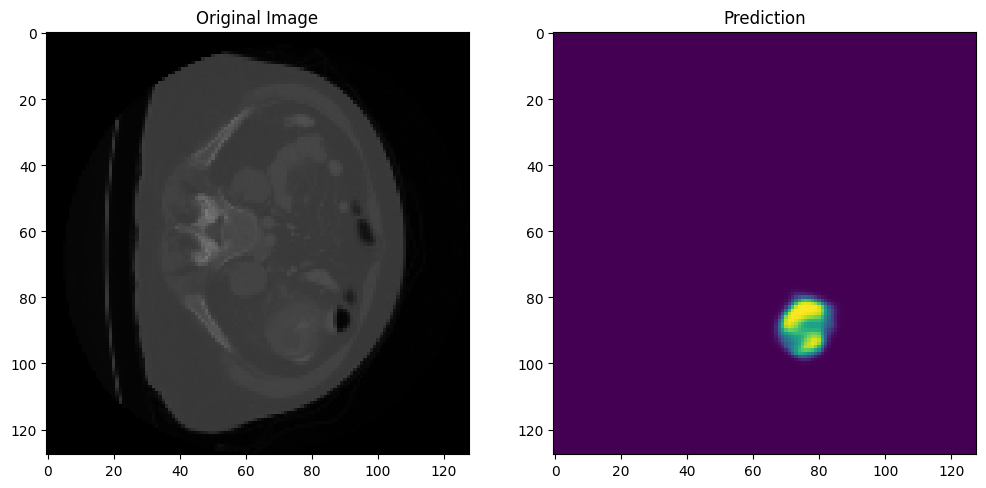

1/1 [==============================] - 0s 23ms/step


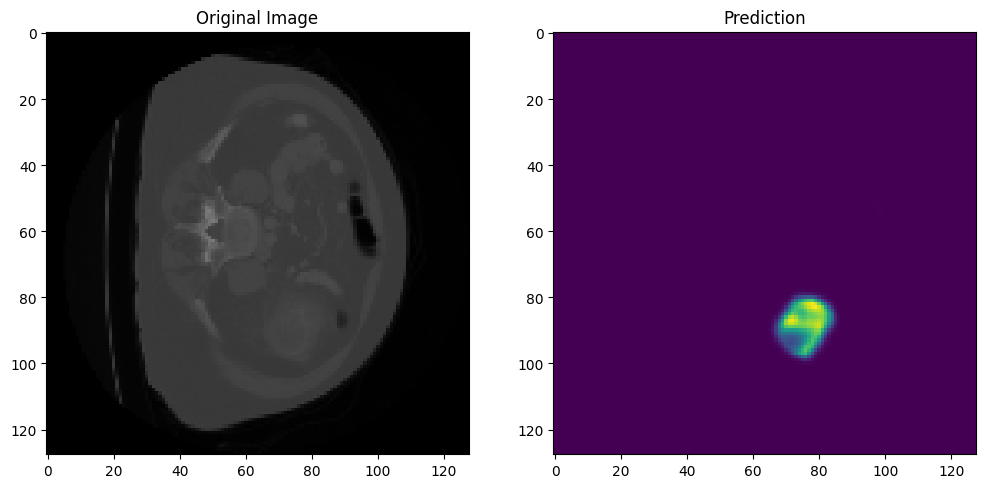

1/1 [==============================] - 0s 25ms/step


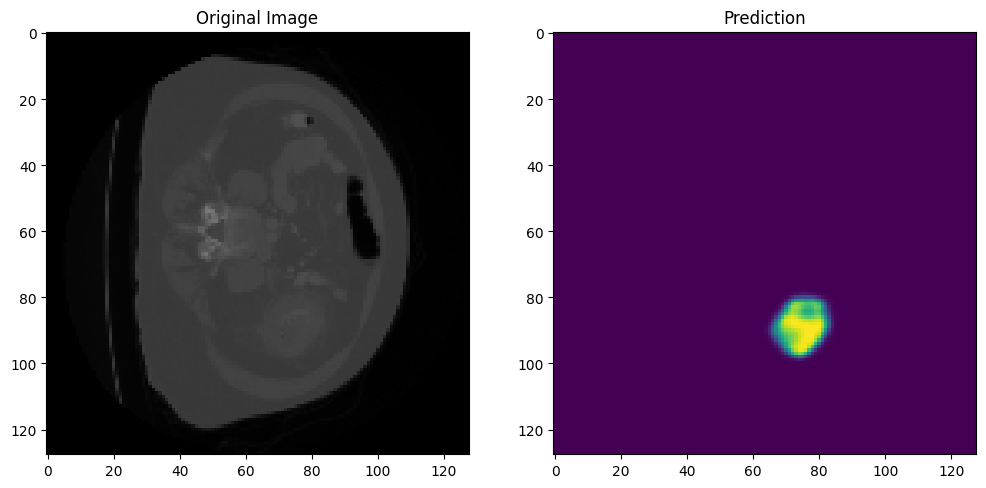

1/1 [==============================] - 0s 25ms/step


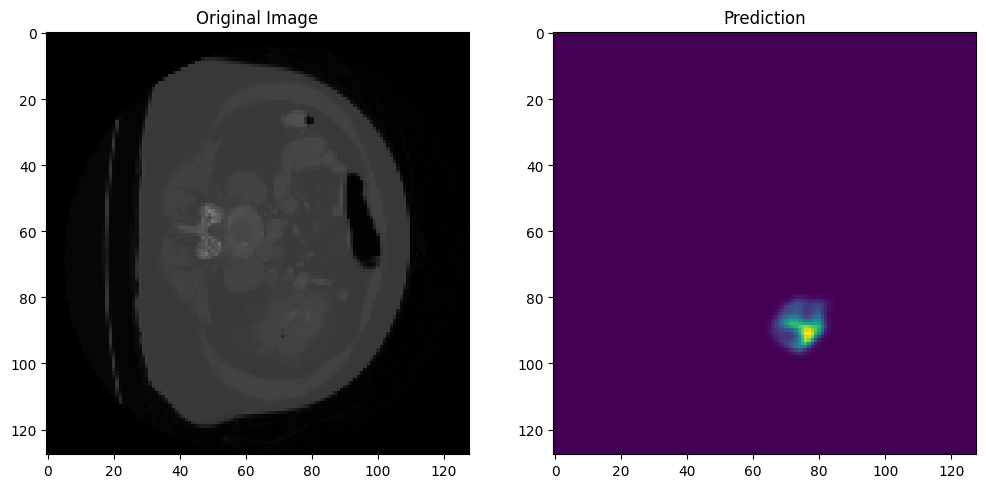

1/1 [==============================] - 0s 42ms/step


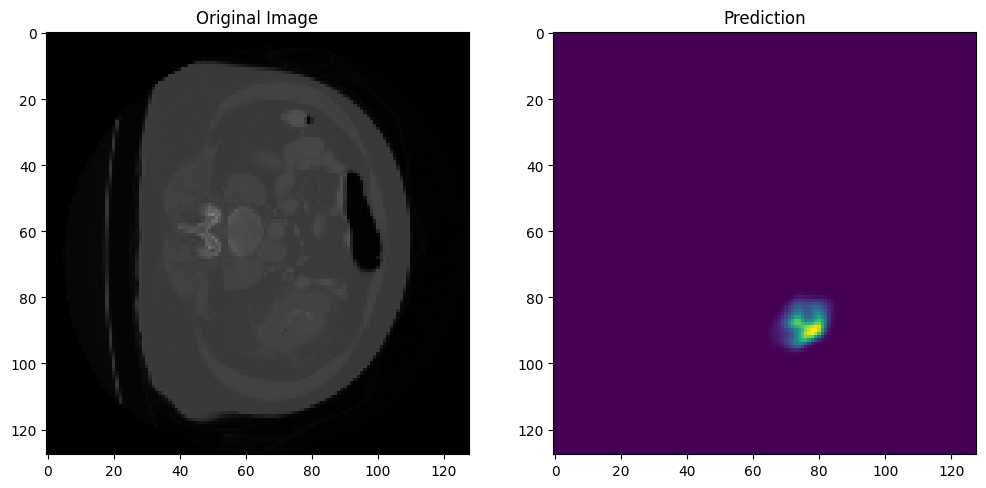

1/1 [==============================] - 0s 45ms/step


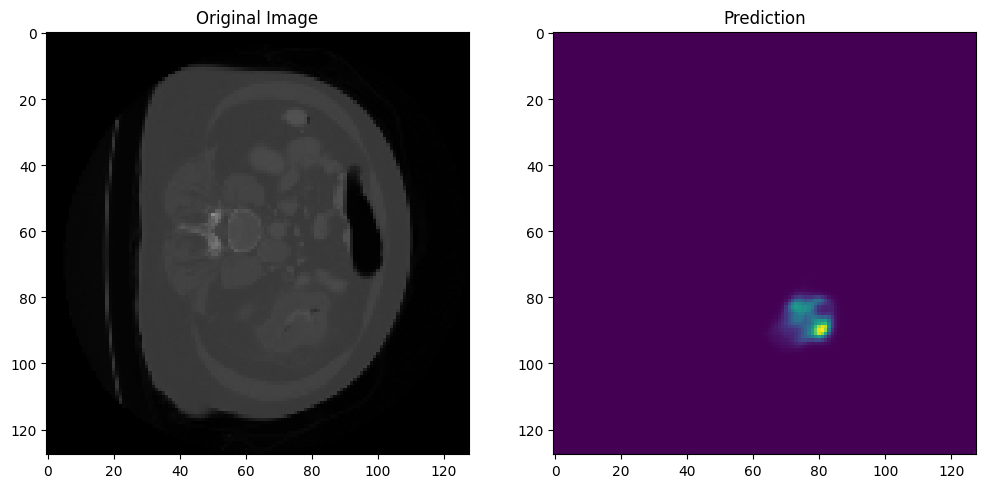

1/1 [==============================] - 0s 51ms/step


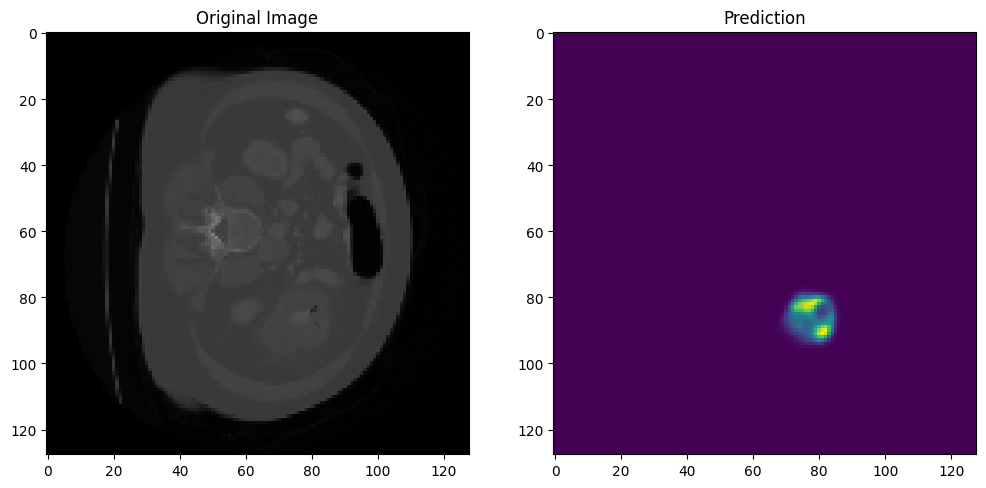

1/1 [==============================] - 0s 47ms/step


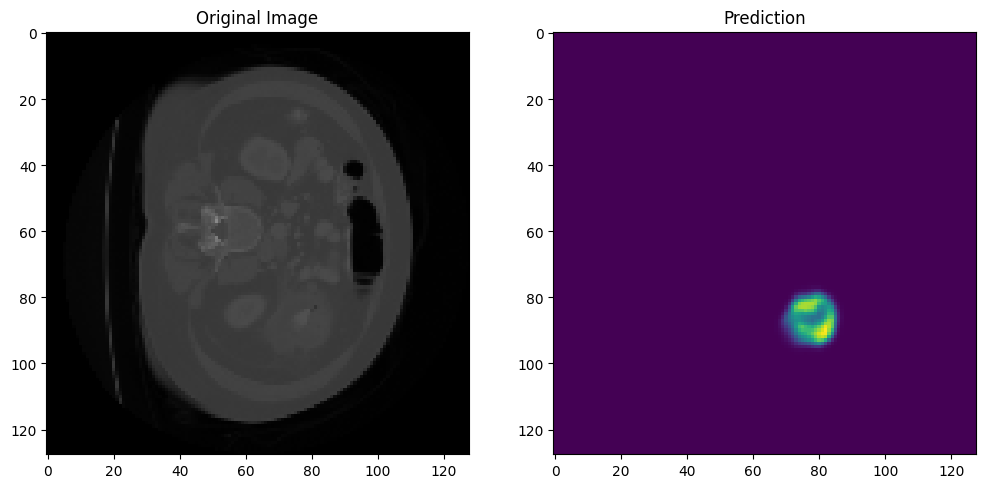

1/1 [==============================] - 0s 38ms/step


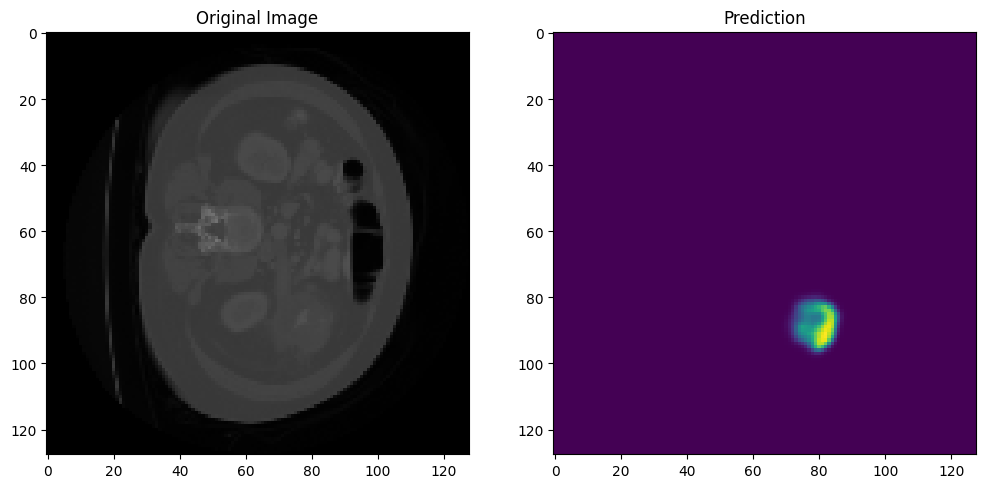

1/1 [==============================] - 0s 24ms/step


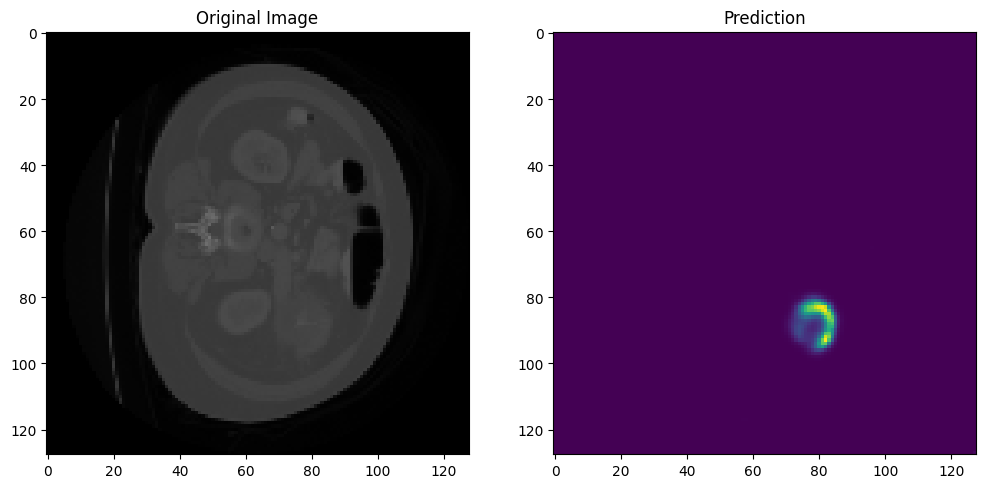

1/1 [==============================] - 0s 24ms/step


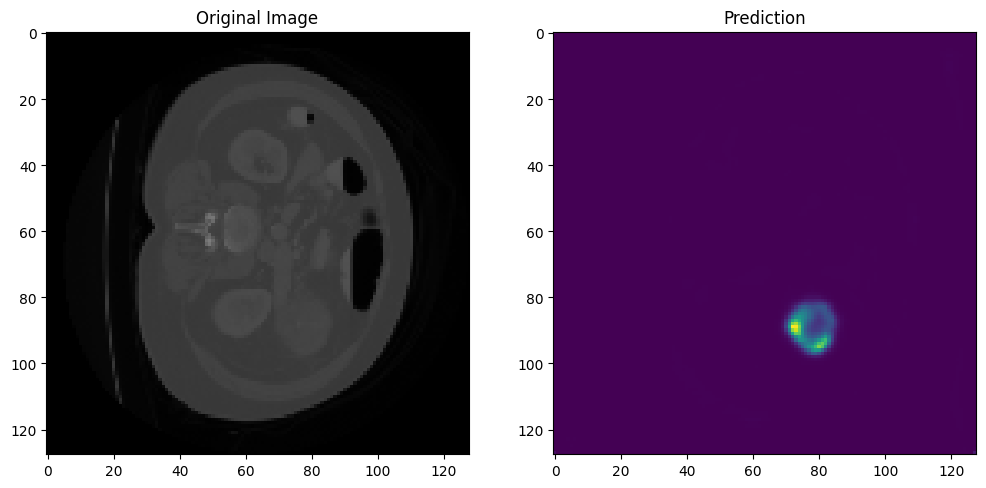

1/1 [==============================] - 0s 23ms/step


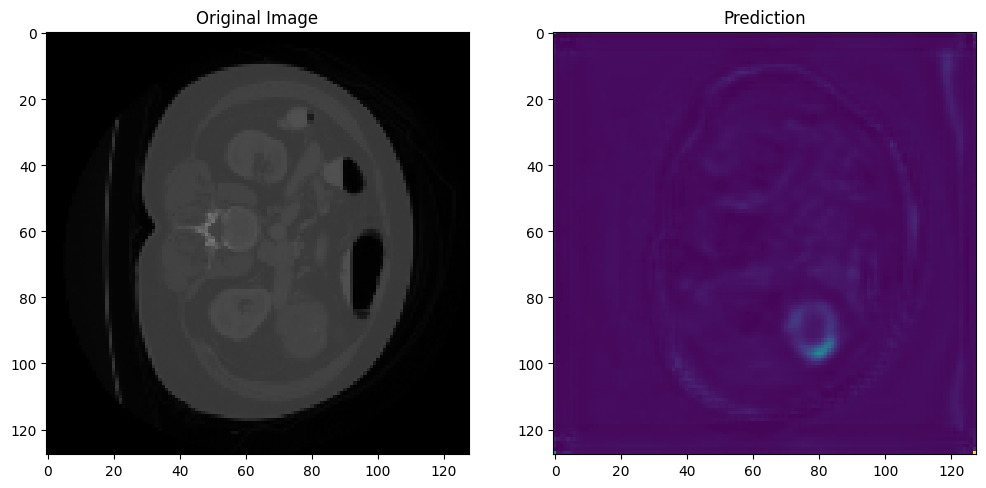

1/1 [==============================] - 0s 28ms/step


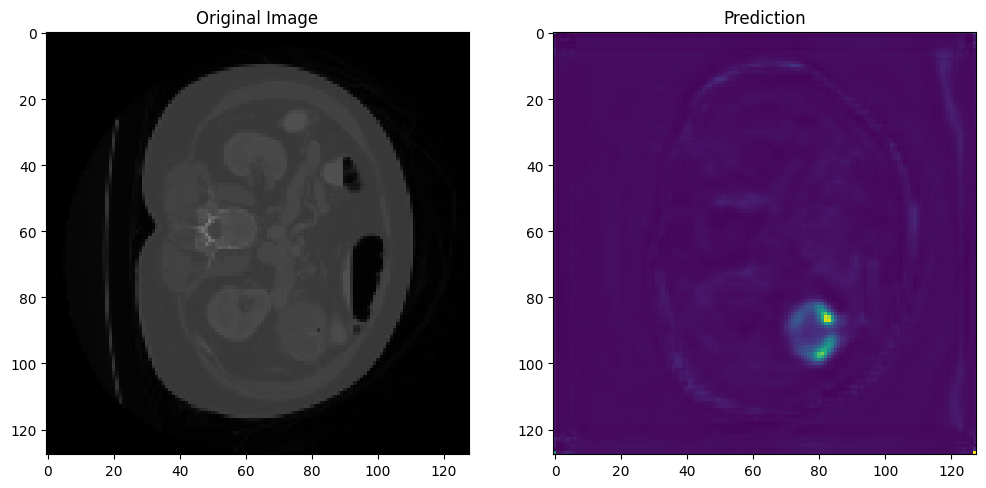

1/1 [==============================] - 0s 24ms/step


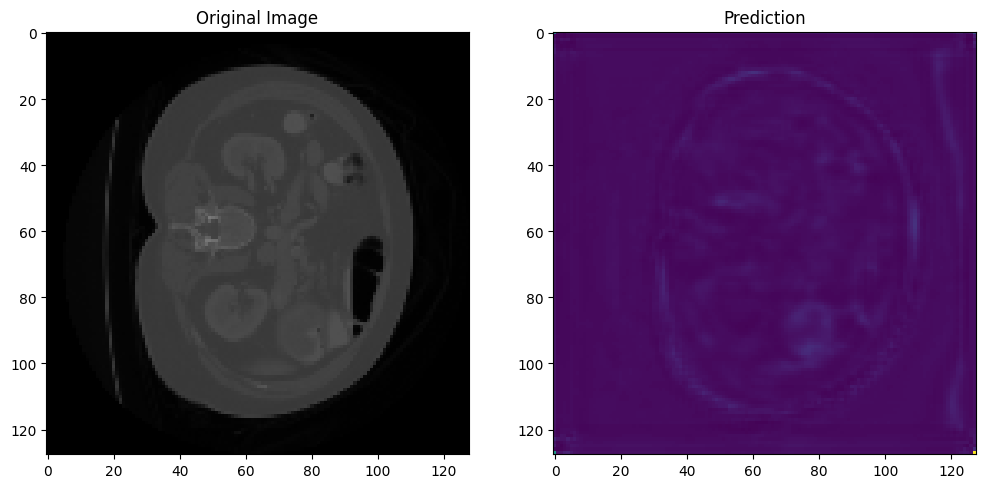

1/1 [==============================] - 0s 26ms/step


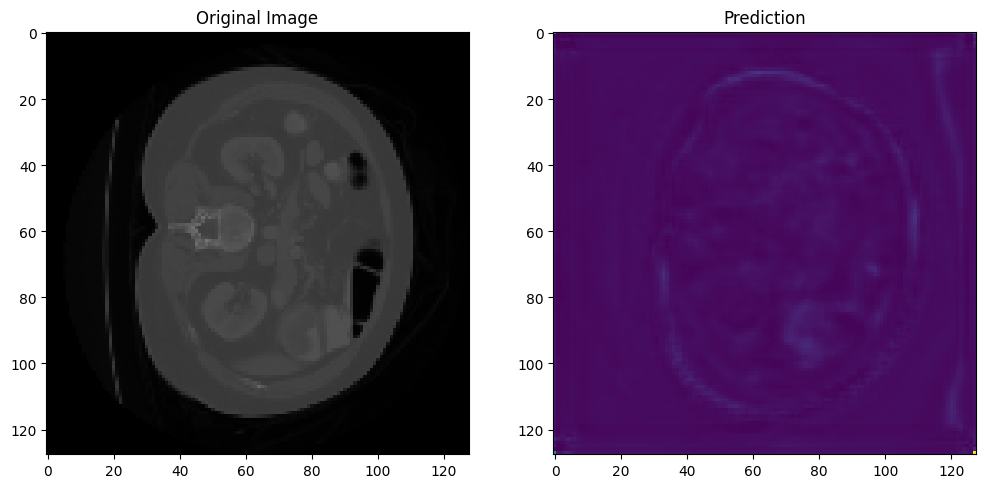

1/1 [==============================] - 0s 26ms/step


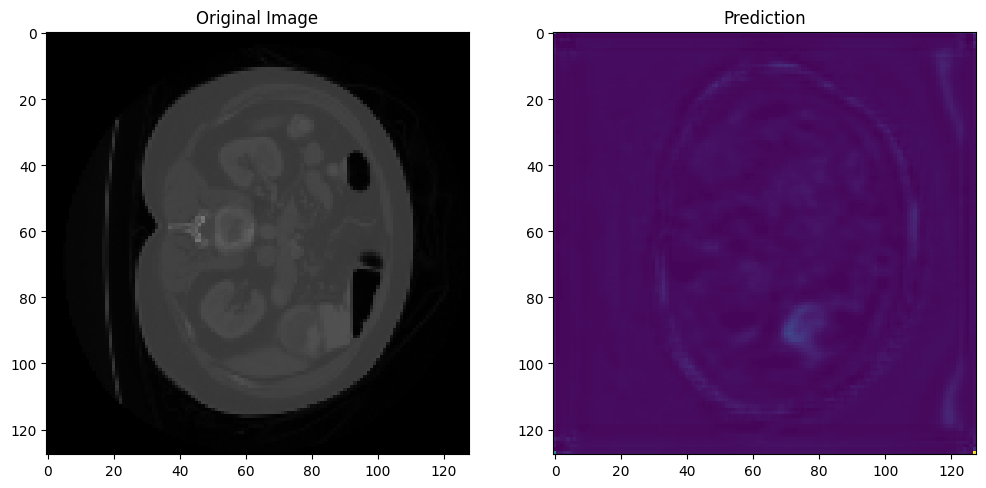

1/1 [==============================] - 0s 24ms/step


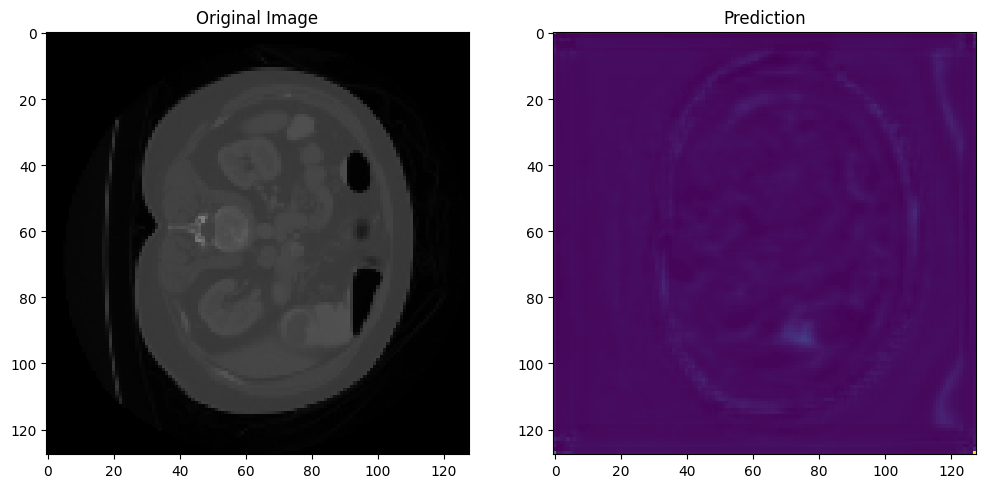

1/1 [==============================] - 0s 29ms/step


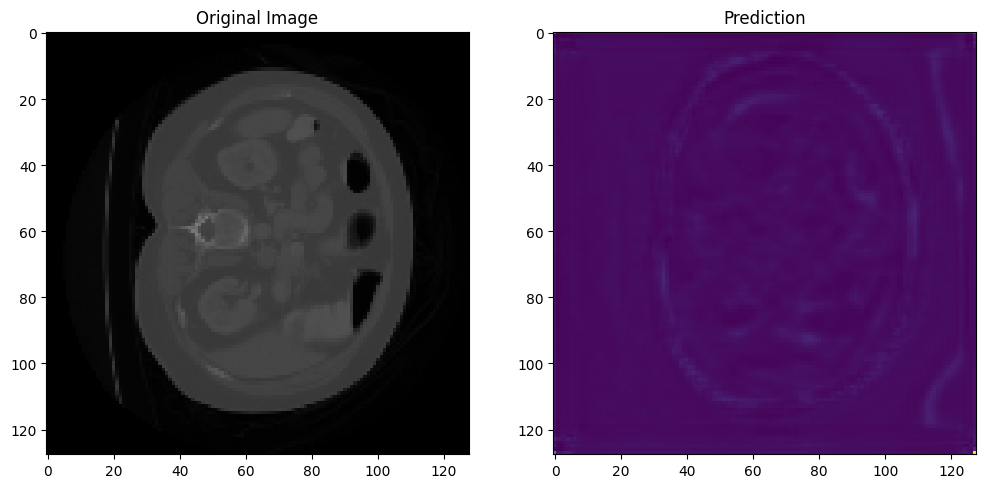

1/1 [==============================] - 0s 25ms/step


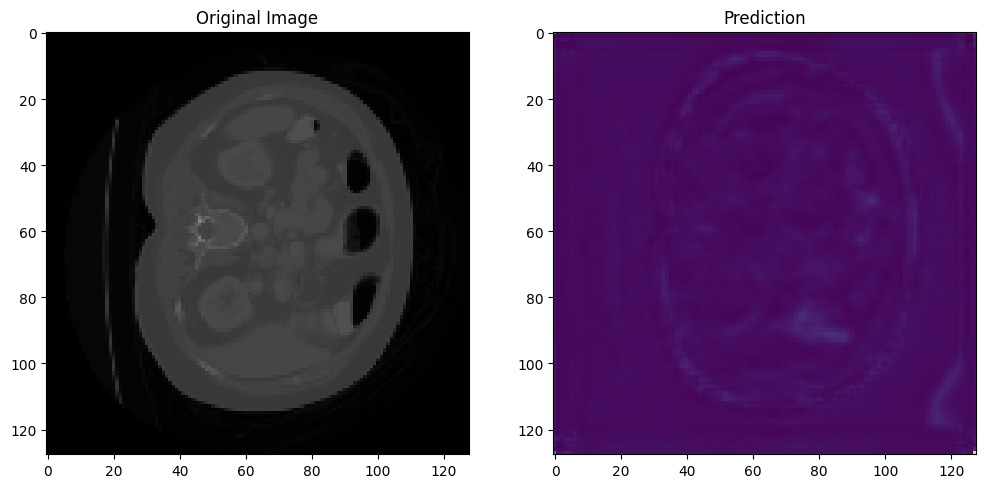

1/1 [==============================] - 0s 24ms/step


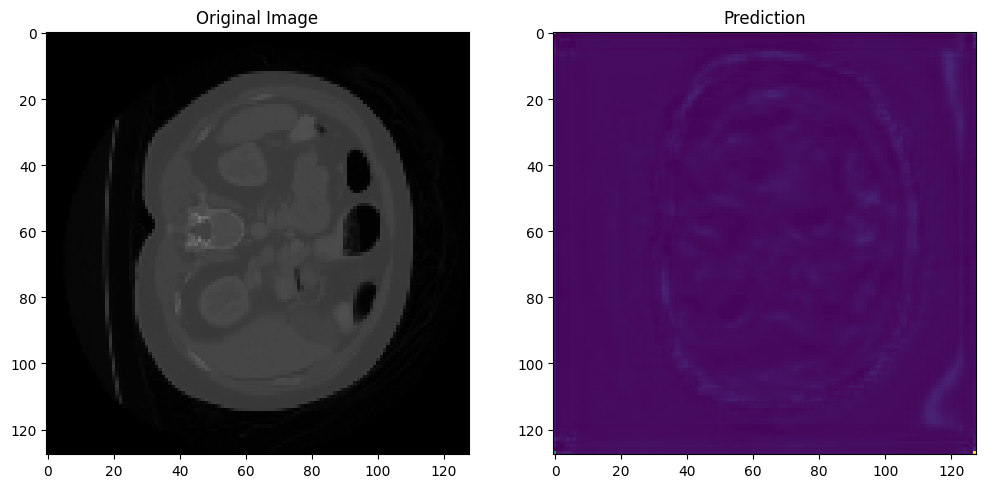

1/1 [==============================] - 0s 25ms/step


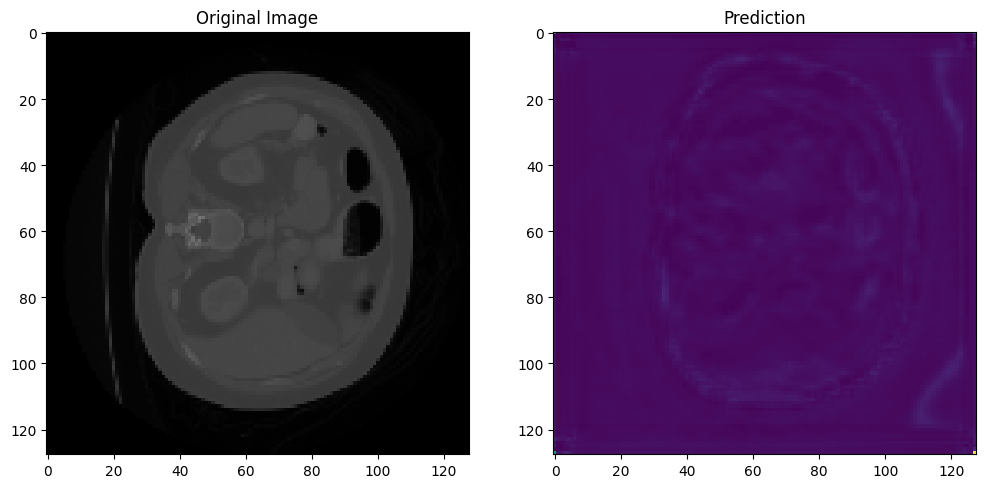

1/1 [==============================] - 0s 24ms/step


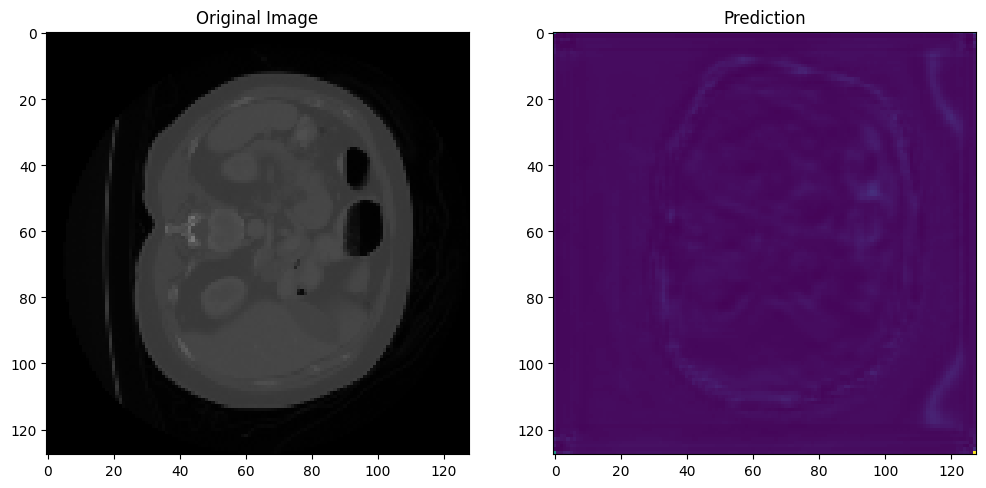

1/1 [==============================] - 0s 27ms/step


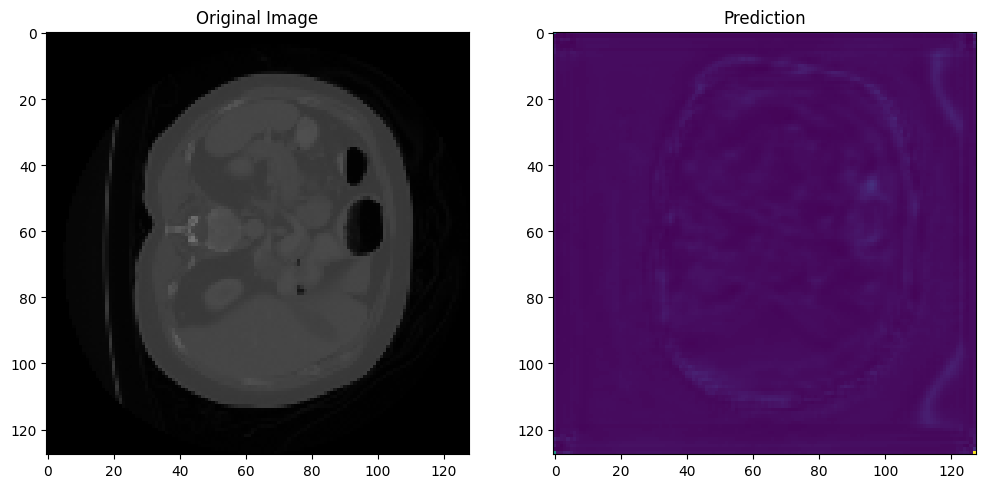

1/1 [==============================] - 0s 22ms/step


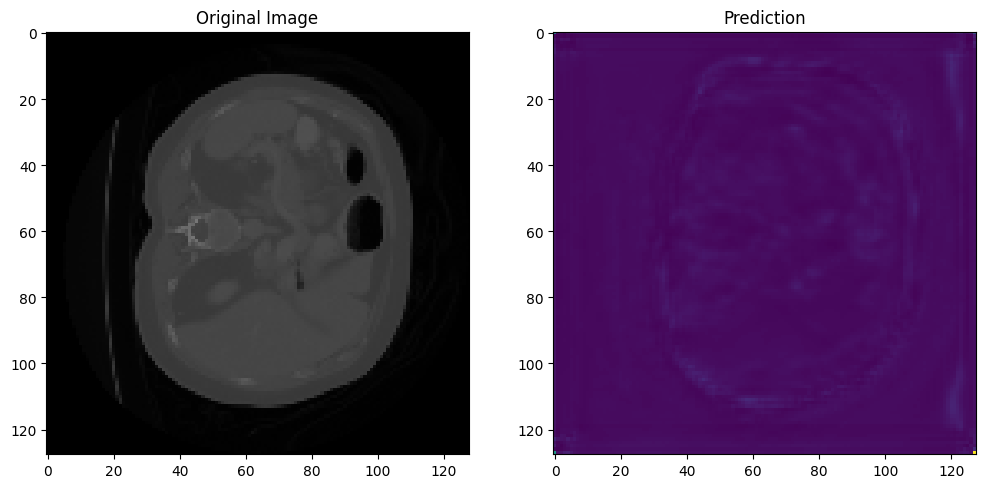

1/1 [==============================] - 0s 28ms/step


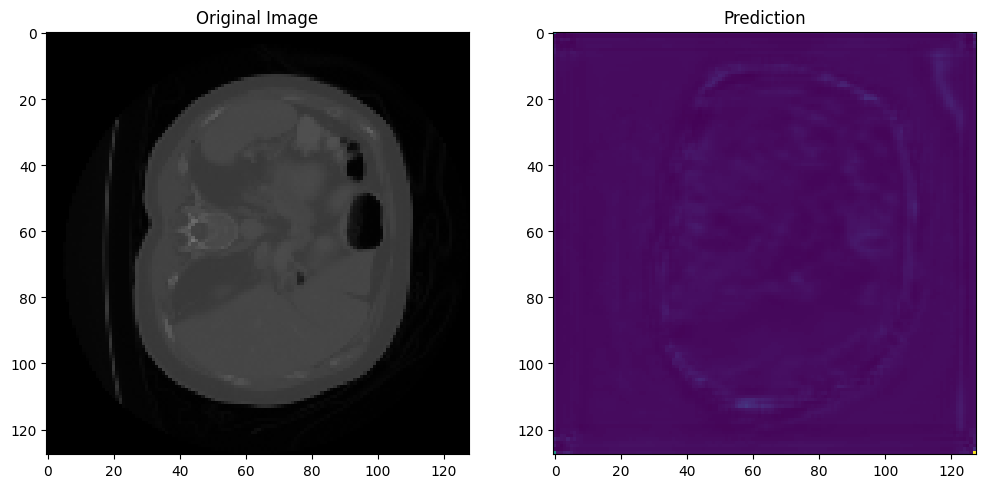

1/1 [==============================] - 0s 24ms/step


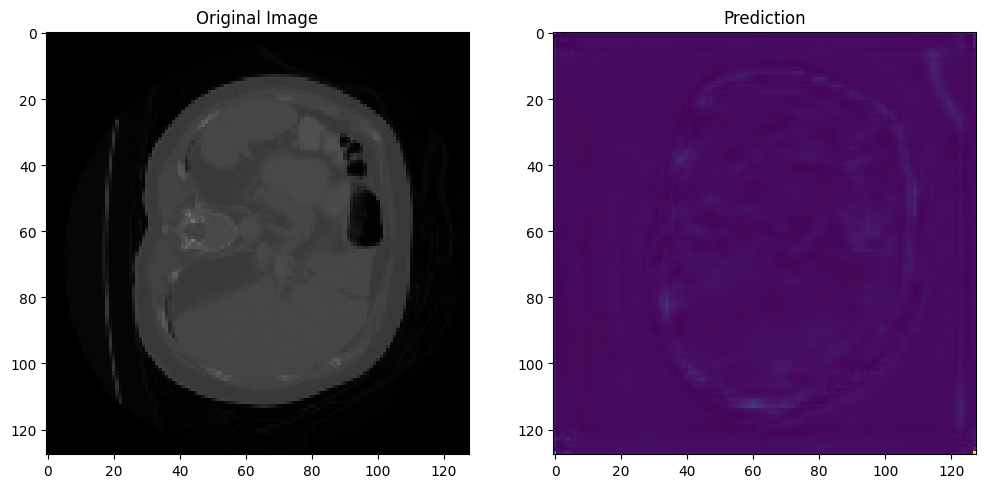

1/1 [==============================] - 0s 23ms/step


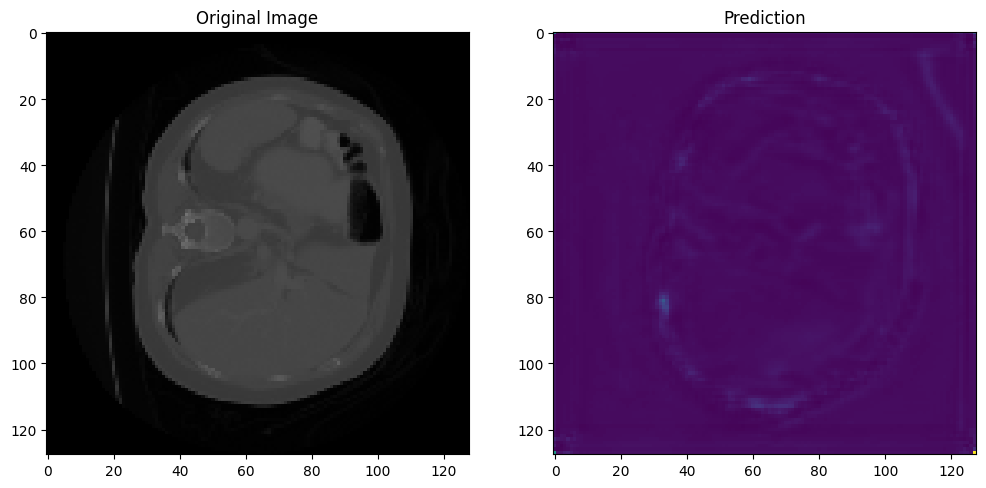

1/1 [==============================] - 0s 25ms/step


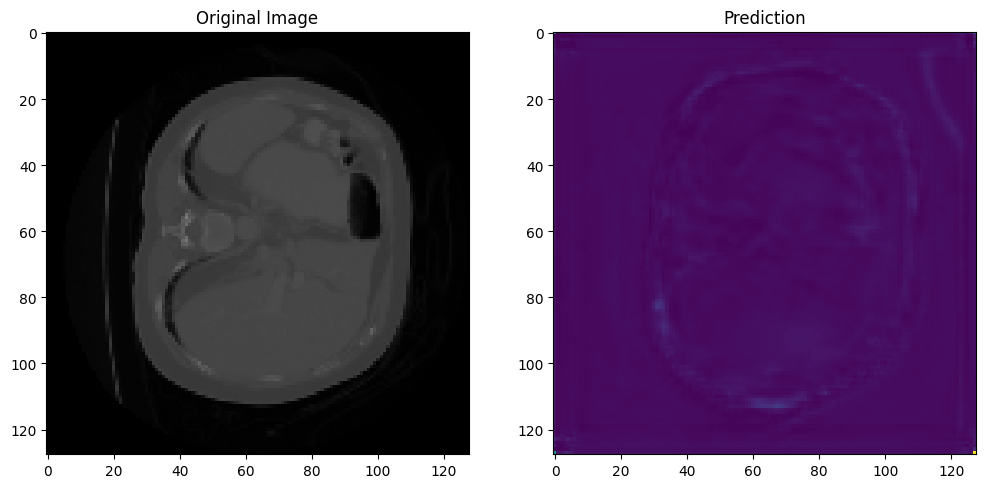

1/1 [==============================] - 0s 26ms/step


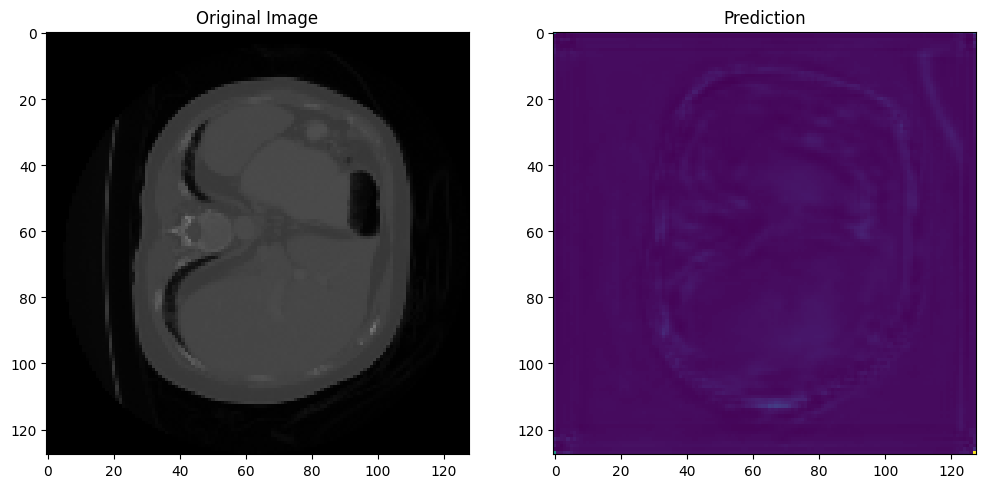

1/1 [==============================] - 0s 41ms/step


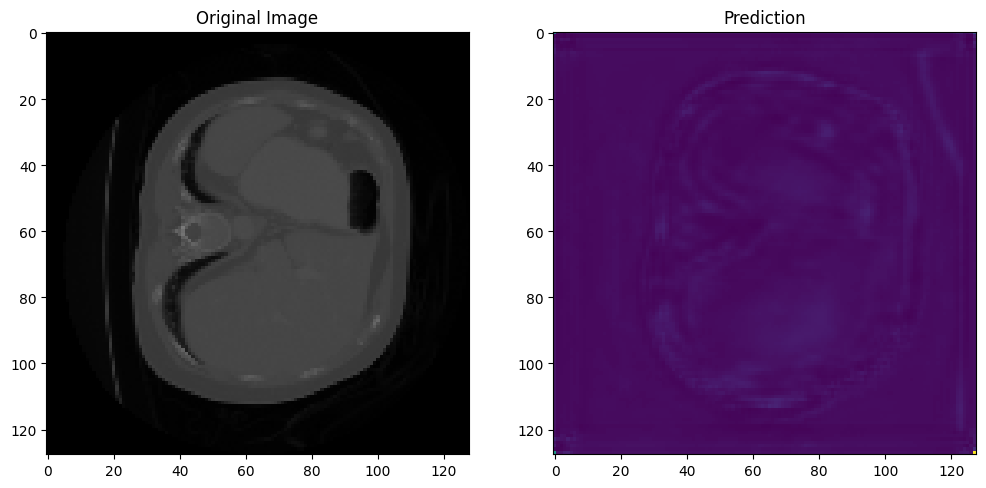

1/1 [==============================] - 0s 36ms/step


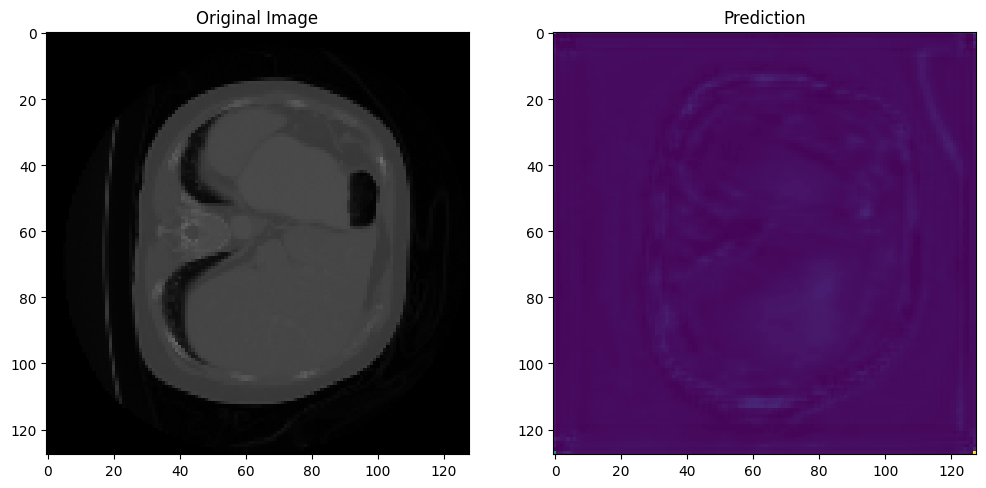

1/1 [==============================] - 0s 36ms/step


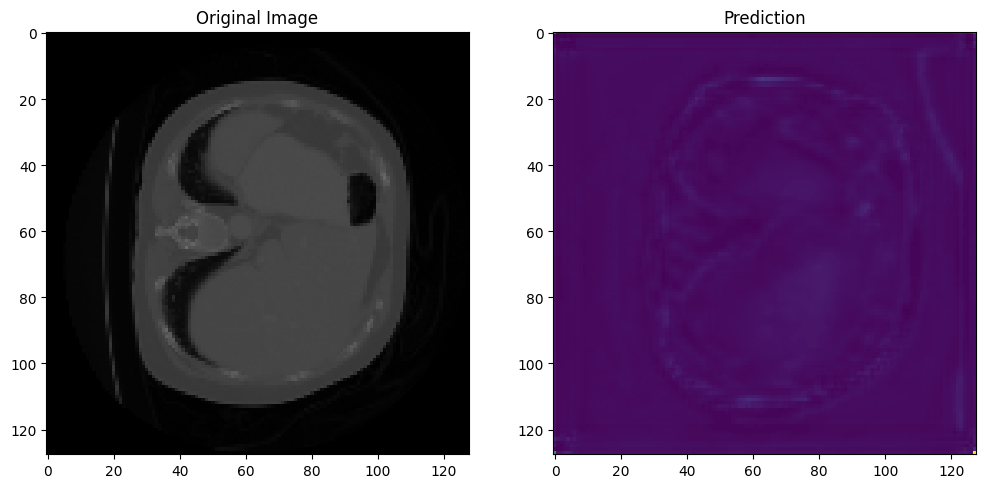

1/1 [==============================] - 0s 35ms/step


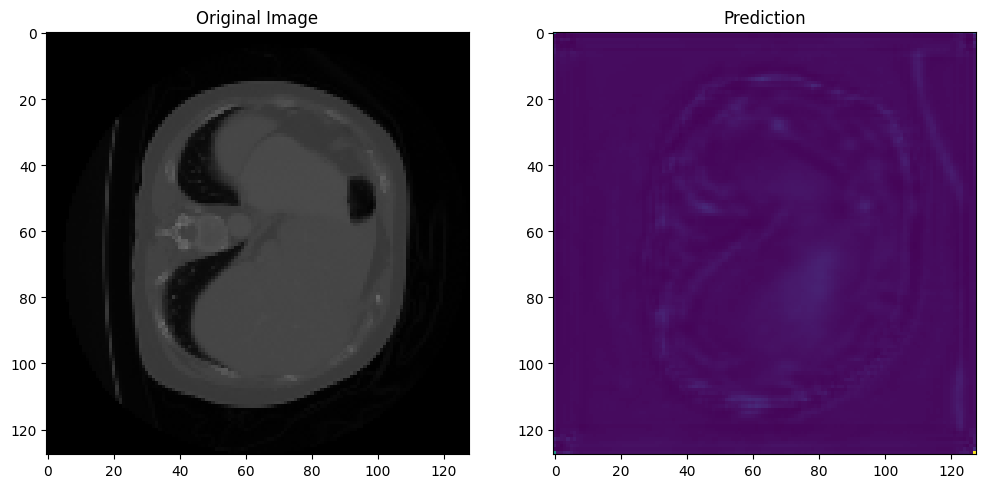

1/1 [==============================] - 0s 34ms/step


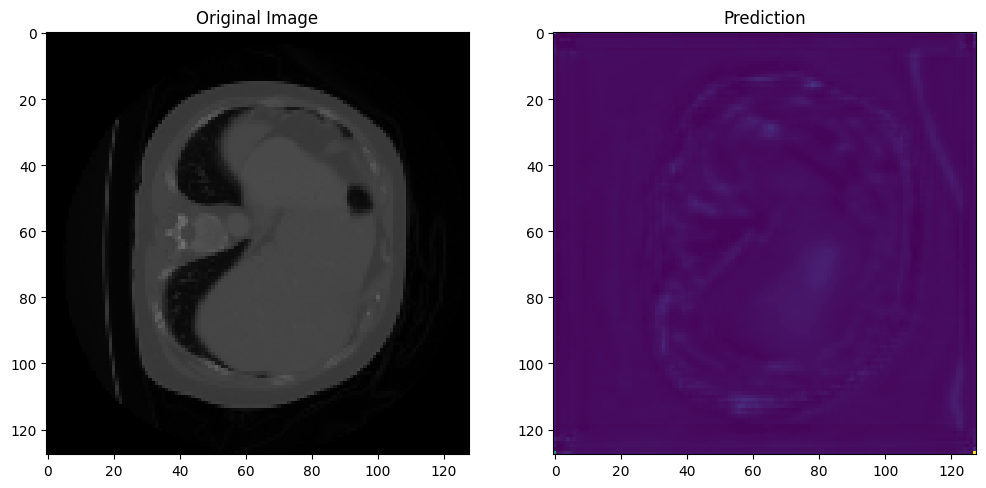

1/1 [==============================] - 0s 38ms/step


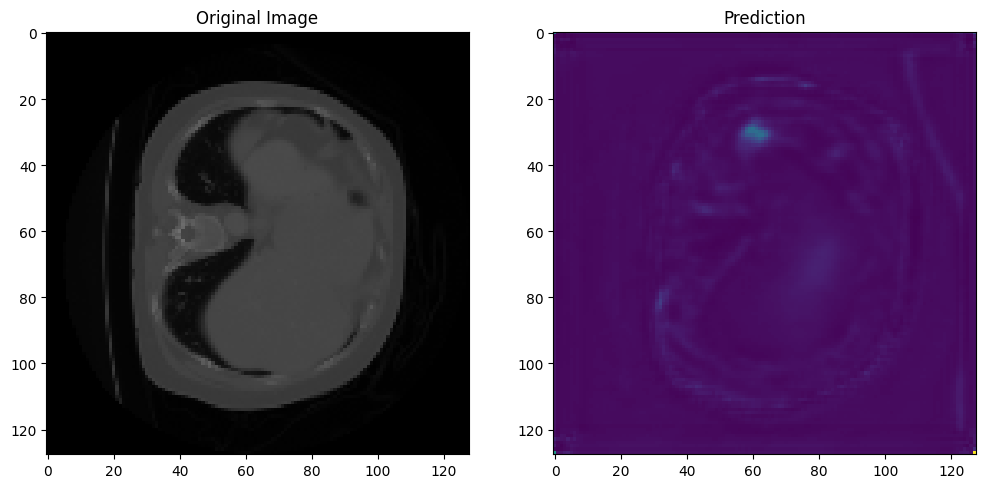

1/1 [==============================] - 0s 34ms/step


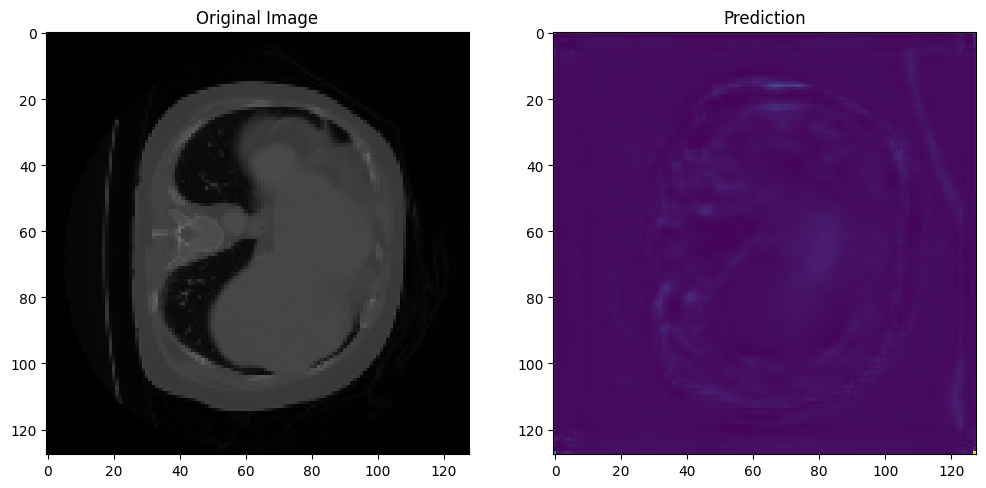

1/1 [==============================] - 0s 34ms/step


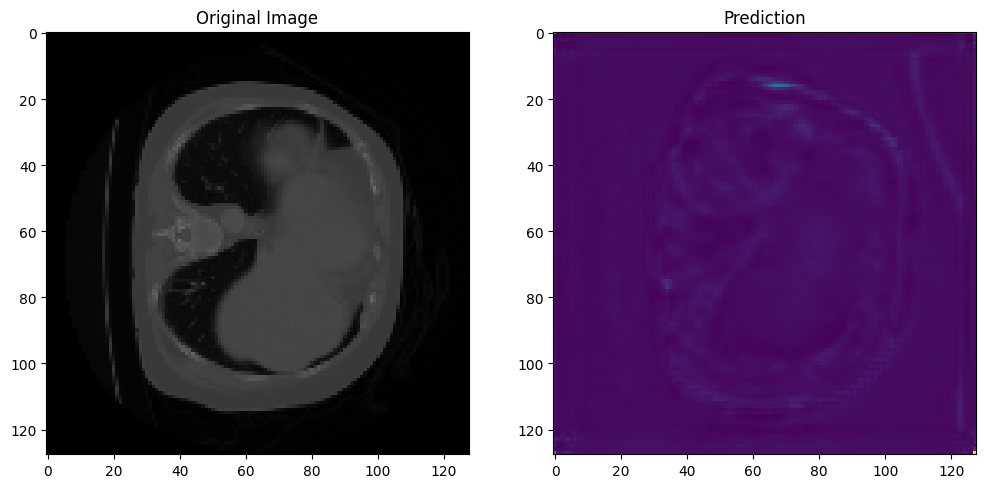

1/1 [==============================] - 0s 28ms/step


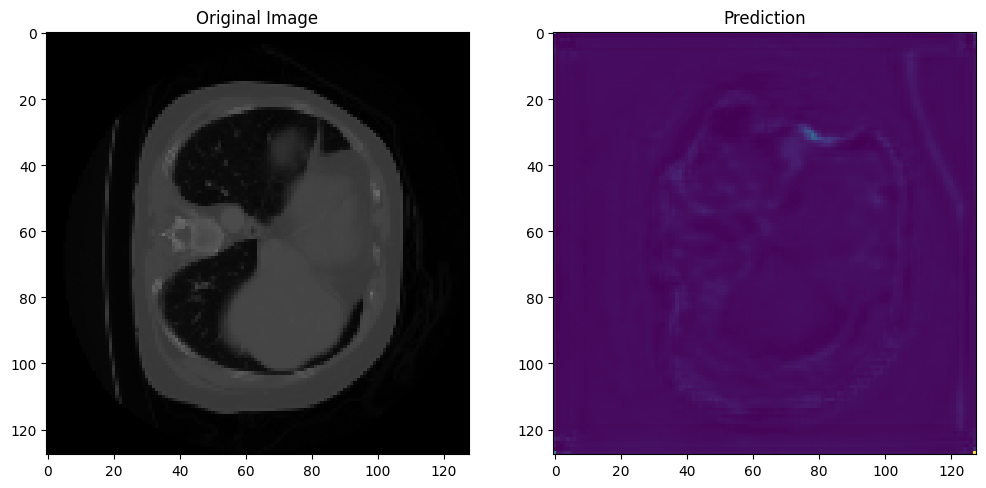

1/1 [==============================] - 0s 33ms/step


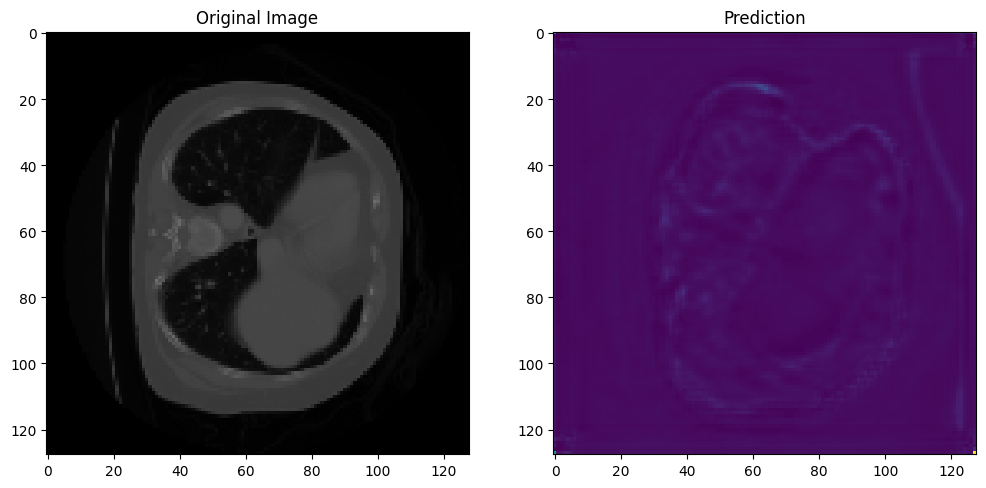

1/1 [==============================] - 0s 29ms/step


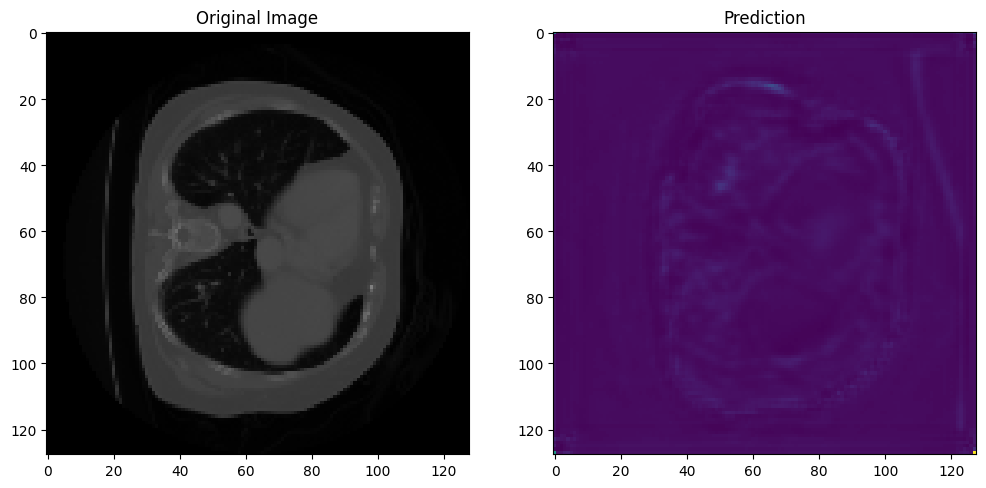

1/1 [==============================] - 0s 27ms/step


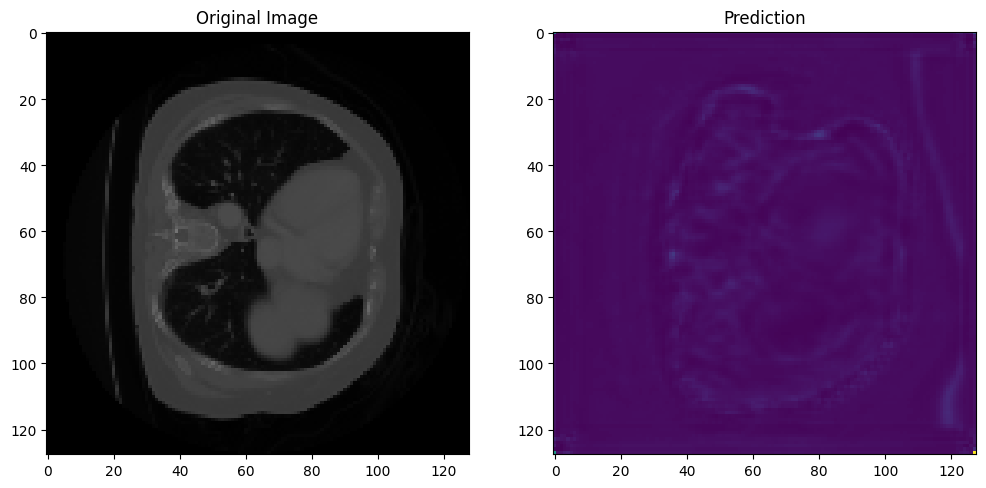

1/1 [==============================] - 0s 25ms/step


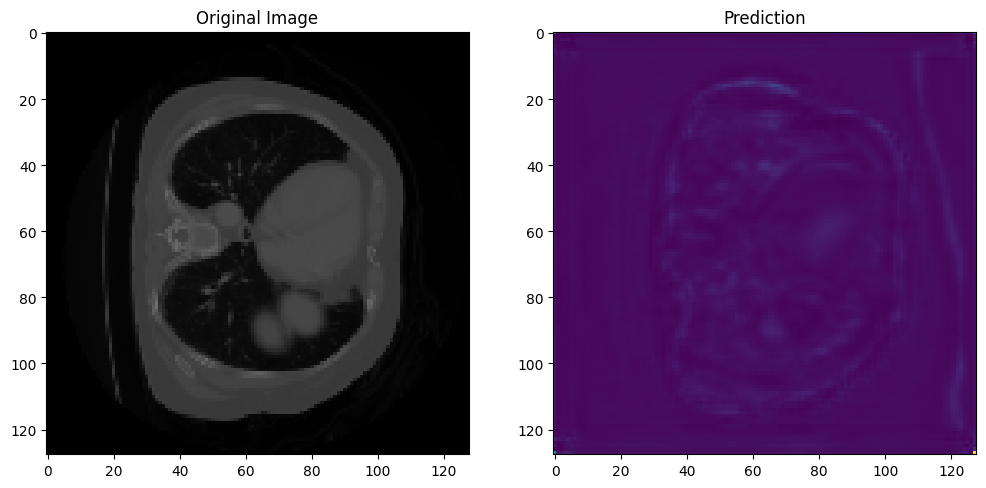

1/1 [==============================] - 0s 28ms/step


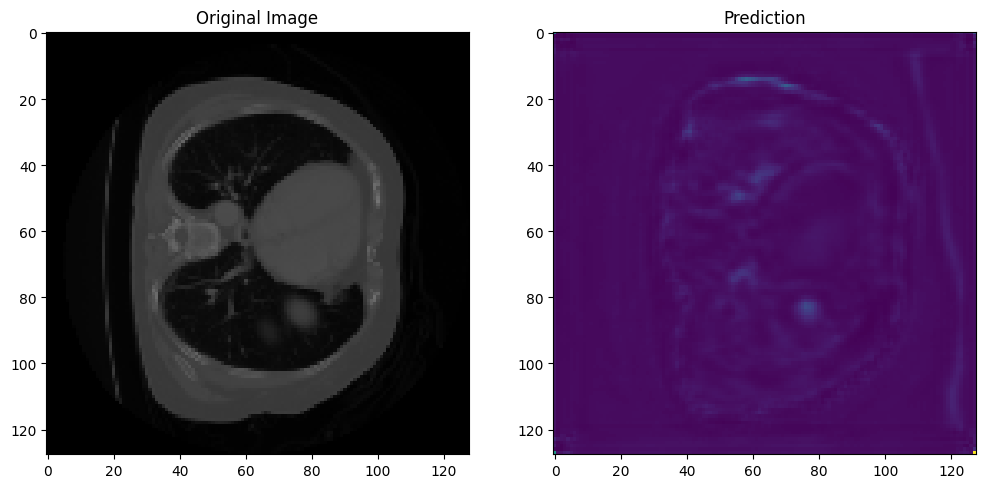

212.8458633422852 63.24362754821777 91.86323673660691


In [ ]:
Inference_time_mbn = []

for image in image_slices:
  time = infere(image, model_mbn)
  Inference_time_mbn.append(time)


print("=========================")
print(np.max(Inference_time_mbn), np.min(Inference_time_mbn), np.mean(Inference_time_mbn))
print("=========================")

##Summary

### Inference Time

<table>
  <tr>
    <th></th>
    <th>ResNet UNET</th>
    <th>MobileNet UNET</th>
  </tr>
  <tr>
    <td>Maximum</td>
    <td>153 ms</td>
    <td>213 ms</td>
  </tr>
  <tr>
    <td>Minimum</td>
    <td>68 ms</td>
    <td>63 ms</td>
  </tr>
  <tr>
    <td>Average</td>
    <td>85 ms</td>
    <td>92 ms</td>
  </tr>
</table>